In [187]:
!jupyter nbconvert  Project3_data_3.ipynb --to html

[NbConvertApp] Converting notebook Project3_data_3.ipynb to html
[NbConvertApp] Writing 9028375 bytes to Project3_data_3.html


# PROJECT 3-DATA 3

## Soufiane Fadel and Razieh Pourhasan

# Table of contents 

- <a href='#intro'>1. Introduction</a>  

- <a href='#pod'>2. preliminary process of Data</a>
     - <a href='#ll'>2.1 Load libraries</a>
     - <a href='#rrtd'>2.2 Read the Data</a>
     - <a href='#oot'>2.3 Overview of tables</a>
     - <a href='#dnc'>2.4  Dividing the data into numerical and categorical</a>
     - <a href='#socv'>2.5 Statistics overview of features</a>


- <a href='#dp'>3. Data preparation</a>
     - <a href='#cfmd'> 3.1 Check for missing data</a>
     - <a href='#cfdd'> 3.2 Check for duplicated data</a>


- <a href='#q1'>4. Question 1 </a>
     - <a href='#sod'>4.1 The source of the dataset </a>
     - <a href='#dd'>4.2 Data dictionary to explain variables</a>


- <a href='#q2'>5. Question 2 </a>
     - <a href='#loq'>5.1 List of questions about the datasets. </a>


- <a href='#FS'>6. Feature Selection </a>


- <a href='#q3'>7. Question 3 </a>
     - <a href='#udcov'>7.1 Univariate Distribution of variables </a>
 
 
- <a href='#q4'>8. Question 4 </a>
    
    - <a href='#md'>8.1 Pairwise scatter plots with emphasis on growth rate  </a>
    - <a href='#md2'>8.2 Pairwise scatter plots with emphasis on low income rate   </a>
    
  
- <a href='#q5'>9. Question 5 </a>

     - <a href='#dwtd'>9.1 Do you trust the dataset, or not? Support your answer.  </a>
     - <a href='#tie'>9.2 Flag potential invalid entries, anomalous observations, or outliers. How should these
    entries be treated? </a>
     

- <a href='#q6'>10. Question 6 </a>
    - <a href='#sosvt'>10.1 Does any of your analysis suggest that some of the variables should be transformed? </a>
 

 




# <a id='intro'>1. Intoduction</a> 

In this project, we are going to clean and process the following dataset.

* **data_2** : HR_2016_Census_simple

# <a id='pod'>2. preliminary process of Data</a>  

### <a id='ll'>2.1 Load libraries</a>
We import pandas to work with our data, Matplotlib to plot charts, and Seaborn to make our charts prettier.

In [109]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import matplotlib.pyplot as plt
import scipy.stats as ss
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
color = sns.color_palette()
sns.set(style="darkgrid")
import scipy.stats as ss
import matplotlib.pyplot as plt
from collections import Counter
from dython._private import convert, remove_incomplete_samples, replace_nan_with_value
from dython.nominal import associations

### <a id='rrtd'>2.2 Read the Data</a>

Let's load the "HR_2016_Census_simple" which has been provided in datasets for the course. 
We load the spread sheet:


In [110]:
xls_file = pd.ExcelFile('HR_2016_Census_simple.xlsx')
xls_file

In [111]:
xls_file.sheet_names

['Data',
 'CensusMnemonics(2A Short form)',
 'CensusMnemonics(2A-L Long form)',
 'Mnemonics for additional var.',
 'LHINs']

In [112]:
rawdf = xls_file.parse('Data')
rawdf.head(10)

Geocode                                           Geo Name  GNR  POP_2016   POP_MIZ  POP_MIZ_RATE  POP_LRG_POP_CNTR  LRG_POP_CNTR_RATE  POP_MED_POP_CNTR  MED_POP_CNTR_RATE  POP_SML_POP_CNTRE  SML_POP_CNTRE_RATE  POP_RRL  RRL_RATE  POP_DENSE  CENSUS_FAM_PRIV_HHLDS     LONE  LONE_RATE  LONE_FEMALE  LONE_FEMALE_RATE  LONE_MALE  LONE_MALE_RATE  GNR.1  POP_PRIV_HHLD_2016  POP_25_29      HSG  HSG_RATE  HSG_ONLY  HSG_ONLY_RATE  HSG_PSG_BELOW_BACH  HSG_PSG_BELOW_BACH_RATE  HSG_PSG_BACH  HSG_PSG_BACH_RATE  HSG_PSG_ABOVE_BACH  HSG_PSG_ABOVE_BACH_RATE  POP_25_54      PSG  PSG_RATE  PSG_BELOW_BACH  PSG_BELOW_BACH_RATE  PSG_BACH  PSG_BACH_RATE  PSG_ABOVE_BACH  PSG_ABOVE_BACH_RATE    LABOUR      UE  UE_RATE  ECON_FAM_LW_INC_DENOM  LW_INC_ECON_FAM  LW_INC_ECON_FAM_RATE  UNATTACHED_LW_INC_DENOM  LOW_INC_UNATTACHED  LOW_INC_UNATTACHED_RATE  POP_PRIV_HHLDS_LW_INC_DENOM  POP_PRIV_HHLDS_LW_INC  POP_PRIV_HHLDS_LW_INC_RATE  CHILD17_ECON_FAM_LOW_INC_DENOM  CHILD17_ECON_FAM_LOW_INC  \
0        1                                             Canada  4.0  35151730  31226645          88.8          20938295               59.6           3179190                9.0            4458180                12.7  6576060      18.7        3.9                9840725  1612805       16.4      1262335              12.8     350465             3.6    5.1            34460065    2266030  2033665      89.7    529485           26.0              722825                     35.5        581550               28.6              199815                      9.8   14076325  9562680      67.9         5144695                 53.8   2967120           31.0         1450860                 15.2  18672470  814645      4.4                9573075           839765                   8.8                  5252515             1729655                     32.9                     33968190                4324825                        12.7                         6821825                    961010   
1       10  Newfoundland and Labrador / Terre-Neuve-et-Lab...  4.0    519715    312530          60.1            178430               34.3                 0                0.0             123290                23.7   218000      41.9        1.4                 161005    24250       15.1        19290              12.0       4955             3.1    6.8              512250      28130    25455      90.5      6375           25.0               11515                     45.2          5950               23.4                1615                      6.3     203385   134670      66.2           91545                 68.0     28820           21.4           14305                 10.6    256855   24455      9.5                 158975             9415                   5.9                    69330               19125                     27.6                       509340                  45045                         8.8                           89210                     10240   
2     1011             1011 Eastern Regional Health Authority  3.7    313270    235790          75.3            178425               57.0                 0                0.0              32520                10.4   102325      32.7       16.2                  94510    15045       15.9        12025              12.7       3020             3.2    6.5              309015      19165    17785      92.8      4175           23.5                7470                     42.0          4780               26.9                1360                      7.6     127455    89625      70.3           56775                 63.3     21620           24.1           11225                 12.5    161620   11245      7.0                  94065             5740                   6.1                    44770               13255                     29.6                       309015                  29230                         9.5                           55415                      6570   
3     1012             1012 Central Regional Health Authority  4.1     92690     43275 

### <a id='oot'>2.3 Overview of tables</a>

#### <a href='norf'>2.3.1 Number of rows and features</a>

In [113]:
print('The dataset HR_2016_Census_simple has {} rows and {} features'.format(rawdf.shape[0],rawdf.shape[1]))

The dataset HR_2016_Census_simple has 127 rows and 105 features


#### <a id='ndt'>2.3.2 Features' names and data types</a>





In [114]:
print('The list names of the features are : {}  '.format(rawdf.columns.values))


The list names of the features are : ['Geocode' 'Geo Name' 'GNR' 'POP_2016' 'POP_MIZ' 'POP_MIZ_RATE'
 'POP_LRG_POP_CNTR' 'LRG_POP_CNTR_RATE' 'POP_MED_POP_CNTR'
 'MED_POP_CNTR_RATE' 'POP_SML_POP_CNTRE' 'SML_POP_CNTRE_RATE' 'POP_RRL'
 'RRL_RATE' 'POP_DENSE' 'CENSUS_FAM_PRIV_HHLDS' 'LONE' 'LONE_RATE'
 'LONE_FEMALE' 'LONE_FEMALE_RATE' 'LONE_MALE' 'LONE_MALE_RATE' 'GNR.1'
 'POP_PRIV_HHLD_2016' 'POP_25_29' 'HSG' 'HSG_RATE' 'HSG_ONLY'
 'HSG_ONLY_RATE' 'HSG_PSG_BELOW_BACH' 'HSG_PSG_BELOW_BACH_RATE'
 'HSG_PSG_BACH' 'HSG_PSG_BACH_RATE' 'HSG_PSG_ABOVE_BACH'
 'HSG_PSG_ABOVE_BACH_RATE' 'POP_25_54' 'PSG' 'PSG_RATE' 'PSG_BELOW_BACH'
 'PSG_BELOW_BACH_RATE' 'PSG_BACH' 'PSG_BACH_RATE' 'PSG_ABOVE_BACH'
 'PSG_ABOVE_BACH_RATE' 'LABOUR' 'UE' 'UE_RATE' 'ECON_FAM_LW_INC_DENOM'
 'LW_INC_ECON_FAM' 'LW_INC_ECON_FAM_RATE' 'UNATTACHED_LW_INC_DENOM'
 'LOW_INC_UNATTACHED' 'LOW_INC_UNATTACHED_RATE'
 'POP_PRIV_HHLDS_LW_INC_DENOM' 'POP_PRIV_HHLDS_LW_INC'
 'POP_PRIV_HHLDS_LW_INC_RATE' 'CHILD17_ECON_FAM_LOW_INC_DENOM'
 '

In [115]:
print('Information about the type features:')
rawdf.info() 

Information about the type features:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Columns: 105 entries, Geocode to UNEMP_RATE
dtypes: float64(43), int64(61), object(1)
memory usage: 104.3+ KB


### <a id='dnc'>2.4  Dividing the data into numerical and categorical</a>

In [116]:
num_features = rawdf.select_dtypes(include=['int64','float64'])
categorical_features = rawdf.select_dtypes(include='object')
print('The dataset has {} numerical feature(s).  '.format(num_features.shape[1]))
print('The dataset has {} categorical feature(s). '.format(categorical_features.shape[1]))

The dataset has 104 numerical feature(s).  
The dataset has 1 categorical feature(s). 


### <a id='socv'>2.5. Statistics overview of features</a>

In [117]:
rawdf.describe()

Geocode         GNR      POP_2016       POP_MIZ  POP_MIZ_RATE  POP_LRG_POP_CNTR  LRG_POP_CNTR_RATE  POP_MED_POP_CNTR  MED_POP_CNTR_RATE  POP_SML_POP_CNTRE  SML_POP_CNTRE_RATE       POP_RRL    RRL_RATE   POP_DENSE  CENSUS_FAM_PRIV_HHLDS          LONE   LONE_RATE   LONE_FEMALE  LONE_FEMALE_RATE      LONE_MALE  LONE_MALE_RATE       GNR.1  POP_PRIV_HHLD_2016     POP_25_29           HSG    HSG_RATE       HSG_ONLY  HSG_ONLY_RATE  HSG_PSG_BELOW_BACH  HSG_PSG_BELOW_BACH_RATE   HSG_PSG_BACH  HSG_PSG_BACH_RATE  HSG_PSG_ABOVE_BACH  HSG_PSG_ABOVE_BACH_RATE     POP_25_54           PSG    PSG_RATE  PSG_BELOW_BACH  PSG_BELOW_BACH_RATE      PSG_BACH  PSG_BACH_RATE  PSG_ABOVE_BACH  PSG_ABOVE_BACH_RATE        LABOUR             UE     UE_RATE  ECON_FAM_LW_INC_DENOM  LW_INC_ECON_FAM  LW_INC_ECON_FAM_RATE  UNATTACHED_LW_INC_DENOM  LOW_INC_UNATTACHED  LOW_INC_UNATTACHED_RATE  POP_PRIV_HHLDS_LW_INC_DENOM  POP_PRIV_HHLDS_LW_INC  POP_PRIV_HHLDS_LW_INC_RATE  CHILD17_ECON_FAM_LOW_INC_DENOM  \
count   127.000000  127.000000  1.270000e+02  1.270000e+02    127.000000      1.270000e+02         127.000000      1.270000e+02         127.000000       1.270000e+02          127.000000  1.270000e+02  127.000000   127.00000           1.270000e+02  1.270000e+02  127.000000  1.270000e+02        127.000000     127.000000      127.000000  127.000000        1.270000e+02  1.270000e+02  1.270000e+02  127.000000     127.000000     127.000000          127.000000               127.000000     127.000000         127.000000          127.000000               127.000000  1.270000e+02  1.270000e+02  127.000000    1.270000e+02           127.000000  1.270000e+02     127.000000    1.270000e+02           127.000000  1.270000e+02     127.000000  127.000000           1.270000e+02       127.000000            120.000000             1.270000e+02        1.270000e+02               120.000000                 1.270000e+02           1.270000e+02                  120.000000                    1.270000e+02   
mean   3283.417323    4.827559  8.306347e+05  7.376373e+05     68.637008      4.946054e+05          26.453543      7.509898e+04          11.937008       1.053928e+05           25.014961  1.555379e+05   36.598425   196.35748           2.325308e+05  3.812839e+04   17.221260  2.984189e+04         13.165354    8286.692913        4.056693    6.077953        8.142946e+05  5.355106e+04  4.805138e+04   84.861417   12514.409449      31.836220        17078.503937                40.233858   13738.543307          21.855118         4720.314961                 6.018898  3.326120e+05  2.259253e+05   61.746457    1.215544e+05            64.455906  7.009661e+04      25.166929    3.427472e+04            10.404724  4.411766e+05   19257.598425    5.577953           2.261687e+05     19841.456693              6.954167             1.240878e+05        4.086134e+04                27.624167                 8.025269e+05           1.021810e+05                   10.292500                    1.611869e+05   
std    1824.155993    1.512890  3.413698e+06  3.064014e+06     32.161415      2.090969e+06          35.747998      3.091958e+05          18.712265       4.224387e+05           19.268862  6.186895e+05   21.542774   710.76828           9.550946e+05  1.573973e+05    6.033447  1.234862e+05          4.517995   33980.028998        1.690195    1.824564        3.347676e+06  2.205613e+05  1.983494e+05   11.377366   51049.048576       9.523177        70168.318020                 8.934144   57596.030552           6.998863        20190.460970                 3.355184  1.369017e+06  9.335191e+05    9.364012    4.982754e+05            11.158075  2.925341e+05       6.825432    1.447728e+05             4.686215  1.813842e+06   78831.685576    3.322265           9.299445e+05     83545.768594              3.122886             5.099972e+05        1.704399e+05                 6.672910                 3.305772e+06           4.283684e+05                    3.538033                    6.636664e+05   
min       1.000000    2.400000  2.63000

# <a id='dp'>3. Data preparation</a>

### <a id='cfmd'> 3.1 Check for missing data</a>

Quick check to see if there is any missing values at all:

In [118]:
print(rawdf.isnull().values.any())

True


The answer is **Yes**, then let's see which columns have missing values:

In [119]:
# checking missing data 
total = rawdf.isnull().sum().sort_values(ascending = False)
percent = 100*(rawdf.isnull().sum()/rawdf.isnull().count()).sort_values(ascending = False)
missing_data  = pd.concat([total, percent, percent.cumsum()], axis=1, keys=['Total missing ', 'Percent', 'Cumulative Percent'])
missing_data.head(10)

Total missing    Percent  Cumulative Percent
LOW_INC_UNATTACHED_RATE                     7  5.511811            5.511811
CHILD17_ECON_FAM_LOW_INC_RATE               7  5.511811           11.023622
POP_PRIV_HHLDS_LW_INC_RATE                  7  5.511811           16.535433
LW_INC_ECON_FAM_RATE                        7  5.511811           22.047244
IMM_2006_2016_RATE_IMM                      5  3.937008           25.984252
PSG_BELOW_BACH_RATE                         0  0.000000           25.984252
HSG_PSG_BELOW_BACH                          0  0.000000           25.984252
HSG_PSG_BELOW_BACH_RATE                     0  0.000000           25.984252
HSG_PSG_BACH                                0  0.000000           25.984252
HSG_PSG_BACH_RATE                           0  0.000000           25.984252

Let's see which rows have missing data:

In [120]:
df_null = rawdf.loc[:, rawdf.isnull().any()]
df_null[df_null.isnull().any(axis=1)]
len(df_null[df_null.isnull().any(axis=1)])
df_null.isnull().sum()

LW_INC_ECON_FAM_RATE             7
LOW_INC_UNATTACHED_RATE          7
POP_PRIV_HHLDS_LW_INC_RATE       7
CHILD17_ECON_FAM_LOW_INC_RATE    7
IMM_2006_2016_RATE_IMM           5
dtype: int64

In [121]:
rawdf.loc[121:126,'Geo Name']

121                                               Yukon 
122                                          6001 Yukon 
123    Northwest Territories / Territoires du Nord-Ou...
124    6101 Northwest Territories / Territoires du No...
125                                             Nunavut 
126                                        6201 Nunavut 
Name: Geo Name, dtype: object

Last rows in dataset contains information for territories. Low income status does not apply to territories. We can set null values for those to zero. Also, all columns with missing values are proportions. Let's check the values in related population columns:

In [122]:
rawdf.columns[rawdf.isnull().any()]

Index(['LW_INC_ECON_FAM_RATE', 'LOW_INC_UNATTACHED_RATE', 'POP_PRIV_HHLDS_LW_INC_RATE', 'CHILD17_ECON_FAM_LOW_INC_RATE', 'IMM_2006_2016_RATE_IMM'], dtype='object')

In [123]:
rawdf.loc[{39,81,94,96,97}, ['LW_INC_ECON_FAM','LOW_INC_UNATTACHED','POP_PRIV_HHLDS_LW_INC','CHILD17_ECON_FAM_LOW_INC','IMM_2006_2016'] ]

LW_INC_ECON_FAM  LOW_INC_UNATTACHED  POP_PRIV_HHLDS_LW_INC  CHILD17_ECON_FAM_LOW_INC  IMM_2006_2016
96                0                  10                     20                        10              0
97              575                 420                   2525                      1170              0
39                0                   0                      0                         0              0
81              680                 795                   3295                      1400              0
94              330                 195                   1540                       785              0

It is obvious that the related populations have been recorded as zero, therefore their corresponding rate should be set to zero too:

In [124]:
rawdf = rawdf.fillna(0)
print(rawdf.isnull().values.any())

False


### <a id='cfdd'> 3.2 Check for duplicated data</a>

Let's first take the first row which is the data for *Canada* and investigate if there are duplicated columns: columns that contain the same information but they are labeled differently. 

In [125]:
df1 = rawdf.iloc[0]
df1_num = df1.drop(df1.index[1])
df1_num[df1_num.duplicated(keep=False)]

Geocode                              1
POP_2016                      35151730
SML_POP_CNTRE_RATE                12.7
POP_25_54                     14076325
POP_PRIV_HHLDS_LW_INC_RATE        12.7
RENTER_OVER30_RATE                  40
POP16_2A                      35151730
MF_RATE                              1
POP_25_54.1                   14076325
HOU_AFF                             40
Name: 0, dtype: object

There are two columns *POP_2016* and *POP16_2A* for **2016 population** and two columns *POP_25_54* and *POP_25_54.l* for **Population aged 25 to 54**. We check the whole dataframe to compare all rows: 

In [126]:
rawdf[{'POP_2016','POP16_2A'}], rawdf[{'POP_25_54', 'POP_25_54.1'}]

(     POP16_2A  POP_2016
 0    35151730  35151730
 1      519715    519715
 2      313270    313270
 3       92685     92690
 4       77685     77685
 5       36070     36070
 6      142910    142910
 7      142910    142905
 8      923600    923600
 9      194375    194375
 10     146250    146245
 11     158935    158935
 12     424035    424040
 13     747100    747100
 14     209255    209255
 15     170535    170535
 16     174345    174350
 17      47775     47775
 18      25250     25250
 19      76375     76375
 20      43565     43560
 21    8164360   8164360
 22     197385    197385
 23     276365    276370
 24     729995    729995
 25     508510    508515
 26     472615    472615
 27    1942045   1942045
 28     382605    382605
 29     146715    146715
 30      92520     92515
 31      14235     14230
 32      90310     90315
 33     420085    420080
 34     422995    422995
 35     494795    494795
 36     589400    589400
 37    1353460   1353455
 38      13190     13185


The are essentially the same. There are two more columns with the same values but their names are not similar. Is the similarity in values for Canada a coincidence? Let's check them too: 

In [127]:
rawdf[{'RENTER_OVER30_RATE','HOU_AFF'}]
rawdf[{'SML_POP_CNTRE_RATE','POP_PRIV_HHLDS_LW_INC_RATE'}]

POP_PRIV_HHLDS_LW_INC_RATE  SML_POP_CNTRE_RATE
0                          12.7                12.7
1                           8.8                23.7
2                           9.5                10.4
3                           7.9                34.4
4                           9.4                53.8
5                           4.4                47.4
6                           9.5                13.8
7                           9.5                13.8
8                          11.1                23.1
9                           9.7                28.9
10                          9.9                43.4
11                         10.3                50.8
12                         12.6                 3.1
13                         10.4                18.7
14                         10.3                 8.2
15                         11.7                23.0
16                         10.6                10.0
17                          8.9                41.0
18                         11.6                44.1
19                          9.1                31.4
20                          8.1                26.0
21                         13.0                12.7
22                          8.2                31.0
23                          8.6                26.7
24                         11.4                 7.9
25                         11.5                13.5
26                         10.5                19.9
27                         23.5                 0.0
28                         11.9                 9.6
29                          7.5                53.4
30                          5.6                67.4
31                          4.9                81.4
32                          7.1                23.6
33                          6.2                28.8
34                         12.1                 0.0
35                          8.9                18.5
36                          9.3                16.9
37                          9.3                10.7
38                          6.4                36.2
39                          0.0                44.7
40                         13.7                10.0
41                         11.9                14.6
42                         10.0                11.5
43                          8.9                 6.0
44                          8.9                15.3
45                          8.0                45.9
46                          5.9                45.3
47                          7.3                40.6
48                          8.0                 1.7
49                         16.6                 2.0
50                         10.4                10.0
51                          7.1                40.1
52                         11.5                27.0
53                         10.8                 4.5
54                          9.6                15.2
55                          7.5                40.2
56                         14.7                 6.2
57                         11.3                16.5
58                         10.8                13.1
59                          7.2                40.4
60                         13.8                 1.8
61                          6.9                33.8
62                         14.2                 2.4
63                          6.8                26.9
64                         12.0                 7.3
65                          8.3                67.2
66                          7.0                53.3
67                          9.1                29.7
68                          8.0                36.6
69                          9.8                24.3
70                         10.9                 5.3
71                          9.9                50.0
72                         10.2                 6.4
73                          7.6                18.0
74                         13.3                 7.3
75                         12.7                 5.1
7

The first two columns are essentially the same, but the last two are different. We drop duplicated columns:

In [128]:
df = rawdf.drop(['POP16_2A','POP_25_54.1', 'HOU_AFF'], axis = 1)
df.head()

Geocode                                           Geo Name  GNR  POP_2016   POP_MIZ  POP_MIZ_RATE  POP_LRG_POP_CNTR  LRG_POP_CNTR_RATE  POP_MED_POP_CNTR  MED_POP_CNTR_RATE  POP_SML_POP_CNTRE  SML_POP_CNTRE_RATE  POP_RRL  RRL_RATE  POP_DENSE  CENSUS_FAM_PRIV_HHLDS     LONE  LONE_RATE  LONE_FEMALE  LONE_FEMALE_RATE  LONE_MALE  LONE_MALE_RATE  GNR.1  POP_PRIV_HHLD_2016  POP_25_29      HSG  HSG_RATE  HSG_ONLY  HSG_ONLY_RATE  HSG_PSG_BELOW_BACH  HSG_PSG_BELOW_BACH_RATE  HSG_PSG_BACH  HSG_PSG_BACH_RATE  HSG_PSG_ABOVE_BACH  HSG_PSG_ABOVE_BACH_RATE  POP_25_54      PSG  PSG_RATE  PSG_BELOW_BACH  PSG_BELOW_BACH_RATE  PSG_BACH  PSG_BACH_RATE  PSG_ABOVE_BACH  PSG_ABOVE_BACH_RATE    LABOUR      UE  UE_RATE  ECON_FAM_LW_INC_DENOM  LW_INC_ECON_FAM  LW_INC_ECON_FAM_RATE  UNATTACHED_LW_INC_DENOM  LOW_INC_UNATTACHED  LOW_INC_UNATTACHED_RATE  POP_PRIV_HHLDS_LW_INC_DENOM  POP_PRIV_HHLDS_LW_INC  POP_PRIV_HHLDS_LW_INC_RATE  CHILD17_ECON_FAM_LOW_INC_DENOM  CHILD17_ECON_FAM_LOW_INC  \
0        1                                             Canada  4.0  35151730  31226645          88.8          20938295               59.6           3179190                9.0            4458180                12.7  6576060      18.7        3.9                9840725  1612805       16.4      1262335              12.8     350465             3.6    5.1            34460065    2266030  2033665      89.7    529485           26.0              722825                     35.5        581550               28.6              199815                      9.8   14076325  9562680      67.9         5144695                 53.8   2967120           31.0         1450860                 15.2  18672470  814645      4.4                9573075           839765                   8.8                  5252515             1729655                     32.9                     33968190                4324825                        12.7                         6821825                    961010   
1       10  Newfoundland and Labrador / Terre-Neuve-et-Lab...  4.0    519715    312530          60.1            178430               34.3                 0                0.0             123290                23.7   218000      41.9        1.4                 161005    24250       15.1        19290              12.0       4955             3.1    6.8              512250      28130    25455      90.5      6375           25.0               11515                     45.2          5950               23.4                1615                      6.3     203385   134670      66.2           91545                 68.0     28820           21.4           14305                 10.6    256855   24455      9.5                 158975             9415                   5.9                    69330               19125                     27.6                       509340                  45045                         8.8                           89210                     10240   
2     1011             1011 Eastern Regional Health Authority  3.7    313270    235790          75.3            178425               57.0                 0                0.0              32520                10.4   102325      32.7       16.2                  94510    15045       15.9        12025              12.7       3020             3.2    6.5              309015      19165    17785      92.8      4175           23.5                7470                     42.0          4780               26.9                1360                      7.6     127455    89625      70.3           56775                 63.3     21620           24.1           11225                 12.5    161620   11245      7.0                  94065             5740                   6.1                    44770               13255                     29.6                       309015                  29230                         9.5                           55415                      6570   
3     1012             1012 Central Regional Health Authority  4.1     92690     43275 

In [129]:
# comparing sizes of data frames 
print("\nNumber of features of the old data frame is:", rawdf.shape[1], "\nNumber of features of the new data frame is:",  
      df.shape[1] )


Number of features of the old data frame is: 105 
Number of features of the new data frame is: 102


# <a id='q1'>4. Question 1 </a>

### <a id='sod'>4.1 The source of the dataset </a>

The dataset `HR_2016_Census_simple` contains information about Canada, provinces and territories and health regions based on 2016 Census short-form and long-form questionnaire. Forms can be found on: Statistics Canada. [Table 17-10-0122-01 Census indicator profile, based on the 2016 Census short-form questionnaire, Canada, provinces and territories, and health regions (2017 boundaries)](https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1710012201) and [Table 17-10-0123-01 Census indicator profile, based on the 2016 Census long-form questionnaire, Canada, provinces and territories, and health regions (2017 boundaries)](https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1710012301).

###  <a id='dd'>4.2 Data dictionary to explain variables</a>



To build data dictionary for dataset we use the source data for short form and long form by loading them into  `dfshort` and `dflong` and combine them to one data frame `dfshortlong`. We only keep the columns *Census profile* and *VALUE*. 

In [130]:
dfshort = pd.read_csv('1710012201_databaseLoadingData.csv')
dfshort = dfshort[{'Census profile','VALUE'}]
dflong = pd.read_csv('1710012301_databaseLoadingData.csv')
dflong = dflong[{'Census indicator profile','VALUE'}]
dflong.columns = ['Census profile','VALUE']
dfshortlong = pd.concat([dfshort, dflong], sort=True)
dfshortlong

Census profile       VALUE
0                            Global non-response rate         4.0
1                                    Total population  35151730.0
2               Census families in private households   9840725.0
3                                Lone-parent families   1612805.0
4   Lone-parent families, proportion of census fam...        16.4
5                         Female lone-parent families   1262335.0
6   Female lone-parent families, proportion of cen...        78.3
7                           Male lone-parent families    350465.0
8   Male lone-parent families, proportion of censu...        21.7
9   Population living within a Census Metropolitan...  31226645.0
10  Population living within a Census Metropolitan...        88.8
11           Large urban population centre population  20938295.0
12  Large urban population centre population, prop...        59.6
13                Medium population centre population   3179190.0
14  Medium population centre population, proportio...         9.0
15                 Small population centre population   4458180.0
16  Small population centre population, proportion...        12.7
17                                   Rural population   6576060.0
18   Rural population, proportion of total population        18.7
19  Population density (population per square kilo...         3.9
0                            Global non-response rate         5.1
1              Total population in private households  34460065.0
2                            Population aged 25 to 29   2266030.0
3                 High school graduates aged 25 to 29   2033665.0
4   High school graduates aged 25 to 29, proportio...        89.7
5           High school graduates only, aged 25 to 29    529485.0
6   High school graduates only, aged 25 to 29, pro...        26.0
7   Post-secondary graduates, below bachelor's deg...    722825.0
8   Post-secondary graduates, below bachelor's deg...        35.5
9   Post-secondary graduates, bachelor's degree, a...    581550.0
10  Post-secondary graduates, bachelor's degree, a...        28.6
11  Post-secondary graduates, above bachelor's deg...    199815.0
12  Post-secondary graduates, above bachelor's deg...         9.8
13                           Population aged 25 to 54  14076325.0
14             Post-secondary graduates aged 25 to 54   9562680.0
15  Post-secondary graduates aged 25 to 54, propor...        67.9
16  Post-secondary graduates, below bachelor's deg...   5144695.0
17  Post-secondary graduates, below bachelor's deg...        53.8
18  Post-secondary graduates, bachelor's degree, a...   2967120.0
19  Post-secondary graduates, bachelor's degree, a...        31.0
20  Post-secondary graduates, above bachelor's deg...   1450860.0
21  Post-secondary graduates, above bachelor's deg...        15.2
22               Employed persons aged 25 to 54 years  11323575.0
23                    Employment rate, 25 to 54 years        80.4
24                      Labour force aged 15 and over  18672470.0
25                Unemployment rate 15 years and over         7.7
26                               Long-term unemployed    814645.0
27  Long-term unemployment rate, labour force aged...         4.4
28          Total economic families for income status   9573075.0
29  Economic families in low income before tax in ...    839765.0
30  Prevalence of low income before tax in 2015 fo...         8.8
31  Total persons aged 17 years and under living i...   6821825.0
32  Persons aged 17 years and under living in low ...    961010.0
33  Prevalence of persons aged 17 years and under ...        14.1
34  Total persons 15 years and over not in an econ...   5252515.0
35  Persons 15 years and over not in economic fami...   1729655.0
36  Prevalence of low income before tax in 2015 fo...        32.9
37  Population in private households for income st...  33968190.0
38  Persons in private households in low income be...   4324825.0
39  Prevalence of low income before tax in 2015 fo...        12.7
40  Average t

Now we make a data frame called `data_dictionary` with three columns: 'Feature', 'Type', 'Description'. "Feature" and "Type" refers to column names and type in `HR_2016_Census_simple`. We will use the column "Census profile" of `dfshortlong` as a description for each feature in `HR_2016_Census_simple`. Note that `dfshortlong` has only 91 rows, while `HR_2016_Census_simple` has 105 rows. Then we expect to have some null values in *description* column: at least (103-91=12) if all data in both datasets match.

In [131]:
dfshortlong = dfshortlong[{'Census profile','VALUE'}]
df1 = rawdf.iloc[0]
data_dictionary = pd.DataFrame(columns=['Feature','Type', 'Description'])
data_dictionary.loc[0] = ['Geocode', 'numeric', 'Geographic code: 1-4 digits']
data_dictionary.loc[1] = ['Geo Name', 'string', 'Geographical names: Canada, provinces and territories and health regions']

for j in range (2, len(df1)): 
    k = 0
    for i in range(0, len(dfshortlong)):
        if df1.values[j] == dfshortlong['VALUE'].values[i]:
            k = 1
            data_dictionary.loc[j] = [df1.index[j], 'numeric', dfshortlong['Census profile'].values[i]]
    if k == 0:
        data_dictionary.loc[j] = [df1.index[j], 'numeric', np.nan]
        
data_dictionary

Feature     Type                                        Description
0                           Geocode  numeric                        Geographic code: 1-4 digits
1                          Geo Name   string  Geographical names: Canada, provinces and terr...
2                               GNR  numeric                           Global non-response rate
3                          POP_2016  numeric                                   Total population
4                           POP_MIZ  numeric  Population living within a Census Metropolitan...
5                      POP_MIZ_RATE  numeric  Population living within a Census Metropolitan...
6                  POP_LRG_POP_CNTR  numeric           Large urban population centre population
7                 LRG_POP_CNTR_RATE  numeric  Large urban population centre population, prop...
8                  POP_MED_POP_CNTR  numeric                Medium population centre population
9                 MED_POP_CNTR_RATE  numeric  Medium population centre population, proportio...
10                POP_SML_POP_CNTRE  numeric                 Small population centre population
11               SML_POP_CNTRE_RATE  numeric  Prevalence of low income before tax in 2015 fo...
12                          POP_RRL  numeric                                   Rural population
13                         RRL_RATE  numeric   Rural population, proportion of total population
14                        POP_DENSE  numeric  Population density (population per square kilo...
15            CENSUS_FAM_PRIV_HHLDS  numeric              Census families in private households
16                             LONE  numeric                               Lone-parent families
17                        LONE_RATE  numeric  Lone-parent families, proportion of census fam...
18                      LONE_FEMALE  numeric                        Female lone-parent families
19                 LONE_FEMALE_RATE  numeric                                                NaN
20                        LONE_MALE  numeric                          Male lone-parent families
21                   LONE_MALE_RATE  numeric                                                NaN
22                            GNR.1  numeric                           Global non-response rate
23               POP_PRIV_HHLD_2016  numeric             Total population in private households
24                        POP_25_29  numeric                           Population aged 25 to 29
25                              HSG  numeric                High school graduates aged 25 to 29
26                         HSG_RATE  numeric  High school graduates aged 25 to 29, proportio...
27                         HSG_ONLY  numeric          High school graduates only, aged 25 to 29
28                    HSG_ONLY_RATE  numeric  High school graduates only, aged 25 to 29, pro...
29               HSG_PSG_BELOW_BACH  numeric  Post-secondary graduates, below bachelor's deg...
30          HSG_PSG_BELOW_BACH_RATE  numeric  Post-secondary graduates, below bachelor's deg...
31                     HSG_PSG_BACH  numeric  Post-secondary graduates, bachelor's degree, a...
32                HSG_PSG_BACH_RATE  numeric  Post-secondary graduates, bachelor's degree, a...
33               HSG_PSG_ABOVE_BACH  numeric  Post-secondary graduates, above bachelor's deg...
34          HSG_PSG_ABOVE_BACH_RATE  numeric  Post-secondary graduates, above bachelor's deg...
35                        POP_25_54  numeric                           Population aged 25 to 54
36                              PSG  numeric             Post-secondary graduates aged 25 to 54
37                         PSG_RATE  numeric  Post-secondary graduates aged 25 to 54, propor...
38                   PSG_BELOW_BACH  numeric  Post-secondary graduates, below bachelor's deg...
39              PSG_BELOW_BACH_RATE  numeric  Post-secondary graduates, below bachelor's deg...
40                         PSG_BACH  numeric  Post-secondary graduates, bachelor's degree, a

We check to see if we have any null values:

In [132]:
print(data_dictionary.isnull().values.any())

True


The answer is **Yes**, then we collect all the rows with empty description column into `null_data`: 

In [133]:
null_data = data_dictionary[data_dictionary.isnull().any(axis=1)]
null_data, len(null_data)

(             Feature     Type Description
 19  LONE_FEMALE_RATE  numeric         NaN
 21    LONE_MALE_RATE  numeric         NaN
 87             POP16  numeric         NaN
 88             POP11  numeric         NaN
 89            GROWTH  numeric         NaN
 91          POP_0_19  numeric         NaN
 92          PCT_0_19  numeric         NaN
 93       POP_65_PLUS  numeric         NaN
 94       PCT_65_PLUS  numeric         NaN
 95              MALE  numeric         NaN
 96            FEMALE  numeric         NaN
 97           MF_RATE  numeric         NaN, 12)

There are only 12 features with empty description, it seems about right. However, columns *LONE_FEMALE_RATE* and *LONE_MALE_RATE* are related to columns *LONE_FEMALE* and *LONE_MALE* and the *description* for those columns has been filled:   

In [134]:
data_dictionary[data_dictionary['Feature'] == 'LONE_FEMALE_RATE'],data_dictionary[data_dictionary['Feature'] == 'LONE_MALE']

(             Feature     Type Description
 19  LONE_FEMALE_RATE  numeric         NaN,
       Feature     Type                Description
 20  LONE_MALE  numeric  Male lone-parent families)

By a closer look at short form and long from we find that usually if there is a rate for a *Census profile*, it comes after the population for that *Census profile*. Therefore we can check if those rate exist in the `dfshortlong` that we have downloaded from statcan website:

In [135]:
dfshortlong.iloc[dfshortlong[dfshortlong['VALUE'] == df1['LONE_FEMALE']].index[0]:dfshortlong[dfshortlong['VALUE'] == df1['LONE_FEMALE']].index[0]+4]

VALUE                                     Census profile
5  1262335.0                        Female lone-parent families
6       78.3  Female lone-parent families, proportion of cen...
7   350465.0                          Male lone-parent families
8       21.7  Male lone-parent families, proportion of censu...

It is obvious that the two rates exist in `dfshortlong`. Now let's have a look at the values that we have for these two features in our dataset `HR_2016_Census_simple` for Canada: 

In [136]:
df1[{'LONE_FEMALE_RATE','LONE_MALE_RATE'}]

LONE_MALE_RATE       3.6
LONE_FEMALE_RATE    12.8
Name: 0, dtype: object

Evidently, there is a noticeable discrepancy between two datasets for these two features. The dataset we downloaded from statcan website indicates that the **proportion of female lone-parent families in Canada** is, **78.3%** of **total census families** while this proportion is **21.7%** for male. It is obvious the sum of these two proportions is 100%; therefore they cannot be a proportion of census families, rather they are proportion of census lone-parent families. Our dataset though indicates that the **proportion of female lone-parent families in Canada** is **12.8%** of total census families and the **proportion for male** is **3.6%**, that sounds like reasonable. Then we add the description for them in our data_dictionary.

In [137]:
data_dictionary.iloc[data_dictionary[data_dictionary['Feature'] == 'LONE_FEMALE_RATE'].index[0]] = ['LONE_FEMALE_RATE', 'numeric', 'Female lone-parent families, proportion of census families']
data_dictionary.iloc[data_dictionary[data_dictionary['Feature'] == 'LONE_MALE_RATE'].index[0]] = ['LONE_MALE_RATE', 'numeric', 'Male lone-parent families, proportion of census families']
null_data = data_dictionary[data_dictionary.isnull().any(axis=1)]
null_data, len(null_data)

(        Feature     Type Description
 87        POP16  numeric         NaN
 88        POP11  numeric         NaN
 89       GROWTH  numeric         NaN
 91     POP_0_19  numeric         NaN
 92     PCT_0_19  numeric         NaN
 93  POP_65_PLUS  numeric         NaN
 94  PCT_65_PLUS  numeric         NaN
 95         MALE  numeric         NaN
 96       FEMALE  numeric         NaN
 97      MF_RATE  numeric         NaN, 10)

Now we have 10 features with empty description. Again looking at duplicated values for Canada below, there are couple of more values that are similar but they are for different features. Those columns are: *SML_POP_CNTRE_RATE*, *POP_PRIV_HHLDS_LW_INC_RATE* and *RENTER_OVER30_RATE*, *HOU_AFF*. We need to make sure we have the right description for them:

In [138]:
df1_num = df1.drop(df1.index[1])
df1_num[df1_num.duplicated(keep=False)]

Geocode                              1
POP_2016                      35151730
SML_POP_CNTRE_RATE                12.7
POP_25_54                     14076325
POP_PRIV_HHLDS_LW_INC_RATE        12.7
RENTER_OVER30_RATE                  40
POP16_2A                      35151730
MF_RATE                              1
POP_25_54.1                   14076325
HOU_AFF                             40
Name: 0, dtype: object

In [139]:
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"
data_dictionary[data_dictionary['Feature'] == 'SML_POP_CNTRE_RATE']
data_dictionary[data_dictionary['Feature'] == 'POP_PRIV_HHLDS_LW_INC_RATE']
data_dictionary[data_dictionary['Feature'] == 'RENTER_OVER30_RATE']
data_dictionary[data_dictionary['Feature'] == 'HOU_AFF'] 

Feature     Type                                        Description
103  HOU_AFF  numeric  Proportion of tenant-occupied households spend...

We notice that description for *SML_POP_CNTRE_RATE* and *HOU_AFF* are not correct. We can adjust them and also it is not difficult to find the description for the remaining features:

In [140]:
data_dictionary.iloc[data_dictionary[data_dictionary['Feature'] == 'SML_POP_CNTRE_RATE'].index[0]] = ['SML_POP_CNTRE_RATE', 'numeric', 'Small population centre population, proportion of total population']
data_dictionary.iloc[data_dictionary[data_dictionary['Feature'] == 'HOU_AFF'].index[0]] = ['HOU_AFF', 'numeric', 'Households spending 30% or more of household income on shelter, proportion of total shelter-cost households']
data_dictionary.iloc[data_dictionary[data_dictionary['Feature'] == 'POP11'].index[0]] = ['POP11', 'numeric', '2011 population']
data_dictionary.iloc[data_dictionary[data_dictionary['Feature'] == 'GROWTH'].index[0]] = ['GROWTH', 'numeric', '2011 to 2016 population growth (%)']
data_dictionary.iloc[data_dictionary[data_dictionary['Feature'] == 'POP_0_19'].index[0]] = ['POP_0_19', 'numeric', 'Population aged 0 to 19']
data_dictionary.iloc[data_dictionary[data_dictionary['Feature'] == 'PCT_0_19'].index[0]] = ['PCT_0_19', 'numeric', 'Population aged 0 to 19, proportion of total population']
data_dictionary.iloc[data_dictionary[data_dictionary['Feature'] == 'POP_65_PLUS'].index[0]] = ['POP_65_PLUS', 'numeric', 'Populaiton aged 65 and over']
data_dictionary.iloc[data_dictionary[data_dictionary['Feature'] == 'PCT_65_PLUS'].index[0]] = ['PCT_65_PLUS', 'numeric', 'Populaiton aged 65 and over, proportion of total population']
data_dictionary.iloc[data_dictionary[data_dictionary['Feature'] == 'MALE'].index[0]] = ['MALE', 'numeric', 'Male population']
data_dictionary.iloc[data_dictionary[data_dictionary['Feature'] == 'FEMALE'].index[0]] = ['FEMALE', 'numeric', 'Female population']
data_dictionary.iloc[data_dictionary[data_dictionary['Feature'] == 'MF_RATE'].index[0]] = ['MF_RATE', 'numeric', 'Male to female population rate']
null_data = data_dictionary[data_dictionary.isnull().any(axis=1)]
null_data, len(null_data)

(   Feature     Type Description
 87   POP16  numeric         NaN, 1)

There is one more feature left but it is again 2016 population. Let's check the original dataset for that column and compare it with column *POP_2016*:

In [141]:
rawdf[{'POP_2016','POP16'}]

POP16  POP_2016
0    35151728  35151730
1      519716    519715
2      313267    313270
3       92690     92690
4       77687     77685
5       36072     36070
6      142907    142910
7      142907    142905
8      923598    923600
9      194376    194375
10     146249    146245
11     158936    158935
12     424037    424040
13     747101    747100
14     209256    209255
15     170537    170535
16     174348    174350
17      47775     47775
18      25250     25250
19      76374     76375
20      43561     43560
21    8164361   8164360
22     197385    197385
23     276368    276370
24     729997    729995
25     508511    508515
26     472615    472615
27    1942044   1942045
28     382604    382605
29     146717    146715
30      92518     92515
31      14232     14230
32      90311     90315
33     420082    420080
34     422993    422995
35     494796    494795
36     589400    589400
37    1353459   1353455
38      13188     13185
39      17141     17145
40   13448494  13448490
41     113084    113085
42     134943    134940
43     645862    645865
44      88978     88975
45     161977    161975
46     109652    109650
47     179083    179085
48     548430    548430
49     536917    536920
50     161180    161180
51      59297     59300
52     102042    102045
53     193363    193365
54     126638    126640
55     169244    169245
56     455526    455525
57     447888    447885
58     123820    123820
59      76455     76450
60     934243    934245
61     110862    110865
62    1381744   1381745
63      76796     76800
64     138236    138235
65      84201     84195
66     103593    103590
67     202762    202760
68     540249    540245
69     196448    196445
70     151884    151890
71      33049     33050
72     535154    535155
73     284461    284460
74     398953    398955
75    1109909   1109910
76    2731571   2731570
77    1278365   1278365
78     720883    720885
79     165600    165600
80     127601    127610
81      72220     72220
82     192061    192050
83    1098352   1098350
84      56230     56220
85      53621     53615
86      42967     42965
87     278281    278270
88      55094     55110
89     344458    344515
90      41890     41880
91      39574     39565
92      75637     75605
93      75147     75145
94      22282     22280
95      10539     10540
96       2632      2630
97      35453     35455
98    4067175   4067175
99     291112    291110
100   1551876   1551875
101    461553    461555
102   1320798   1320800
103    441836    441835
104   4648055   4648055
105     79856     79855
106     78463     78465
107    362258    362260
108    219467    219470
109    295763    295755
110    639245    639245
111    784977    784975
112    198309    198310
113    649028    649025
114    284389    284400
115    383360    383360
116    270817    270815
117    122233    122235
118     71553     71545
119    140452    140450
120     67885     67885
121     35874     35875
122     35874     35875
123     41786     41785
124     41786     41785
125     35944     35940
126     35944     35945

There is a minor difference, we ignore it and drop column *POP16* from `df` and `data_dictionary`:

In [142]:
data_dictionary = data_dictionary.drop([data_dictionary[data_dictionary['Feature'] == 'POP16'].index[0]], axis = 0)
df = df.drop(['POP16'], axis=1)
df.head()

Geocode                                           Geo Name  GNR  POP_2016   POP_MIZ  POP_MIZ_RATE  POP_LRG_POP_CNTR  LRG_POP_CNTR_RATE  POP_MED_POP_CNTR  MED_POP_CNTR_RATE  POP_SML_POP_CNTRE  SML_POP_CNTRE_RATE  POP_RRL  RRL_RATE  POP_DENSE  CENSUS_FAM_PRIV_HHLDS     LONE  LONE_RATE  LONE_FEMALE  LONE_FEMALE_RATE  LONE_MALE  LONE_MALE_RATE  GNR.1  POP_PRIV_HHLD_2016  POP_25_29      HSG  HSG_RATE  HSG_ONLY  HSG_ONLY_RATE  HSG_PSG_BELOW_BACH  HSG_PSG_BELOW_BACH_RATE  HSG_PSG_BACH  HSG_PSG_BACH_RATE  HSG_PSG_ABOVE_BACH  HSG_PSG_ABOVE_BACH_RATE  POP_25_54      PSG  PSG_RATE  PSG_BELOW_BACH  PSG_BELOW_BACH_RATE  PSG_BACH  PSG_BACH_RATE  PSG_ABOVE_BACH  PSG_ABOVE_BACH_RATE    LABOUR      UE  UE_RATE  ECON_FAM_LW_INC_DENOM  LW_INC_ECON_FAM  LW_INC_ECON_FAM_RATE  UNATTACHED_LW_INC_DENOM  LOW_INC_UNATTACHED  LOW_INC_UNATTACHED_RATE  POP_PRIV_HHLDS_LW_INC_DENOM  POP_PRIV_HHLDS_LW_INC  POP_PRIV_HHLDS_LW_INC_RATE  CHILD17_ECON_FAM_LOW_INC_DENOM  CHILD17_ECON_FAM_LOW_INC  \
0        1                                             Canada  4.0  35151730  31226645          88.8          20938295               59.6           3179190                9.0            4458180                12.7  6576060      18.7        3.9                9840725  1612805       16.4      1262335              12.8     350465             3.6    5.1            34460065    2266030  2033665      89.7    529485           26.0              722825                     35.5        581550               28.6              199815                      9.8   14076325  9562680      67.9         5144695                 53.8   2967120           31.0         1450860                 15.2  18672470  814645      4.4                9573075           839765                   8.8                  5252515             1729655                     32.9                     33968190                4324825                        12.7                         6821825                    961010   
1       10  Newfoundland and Labrador / Terre-Neuve-et-Lab...  4.0    519715    312530          60.1            178430               34.3                 0                0.0             123290                23.7   218000      41.9        1.4                 161005    24250       15.1        19290              12.0       4955             3.1    6.8              512250      28130    25455      90.5      6375           25.0               11515                     45.2          5950               23.4                1615                      6.3     203385   134670      66.2           91545                 68.0     28820           21.4           14305                 10.6    256855   24455      9.5                 158975             9415                   5.9                    69330               19125                     27.6                       509340                  45045                         8.8                           89210                     10240   
2     1011             1011 Eastern Regional Health Authority  3.7    313270    235790          75.3            178425               57.0                 0                0.0              32520                10.4   102325      32.7       16.2                  94510    15045       15.9        12025              12.7       3020             3.2    6.5              309015      19165    17785      92.8      4175           23.5                7470                     42.0          4780               26.9                1360                      7.6     127455    89625      70.3           56775                 63.3     21620           24.1           11225                 12.5    161620   11245      7.0                  94065             5740                   6.1                    44770               13255                     29.6                       309015                  29230                         9.5                           55415                      6570   
3     1012             1012 Central Regional Health Authority  4.1     92690     43275 

Finally our **data dictionary** is complete and it describes all the features in data frame:

In [143]:
data_dictionary

Feature     Type                                        Description
0                           Geocode  numeric                        Geographic code: 1-4 digits
1                          Geo Name   string  Geographical names: Canada, provinces and terr...
2                               GNR  numeric                           Global non-response rate
3                          POP_2016  numeric                                   Total population
4                           POP_MIZ  numeric  Population living within a Census Metropolitan...
5                      POP_MIZ_RATE  numeric  Population living within a Census Metropolitan...
6                  POP_LRG_POP_CNTR  numeric           Large urban population centre population
7                 LRG_POP_CNTR_RATE  numeric  Large urban population centre population, prop...
8                  POP_MED_POP_CNTR  numeric                Medium population centre population
9                 MED_POP_CNTR_RATE  numeric  Medium population centre population, proportio...
10                POP_SML_POP_CNTRE  numeric                 Small population centre population
11               SML_POP_CNTRE_RATE  numeric  Small population centre population, proportion...
12                          POP_RRL  numeric                                   Rural population
13                         RRL_RATE  numeric   Rural population, proportion of total population
14                        POP_DENSE  numeric  Population density (population per square kilo...
15            CENSUS_FAM_PRIV_HHLDS  numeric              Census families in private households
16                             LONE  numeric                               Lone-parent families
17                        LONE_RATE  numeric  Lone-parent families, proportion of census fam...
18                      LONE_FEMALE  numeric                        Female lone-parent families
19                 LONE_FEMALE_RATE  numeric  Female lone-parent families, proportion of cen...
20                        LONE_MALE  numeric                          Male lone-parent families
21                   LONE_MALE_RATE  numeric  Male lone-parent families, proportion of censu...
22                            GNR.1  numeric                           Global non-response rate
23               POP_PRIV_HHLD_2016  numeric             Total population in private households
24                        POP_25_29  numeric                           Population aged 25 to 29
25                              HSG  numeric                High school graduates aged 25 to 29
26                         HSG_RATE  numeric  High school graduates aged 25 to 29, proportio...
27                         HSG_ONLY  numeric          High school graduates only, aged 25 to 29
28                    HSG_ONLY_RATE  numeric  High school graduates only, aged 25 to 29, pro...
29               HSG_PSG_BELOW_BACH  numeric  Post-secondary graduates, below bachelor's deg...
30          HSG_PSG_BELOW_BACH_RATE  numeric  Post-secondary graduates, below bachelor's deg...
31                     HSG_PSG_BACH  numeric  Post-secondary graduates, bachelor's degree, a...
32                HSG_PSG_BACH_RATE  numeric  Post-secondary graduates, bachelor's degree, a...
33               HSG_PSG_ABOVE_BACH  numeric  Post-secondary graduates, above bachelor's deg...
34          HSG_PSG_ABOVE_BACH_RATE  numeric  Post-secondary graduates, above bachelor's deg...
35                        POP_25_54  numeric                           Population aged 25 to 54
36                              PSG  numeric             Post-secondary graduates aged 25 to 54
37                         PSG_RATE  numeric  Post-secondary graduates aged 25 to 54, propor...
38                   PSG_BELOW_BACH  numeric  Post-secondary graduates, below bachelor's deg...
39              PSG_BELOW_BACH_RATE  numeric  Post-secondary graduates, below bachelor's deg...
40                         PSG_BACH  numeric  Post-secondary graduates, bachelor's degree, a

In making data dictionary we came up with columns *MALE*, *FEMALE* and *MF_RATE* that did not exist in short form or long form that we downloaded from the website. Let's have a closer look:

In [144]:
rawdf[{'MALE','FEMALE', 'MF_RATE'}]

MF_RATE    FEMALE      MALE
0        1.0  17887530  17264200
1        1.0    265790    253925
2        1.0    160650    152620
3        1.0     47240     45450
4        0.9     39975     37710
5        1.0     17925     18145
6        0.9     73605     69305
7        0.9     73600     69305
8        0.9    476715    446880
9        0.9     99950     94430
10       0.9     75330     70915
11       0.9     82750     76185
12       0.9    218685    205350
13       1.0    381745    365360
14       1.0    106700    102555
15       0.9     88080     82455
16       1.0     88680     85670
17       1.0     24360     23415
18       0.9     12990     12260
19       1.0     38685     37690
20       1.0     22250     21315
21       1.0   4147605   4016760
22       1.0     99885     97500
23       1.0    138400    137965
24       1.0    372790    357205
25       1.0    256960    251550
26       1.0    238120    234490
27       0.9    997560    944485
28       1.0    194410    188195
29       1.0     72820     73900
30       1.0     45855     46660
31       1.1      6750      7475
32       1.0     46120     44190
33       1.0    210135    209950
34       0.9    217485    205505
35       1.0    249480    245315
36       1.0    297340    292055
37       1.0    688445    665010
38       1.0      6500      6690
39       1.0      8540      8605
40       1.0   6889105   6559390
41       1.0     57820     55270
42       1.0     69165     65780
43       1.0    331190    314675
44       1.0     45240     43735
45       1.0     82255     79720
46       1.0     55125     54525
47       1.0     90760     88325
48       0.9    282085    266350
49       1.0    274390    262525
50       1.0     82180     79005
51       1.0     29940     29360
52       1.0     52295     49750
53       1.0     98865     94500
54       1.0     64640     61995
55       1.0     86745     82500
56       0.9    234295    221235
57       0.9    230970    216915
58       1.0     62935     60890
59       1.0     38260     38190
60       0.9    480370    453880
61       1.0     56115     54745
62       1.0    703045    678700
63       1.0     39175     37620
64       0.9     71460     66775
65       1.0     42240     41955
66       1.0     51865     51730
67       1.0    103080     99685
68       1.0    274225    266025
69       1.0     99860     96585
70       1.0     76685     75200
71       1.0     16680     16365
72       1.0    270885    264265
73       1.0    144450    140015
74       1.0    202695    196260
75       1.0    569150    540760
76       0.9   1417980   1313585
77       1.0    646970    631395
78       1.0    368665    352215
79       1.0     83880     81720
80       1.0     63010     64595
81       1.0     35765     36455
82       1.0     95650     96405
83       1.0    552570    545780
84       1.0     27860     28365
85       1.0     26980     26635
86       1.0     21540     21430
87       1.0    140405    137860
88       1.0     27775     27340
89       1.0    173815    170700
90       1.0     20755     21125
91       1.0     19930     19640
92       1.0     37945     37660
93       1.0     37920     37225
94       1.0     10995     11280
95       1.0      5355      5185
96       1.0      1305      1330
97       1.0     17660     17795
98       1.0   2027765   2039405
99       1.0    146335    144775
100      1.0    776940    774935
101      1.0    230035    231520
102      1.0    660610    660180
103      1.1    213840    227995
104      1.0   2369815   2278240
105      1.0     39960     39895
106      1.0     39335     39130
107      0.9    186740    175515
108      1.0    110265    109205
109      1.0    149220    146535
110      1.0    326245    313005
111      1.0    398985    385990
112      0.9    103650     94655
113      1.0    332115    316915
114      0.9    146420    137980
115      0.9    198460    184900
116      1.0    138740    132075
117      1.0     62175     60060
118      1.0     35125     36420
119      1.0     69370     71085
120      1.1

It seems female and male population are almost equal in all regions and their rate is almost 1, let's count:

In [145]:
df['MF_RATE'].value_counts()

1.0    102
0.9     22
1.1      3
Name: MF_RATE, dtype: int64

Often the rate is 1 or very close to 1, then we can drop these three columns from `df`:

In [146]:
df = df.drop(['MALE','FEMALE','MF_RATE'], axis=1)

In [147]:
print("\nNumber of features of the old data frame 'rawdf' is:", rawdf.shape[1], "\nNumber of features of the new data frame 'df' is:",  
      df.shape[1] )


Number of features of the old data frame 'rawdf' is: 105 
Number of features of the new data frame 'df' is: 98


# <a id='q2'>5. Question 2 </a>

###  <a id='loq'>5.1 List of questions about the datasets. </a>


* The main goal : Understanding data by exploring and trying to spot unlikely and irregular patterns.

* What are the features?
* What type of features do we have: numerical, categorical, or both?
* Is there missing data or null values?
* Is there a correlation between the features?
* Are there duplicated features? 
* Do we need all the data to perform proper analysis, or do we need a subset to ensure faster performance? 
* Is the data complete? Accurate? Up to date?
* In its current state, can we use the data to answer our questions?
* If there are inconsistencies or redundant values, what do we need to do to clean the data? Is it a matter of   manually changing a few values or will a more systematic approach be necessary?
* Do we need to further consolidate the data? In other words, could we pick a subset of data for the types of analysis we want to perform?

# <a id='FS'>6.  Feature Selection </a> 

So far we dropped duplicated and some other columns from dataset `df`. Yet we have too many features in this dataset. In this section the goal is to select the *"right"* features for future analysis. A practical way is looking at the pairwise correlation between features. Correlation is a measure of how close two variables are to having a linear relationship with each other. When the correlation between two features is high, those two features are more linearly dependent and hence have almost the same effect on the dependent variable.  So, when two features have high correlation, we can drop one of them. Although we haven't specified a target variable, yet it is helpful to investigate pairwise correlation.

It is easy to distinguish two types of features in this dataset: those that represent *rate*, and those that are population or others, we call them *non-rate*. A quick way for primary division is pick columns containing *RATE* or *PCT* in their name. We also include column *GROWTH* which is essentially rate. We also exclude *Geo Name* from non-rate features which is a string, we still have *Geocode* to connect with *Geo Name*.  

In [148]:
# collecting rate features in df_rate
df.rename(columns={'GROWTH':'GROWTH_RATE','PCT_0_19':'POP_0_19_RATE', 'PCT_65_PLUS':'POP_65_RATE'}, inplace=True)
df_rate = df.loc[:,df.columns.str.contains('RATE')]
# collecting non-rate features in df_nrate, excluding Geo Name which is a string, we still have Geocode to connect with Geo Name
df_nrate = df.loc[:,~df.columns.str.contains('RATE')]
df_nrate = df_nrate.drop(['Geo Name'], axis = 1)
print("\nNumber of features in rate category is:", df_rate.shape[1], "\nNumber of features in non-rate category is:",  
      df_nrate.shape[1] )


Number of features in rate category is: 36 
Number of features in non-rate category is: 61


First let's have a look at the pairwise correlation between features in **non-rate category**: 

Text(0.5, 1, 'Correlation between different features in Non-rate category')

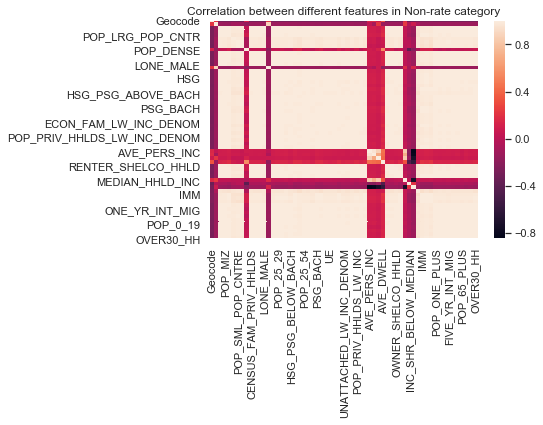

In [149]:
corr_nrate = df_nrate.corr()
sns.heatmap(corr_nrate)
    
plt.title('Correlation between different features in Non-rate category')

In the heat map above, very bright cells indicating highly correlated features. We compare the correlation between features and remove one of two features that have a correlation higher than 0.9:

In [150]:
columns = np.full((corr_nrate.shape[0],), True, dtype=bool)
for i in range(corr_nrate.shape[0]):
    for j in range(i+1, corr_nrate.shape[0]):
        if corr_nrate.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = df_nrate.columns[columns]
df_nrate = df_nrate[selected_columns]
df_nrate

Geocode   GNR  POP_2016  POP_DENSE  GNR.1  AVE_PERS_INC  AVE_PERS_INC_FEMALE  AVE_DWELL  MEDIAN_HHLD_INC  INC_SHR_BELOW_MEDIAN  GOVT_TRNSFR_INC
0          1   4.0  35151730        3.9    5.1         47487                38632     443058            70332                  20.5             11.7
1         10   4.0    519715        1.4    6.8         45210                34259     243157            67320                  24.2             16.5
2       1011   3.7    313270       16.2    6.5         48517                36888     285746            72211                  20.3             13.8
3       1012   4.1     92690        2.2    6.8         37795                27521     162012            56442                  21.9             24.2
4       1013   4.7     77685        2.5    8.1         38028                29950     195672            55950                  21.5             22.9
5       1014   4.7     36070        0.1    6.9         51808                38477     205671            94659                  23.7             12.8
6         11   4.1    142910       25.1    5.6         38899                34171     197966            61026                  23.2             17.6
7       1100   4.1    142905       25.1    5.6         38899                34171     197966            61026                  23.2             17.6
8         12   3.9    923600       17.4    5.5         41479                34132     230441            60745                  30.5             15.3
9       1201   4.1    194375       11.0    6.5         36861                29585     196741            53832                  22.6             19.5
10      1202   3.9    146245       11.8    5.9         38836                31348     177131            56018                  21.9             17.8
11      1203   4.2    158935       10.0    6.2         37425                31464     165757            54833                  21.6             23.1
12      1204   3.7    424040       61.4    4.7         46070                38196     302104            68950                  21.6             10.6
13        13   3.9    747100       10.5    4.9         39141                32504     170071            59313                  26.3             16.9
14      1301   3.9    209255       20.9    4.7         39683                34137     183055            61246                  23.3             15.6
15      1302   3.5    170535       16.4    5.0         41459                33258     191723            61609                  21.8             14.8
16      1303   3.9    174350        7.5    4.5         40351                33666     183356            62196                  23.2             14.4
17      1304   4.1     47775        6.1    4.9         35746                29788     138563            53333                  23.1             19.5
18      1305   4.5     25250        4.6    6.3         34676                29167     110786            48647                  22.1             23.7
19      1306   4.1     76375       16.3    6.3         35671                28365     128231            52826                  22.0             24.5
20      1307   3.8     43560        4.4    4.0         35710                29576     132839            55403                  23.2             23.8
21        24   3.7   8164360        6.0    4.3         42546                36203     290484            59808                  27.6             15.6
22      2401   4.1    197385        8.9    5.0         36525                31474     168853            52285                  23.5             21.5
23      2402   3.9    276370        2.8    4.8         39565                31558     196031            58024                  23.3             18.8
24      2403   4.1    729995       38.8    4.3         44574                38432     290478            62859                  22.8             14.4
25      2404   4.3    508515       11.9    4.5         36971                31141     177975            51102                  22.6

In [151]:
df_nrate.shape[1]

11

Out of 61 features in non-rate category, there are 50 that are highly correlated ( >=.9). Therefore we can reduce the number of features in this category to 11. Actually some of them are proportions or statistics like *average* or *median*. Only one is population. That is, all population columns are redundant to 1 which is *2016 population*. Now let's check the correlation between features in the **rate category**: 

Text(0.5, 1, 'Correlation between different features in rate category')

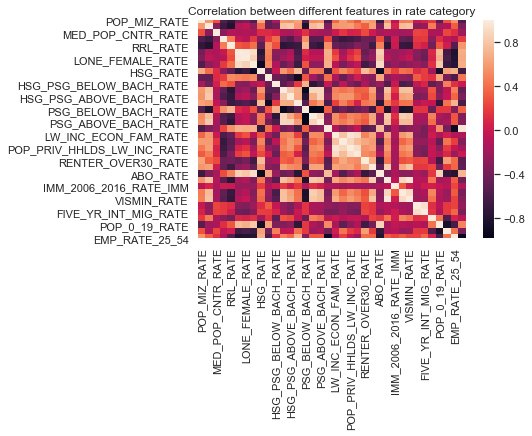

In [152]:
corr_rate = df_rate.corr()
sns.heatmap(corr_rate)
    
plt.title('Correlation between different features in rate category')

From the heat map it seems that there is't that much redundancy in this category. Again, let's remove one of two features that have a correlation higher than 0.9: 

In [153]:
columns = np.full((corr_rate.shape[0],), True, dtype=bool)
for i in range(corr_rate.shape[0]):
    for j in range(i+1, corr_rate.shape[0]):
        if corr_rate.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = df_rate.columns[columns]
df_rate = df_rate[selected_columns]
df_rate

POP_MIZ_RATE  LRG_POP_CNTR_RATE  MED_POP_CNTR_RATE  SML_POP_CNTRE_RATE  RRL_RATE  LONE_RATE  HSG_RATE  HSG_ONLY_RATE  HSG_PSG_BELOW_BACH_RATE  HSG_PSG_BACH_RATE  HSG_PSG_ABOVE_BACH_RATE  PSG_RATE  PSG_BELOW_BACH_RATE  PSG_BACH_RATE  PSG_ABOVE_BACH_RATE  UE_RATE  LW_INC_ECON_FAM_RATE  LOW_INC_UNATTACHED_RATE  RENTER_OVER30_RATE  OWNER_OVER30_RATE  IMM_RATE  IMM_2006_2016_RATE_IMM  IMM_2006_2016_RATE_TOTPOP  ONE_YR_INT_MIG_RATE  GROWTH_RATE  POP_0_19_RATE  POP_65_RATE  EMP_RATE_25_54
0            88.8               59.6                9.0                12.7      18.7       16.4      89.7           26.0                     35.5               28.6                      9.8      67.9                 53.8           31.0                 15.2      4.4                   8.8                     32.9                40.0               16.6      21.9                    30.1                        6.6                  4.3          5.0           22.4         16.9            80.4
1            60.1               34.3                0.0                23.7      41.9       15.1      90.5           25.0                     45.2               23.4                      6.3      66.2                 68.0           21.4                 10.6      9.5                   5.9                     27.6                39.4               10.6       2.4                    45.9                        1.1                  4.4          1.0           19.6         19.4            72.0
2            75.3               57.0                0.0                10.4      32.7       15.9      92.8           23.5                     42.0               26.9                      7.6      70.3                 63.3           24.1                 12.5      7.0                   6.1                     29.6                40.8               12.0       3.0                    47.3                        1.4                  4.3          2.2           19.9         17.9            75.9
3            46.7                0.0                0.0                34.4      65.6       11.7      84.4           31.3                     52.7               12.8                      2.9      55.4                 79.4           13.9                  6.7     14.8                   5.7                     24.6                39.9                8.2       0.9                    34.5                        0.3                  4.4         -1.0           18.0         23.8            63.4
4            43.1                0.0                0.0                53.8      46.2       16.5      89.9           28.4                     51.0               16.6                      4.0      62.3                 74.4           18.1                  7.5     12.6                   6.8                     25.5                41.9               10.2       1.4                    34.6                        0.5                  5.0         -0.4           18.0         23.0            65.7
5             0.0                0.0                0.0                47.4      52.7       14.0      80.9           24.5                     56.0               17.0                      2.5      62.4                 78.0           16.1                  5.9     14.1                   3.0                     16.2                15.6                5.0       2.7                    54.5                        1.5                  3.4         -0.9           23.7         14.0            69.7
6            77.8                0.0               31.3                13.8      54.9       15.7      93.4           29.9                     34.9               28.4                      6.9      65.9                 59.5           28.5                 12.1      7.6                   6.0                     27.6                36.3               11.1       6.4                    52.5                        3.4                  5.8          1.9           21.9         19.4            79.5
7            77.8                0.0               31.3              

In [154]:
df_rate.shape[1]

28

Out of 36 features in rate category, 8 are highly correlated ( >=0.9), therefore we can reduce the number of features in this category to 28. Then in total we have reduced the number of features to 39:

In [155]:
df39 = pd.concat([df_nrate, df_rate], axis=1)

In [156]:
df39.head()

Geocode  GNR  POP_2016  POP_DENSE  GNR.1  AVE_PERS_INC  AVE_PERS_INC_FEMALE  AVE_DWELL  MEDIAN_HHLD_INC  INC_SHR_BELOW_MEDIAN  GOVT_TRNSFR_INC  POP_MIZ_RATE  LRG_POP_CNTR_RATE  MED_POP_CNTR_RATE  SML_POP_CNTRE_RATE  RRL_RATE  LONE_RATE  HSG_RATE  HSG_ONLY_RATE  HSG_PSG_BELOW_BACH_RATE  HSG_PSG_BACH_RATE  HSG_PSG_ABOVE_BACH_RATE  PSG_RATE  PSG_BELOW_BACH_RATE  PSG_BACH_RATE  PSG_ABOVE_BACH_RATE  UE_RATE  LW_INC_ECON_FAM_RATE  LOW_INC_UNATTACHED_RATE  RENTER_OVER30_RATE  OWNER_OVER30_RATE  IMM_RATE  IMM_2006_2016_RATE_IMM  IMM_2006_2016_RATE_TOTPOP  ONE_YR_INT_MIG_RATE  GROWTH_RATE  POP_0_19_RATE  POP_65_RATE  EMP_RATE_25_54
0        1  4.0  35151730        3.9    5.1         47487                38632     443058            70332                  20.5             11.7          88.8               59.6                9.0                12.7      18.7       16.4      89.7           26.0                     35.5               28.6                      9.8      67.9                 53.8           31.0                 15.2      4.4                   8.8                     32.9                40.0               16.6      21.9                    30.1                        6.6                  4.3          5.0           22.4         16.9            80.4
1       10  4.0    519715        1.4    6.8         45210                34259     243157            67320                  24.2             16.5          60.1               34.3                0.0                23.7      41.9       15.1      90.5           25.0                     45.2               23.4                      6.3      66.2                 68.0           21.4                 10.6      9.5                   5.9                     27.6                39.4               10.6       2.4                    45.9                        1.1                  4.4          1.0           19.6         19.4            72.0
2     1011  3.7    313270       16.2    6.5         48517                36888     285746            72211                  20.3             13.8          75.3               57.0                0.0                10.4      32.7       15.9      92.8           23.5                     42.0               26.9                      7.6      70.3                 63.3           24.1                 12.5      7.0                   6.1                     29.6                40.8               12.0       3.0                    47.3                        1.4                  4.3          2.2           19.9         17.9            75.9
3     1012  4.1     92690        2.2    6.8         37795                27521     162012            56442                  21.9             24.2          46.7                0.0                0.0                34.4      65.6       11.7      84.4           31.3                     52.7               12.8                      2.9      55.4                 79.4           13.9                  6.7     14.8                   5.7                     24.6                39.9                8.2       0.9                    34.5                        0.3                  4.4         -1.0           18.0         23.8            63.4
4     1013  4.7     77685        2.5    8.1         38028                29950     195672            55950                  21.5             22.9          43.1                0.0                0.0                53.8      46.2       16.5      89.9           28.4                     51.0               16.6                      4.0      62.3                 74.4           18.1                  7.5     12.6                   6.8                     25.5                41.9               10.2       1.4                    34.6                        0.5                  5.0         -0.4           18.0         23.0            65.7

In [157]:
df39.describe()

Geocode         GNR      POP_2016   POP_DENSE       GNR.1  AVE_PERS_INC  AVE_PERS_INC_FEMALE     AVE_DWELL  MEDIAN_HHLD_INC  INC_SHR_BELOW_MEDIAN  GOVT_TRNSFR_INC  POP_MIZ_RATE  LRG_POP_CNTR_RATE  MED_POP_CNTR_RATE  SML_POP_CNTRE_RATE    RRL_RATE   LONE_RATE    HSG_RATE  HSG_ONLY_RATE  HSG_PSG_BELOW_BACH_RATE  HSG_PSG_BACH_RATE  HSG_PSG_ABOVE_BACH_RATE    PSG_RATE  PSG_BELOW_BACH_RATE  PSG_BACH_RATE  PSG_ABOVE_BACH_RATE     UE_RATE  LW_INC_ECON_FAM_RATE  LOW_INC_UNATTACHED_RATE  RENTER_OVER30_RATE  OWNER_OVER30_RATE    IMM_RATE  IMM_2006_2016_RATE_IMM  IMM_2006_2016_RATE_TOTPOP  ONE_YR_INT_MIG_RATE  GROWTH_RATE  POP_0_19_RATE  POP_65_RATE  EMP_RATE_25_54
count   127.000000  127.000000  1.270000e+02   127.00000  127.000000    127.000000           127.000000  1.270000e+02       127.000000            127.000000       127.000000    127.000000         127.000000         127.000000          127.000000  127.000000  127.000000  127.000000     127.000000               127.000000         127.000000               127.000000  127.000000           127.000000     127.000000           127.000000  127.000000            127.000000               127.000000          127.000000         127.000000  127.000000              127.000000                 127.000000           127.000000   127.000000     127.000000   127.000000      127.000000
mean   3283.417323    4.827559  8.306347e+05   196.35748    6.077953  44704.582677         36830.984252  3.337558e+05     70044.692913             22.247244        14.324409     68.637008          26.453543          11.937008           25.014961   36.598425   17.221260   84.861417      31.836220                40.233858          21.855118                 6.018898   61.746457            64.455906      25.166929            10.404724    5.577953              6.570866                26.101575           37.062205          13.206299   11.667717               31.288976                   3.527559             4.681102     3.181890      23.559843    17.446457       77.916535
std    1824.155993    1.512890  3.413698e+06   710.76828    1.824564   7154.292111          5636.364186  2.001311e+05     13465.638646              1.905665         4.502657     32.161415          35.747998          18.712265           19.268862   21.542774    6.033447   11.377366       9.523177                 8.934144           6.998863                 3.355184    9.364012            11.158075       6.825432             4.686215    3.322265              3.427714                 9.061536            9.826034           5.109309   11.537963               17.117276                   3.580340             1.231191     3.915768       5.500408     5.002139        7.439532
min       1.000000    2.400000  2.630000e+03     0.00000    3.000000  28882.000000         24812.000000  0.000000e+00     47680.000000             16.400000         5.500000      0.000000           0.000000           0.000000            0.000000    0.000000    9.100000   35.900000      13.000000                23.000000           0.000000                 0.000000   24.500000            33.100000      11.800000             3.900000    2.000000              0.000000                 0.000000            0.000000           0.000000    0.000000                0.000000                   0.000000             1.900000    -6.200000      15.900000     3.800000       45.400000
25%    2402.500000    3.900000  7.662500e+04     2.10000    4.750000  40592.500000         33632.500000  2.091425e+05     61559.500000             21.450000        11.100000     50.000000           0.000000           0.000000            9.150000   18.650000   14.350000   82.850000      25.650000                33.650000          17.000000                 3.800000   57.150000            57.550000      20.650000             6.550000    3.700000              4.900000                22.000000           32.450000          10.250000    4.600000               17.250000                   0.900000             3.600000     0.550000      20.250

In [158]:
to_multiply = [col for col in df39 if max(df39[col]) > 100]
to_multiply

['Geocode',
 'POP_2016',
 'POP_DENSE',
 'AVE_PERS_INC',
 'AVE_PERS_INC_FEMALE',
 'AVE_DWELL',
 'MEDIAN_HHLD_INC',
 'RRL_RATE']

Looking at the statistics description of selected features, all features values are almost in the range (0,100) except for *POP_2016*, *POP_DENSE*, *AVE_PERS_INC*, *AVE_PERS_INC_FEMALE*, *AVE_DWELL*, *MEDIAN_HHLD_INC*. We can transform those columns values to fit in the range (0,100). We also add the geographical name for future analysis: 

In [159]:
df39['POP_2016_in_million'] = df39['POP_2016'].values/1000000
df39['POP_DENSE_in_100'] = df39['POP_DENSE'].values/100
df39['AVE_PERS_INC_in_1000'] = df39['AVE_PERS_INC'].values/1000
df39['AVE_PERS_INC_FEMALE_in_1000'] = df39['AVE_PERS_INC_FEMALE'].values/1000
df39['MEDIAN_HHLD_INC_in_1000'] = df39['MEDIAN_HHLD_INC'].values/1000
df39['AVE_DWELL_in_100000'] = df39['AVE_DWELL'].values/100000
df39 = df39.drop(['POP_2016','POP_DENSE','AVE_PERS_INC','AVE_PERS_INC_FEMALE','AVE_DWELL','MEDIAN_HHLD_INC'], axis = 1)
df39 = pd.concat([df39, rawdf['Geo Name']], axis=1)
df39.head()

Geocode  GNR  GNR.1  INC_SHR_BELOW_MEDIAN  GOVT_TRNSFR_INC  POP_MIZ_RATE  LRG_POP_CNTR_RATE  MED_POP_CNTR_RATE  SML_POP_CNTRE_RATE  RRL_RATE  LONE_RATE  HSG_RATE  HSG_ONLY_RATE  HSG_PSG_BELOW_BACH_RATE  HSG_PSG_BACH_RATE  HSG_PSG_ABOVE_BACH_RATE  PSG_RATE  PSG_BELOW_BACH_RATE  PSG_BACH_RATE  PSG_ABOVE_BACH_RATE  UE_RATE  LW_INC_ECON_FAM_RATE  LOW_INC_UNATTACHED_RATE  RENTER_OVER30_RATE  OWNER_OVER30_RATE  IMM_RATE  IMM_2006_2016_RATE_IMM  IMM_2006_2016_RATE_TOTPOP  ONE_YR_INT_MIG_RATE  GROWTH_RATE  POP_0_19_RATE  POP_65_RATE  EMP_RATE_25_54  POP_2016_in_million  POP_DENSE_in_100  AVE_PERS_INC_in_1000  AVE_PERS_INC_FEMALE_in_1000  MEDIAN_HHLD_INC_in_1000  AVE_DWELL_in_100000                                           Geo Name
0        1  4.0    5.1                  20.5             11.7          88.8               59.6                9.0                12.7      18.7       16.4      89.7           26.0                     35.5               28.6                      9.8      67.9                 53.8           31.0                 15.2      4.4                   8.8                     32.9                40.0               16.6      21.9                    30.1                        6.6                  4.3          5.0           22.4         16.9            80.4            35.151730             0.039                47.487                       38.632                   70.332              4.43058                                             Canada
1       10  4.0    6.8                  24.2             16.5          60.1               34.3                0.0                23.7      41.9       15.1      90.5           25.0                     45.2               23.4                      6.3      66.2                 68.0           21.4                 10.6      9.5                   5.9                     27.6                39.4               10.6       2.4                    45.9                        1.1                  4.4          1.0           19.6         19.4            72.0             0.519715             0.014                45.210                       34.259                   67.320              2.43157  Newfoundland and Labrador / Terre-Neuve-et-Lab...
2     1011  3.7    6.5                  20.3             13.8          75.3               57.0                0.0                10.4      32.7       15.9      92.8           23.5                     42.0               26.9                      7.6      70.3                 63.3           24.1                 12.5      7.0                   6.1                     29.6                40.8               12.0       3.0                    47.3                        1.4                  4.3          2.2           19.9         17.9            75.9             0.313270             0.162                48.517                       36.888                   72.211              2.85746             1011 Eastern Regional Health Authority
3     1012  4.1    6.8                  21.9             24.2          46.7                0.0                0.0                34.4      65.6       11.7      84.4           31.3                     52.7               12.8                      2.9      55.4                 79.4           13.9                  6.7     14.8                   5.7                     24.6                39.9                8.2       0.9                    34.5                        0.3                  4.4         -1.0           18.0         23.8            63.4             0.092690             0.022                37.795                       27.521                   56.442              1.62012             1012 Central Regional Health Authority
4     1013  4.7    8.1                  21.5             22.9          43.1                0.0                0.0                53.8      46.2       16.5      89.9           28.4                     51.0               16.6                      4.0      62.3                 74.4           18.1                  7.5   

Text(0.5, 1, 'Correlation between 39 reduced features')

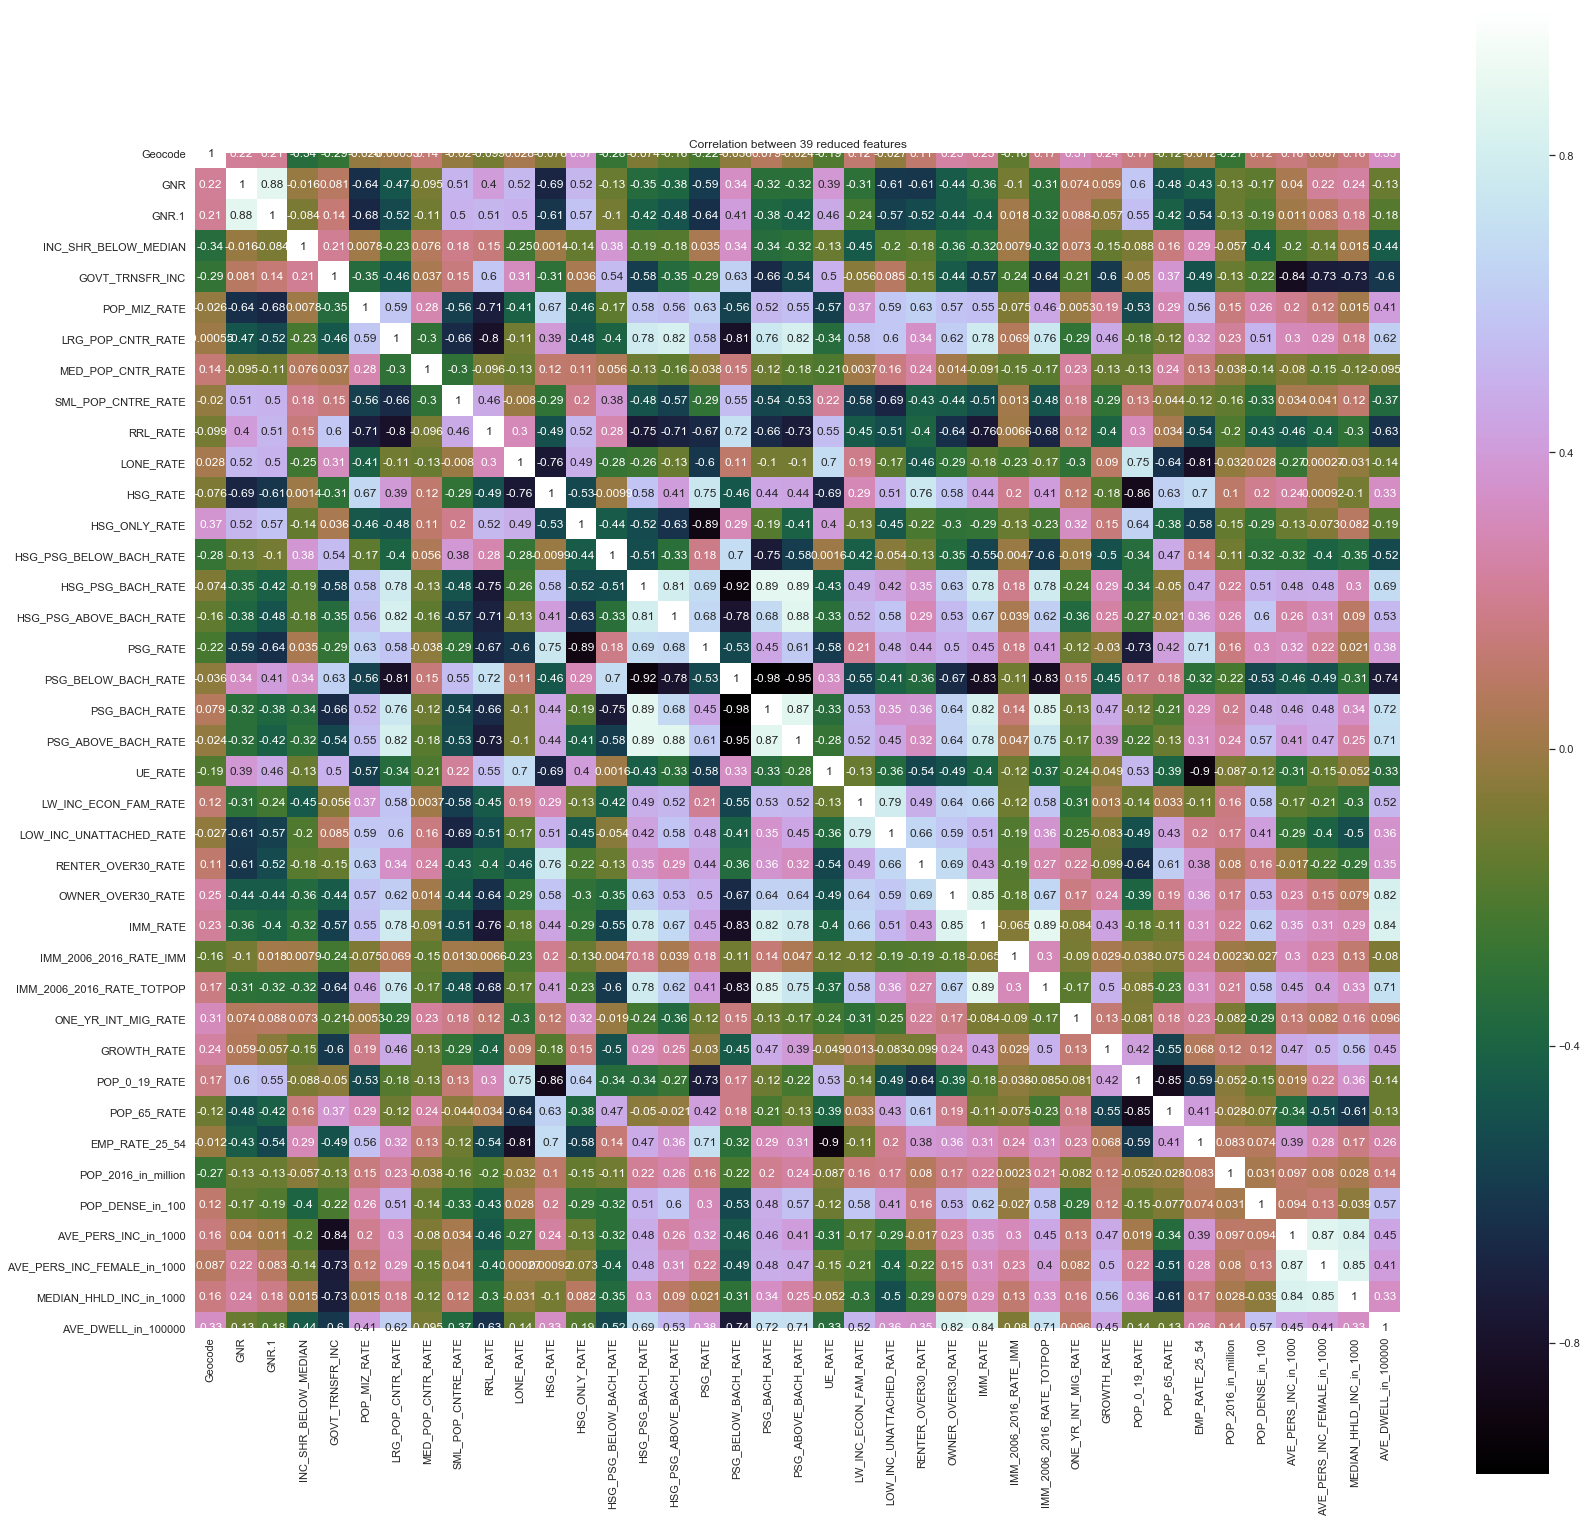

In [160]:
corr39 = df39.corr()
plt.figure(figsize=(27,27))
sns.heatmap(corr39, 
            xticklabels=corr39.columns.values,
            yticklabels=corr39.columns.values, annot=True, cmap='cubehelix', square=True)
plt.title('Correlation between 39 reduced features')

# <a id='q3'>7. Question 3 </a>

To further analysis of the data we work with 39 selected features. We also pick the data for Canada, provinces and territories and store in `df14` and do some analysis for Canada and provinces. We also set the index of `df` to be the *Geocode*.

In [161]:
df39.set_index("Geocode", inplace=True)

In [162]:
Geocode_14 = [1, 10, 11, 12, 13, 24, 35, 46, 47, 48, 59, 60, 61, 62]
Geoname_14 = ['Canada', 'Newfoundland and Labrador', 'Prince Edward Island', 'Nova Scotia', 'New Brunswick', 'Quebec', 'Ontario', 'Manitoba', 'Saskatchewan', 'Alberta', 'British Columbia', 'Yukon', 'Northwest Territories', 'Nunavut']
Geo14 = pd.DataFrame({'Geocode': Geocode_14, 'Geoname': Geoname_14})

In [163]:
df14 = df39.loc[Geocode_14]
df14

GNR  GNR.1  INC_SHR_BELOW_MEDIAN  GOVT_TRNSFR_INC  POP_MIZ_RATE  LRG_POP_CNTR_RATE  MED_POP_CNTR_RATE  SML_POP_CNTRE_RATE  RRL_RATE  LONE_RATE  HSG_RATE  HSG_ONLY_RATE  HSG_PSG_BELOW_BACH_RATE  HSG_PSG_BACH_RATE  HSG_PSG_ABOVE_BACH_RATE  PSG_RATE  PSG_BELOW_BACH_RATE  PSG_BACH_RATE  PSG_ABOVE_BACH_RATE  UE_RATE  LW_INC_ECON_FAM_RATE  LOW_INC_UNATTACHED_RATE  RENTER_OVER30_RATE  OWNER_OVER30_RATE  IMM_RATE  IMM_2006_2016_RATE_IMM  IMM_2006_2016_RATE_TOTPOP  ONE_YR_INT_MIG_RATE  GROWTH_RATE  POP_0_19_RATE  POP_65_RATE  EMP_RATE_25_54  POP_2016_in_million  POP_DENSE_in_100  AVE_PERS_INC_in_1000  AVE_PERS_INC_FEMALE_in_1000  MEDIAN_HHLD_INC_in_1000  AVE_DWELL_in_100000                                           Geo Name
Geocode                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
1        4.0    5.1                  20.5             11.7          88.8               59.6                9.0                12.7      18.7       16.4      89.7           26.0                     35.5               28.6                      9.8      67.9                 53.8           31.0                 15.2      4.4                   8.8                     32.9                40.0               16.6      21.9                    30.1                        6.6                  4.3          5.0           22.4         16.9            80.4            35.151730             0.039                47.487                       38.632                   70.332              4.43058                                             Canada
10       4.0    6.8                  24.2             16.5          60.1               34.3                0.0                23.7      41.9       15.1      90.5           25.0                     45.2               23.4                      6.3      66.2                 68.0           21.4                 10.6      9.5                   5.9                     27.6                39.4               10.6       2.4                    45.9                        1.1                  4.4          1.0           19.6         19.4            72.0             0.519715             0.014                45.210                       34.259                   67.320              2.43157  Newfoundland and Labrador / Terre-Neuve-et-Lab...
11       4.1    5.6                  23.2             17.6          77.8                0.0               31.3                13.8      54.9       15.7      93.4           29.9                     34.9               28.4                      6.9      65.9                 59.5           28.5                 12.1      7.6                   6.0                     27.6                36.3               11.1       6.4                    52.5                        3.4                  5.8          1.9           21.9         19.4            79.5             0.142910             0.251                38.899                       34.171                   61.026              1.97966      Prince Edward Island / Île-du-Prince-Édouard 
12       3.9    5.5                  30.5             15.3          73.6               34.3                0.0                23.1      42.6       17.3      92.1           28.5                     35.7               28.1                      7.7      67.2                 57.8           29.2                 13.0      5.6                  

### <a id='udcov'>7.1 Univariate Distribution of variables </a>

Below is the histogram of 39 selected features where we can have a quick look at the overall distribution of the features and also detect the presence of possible outliers. 

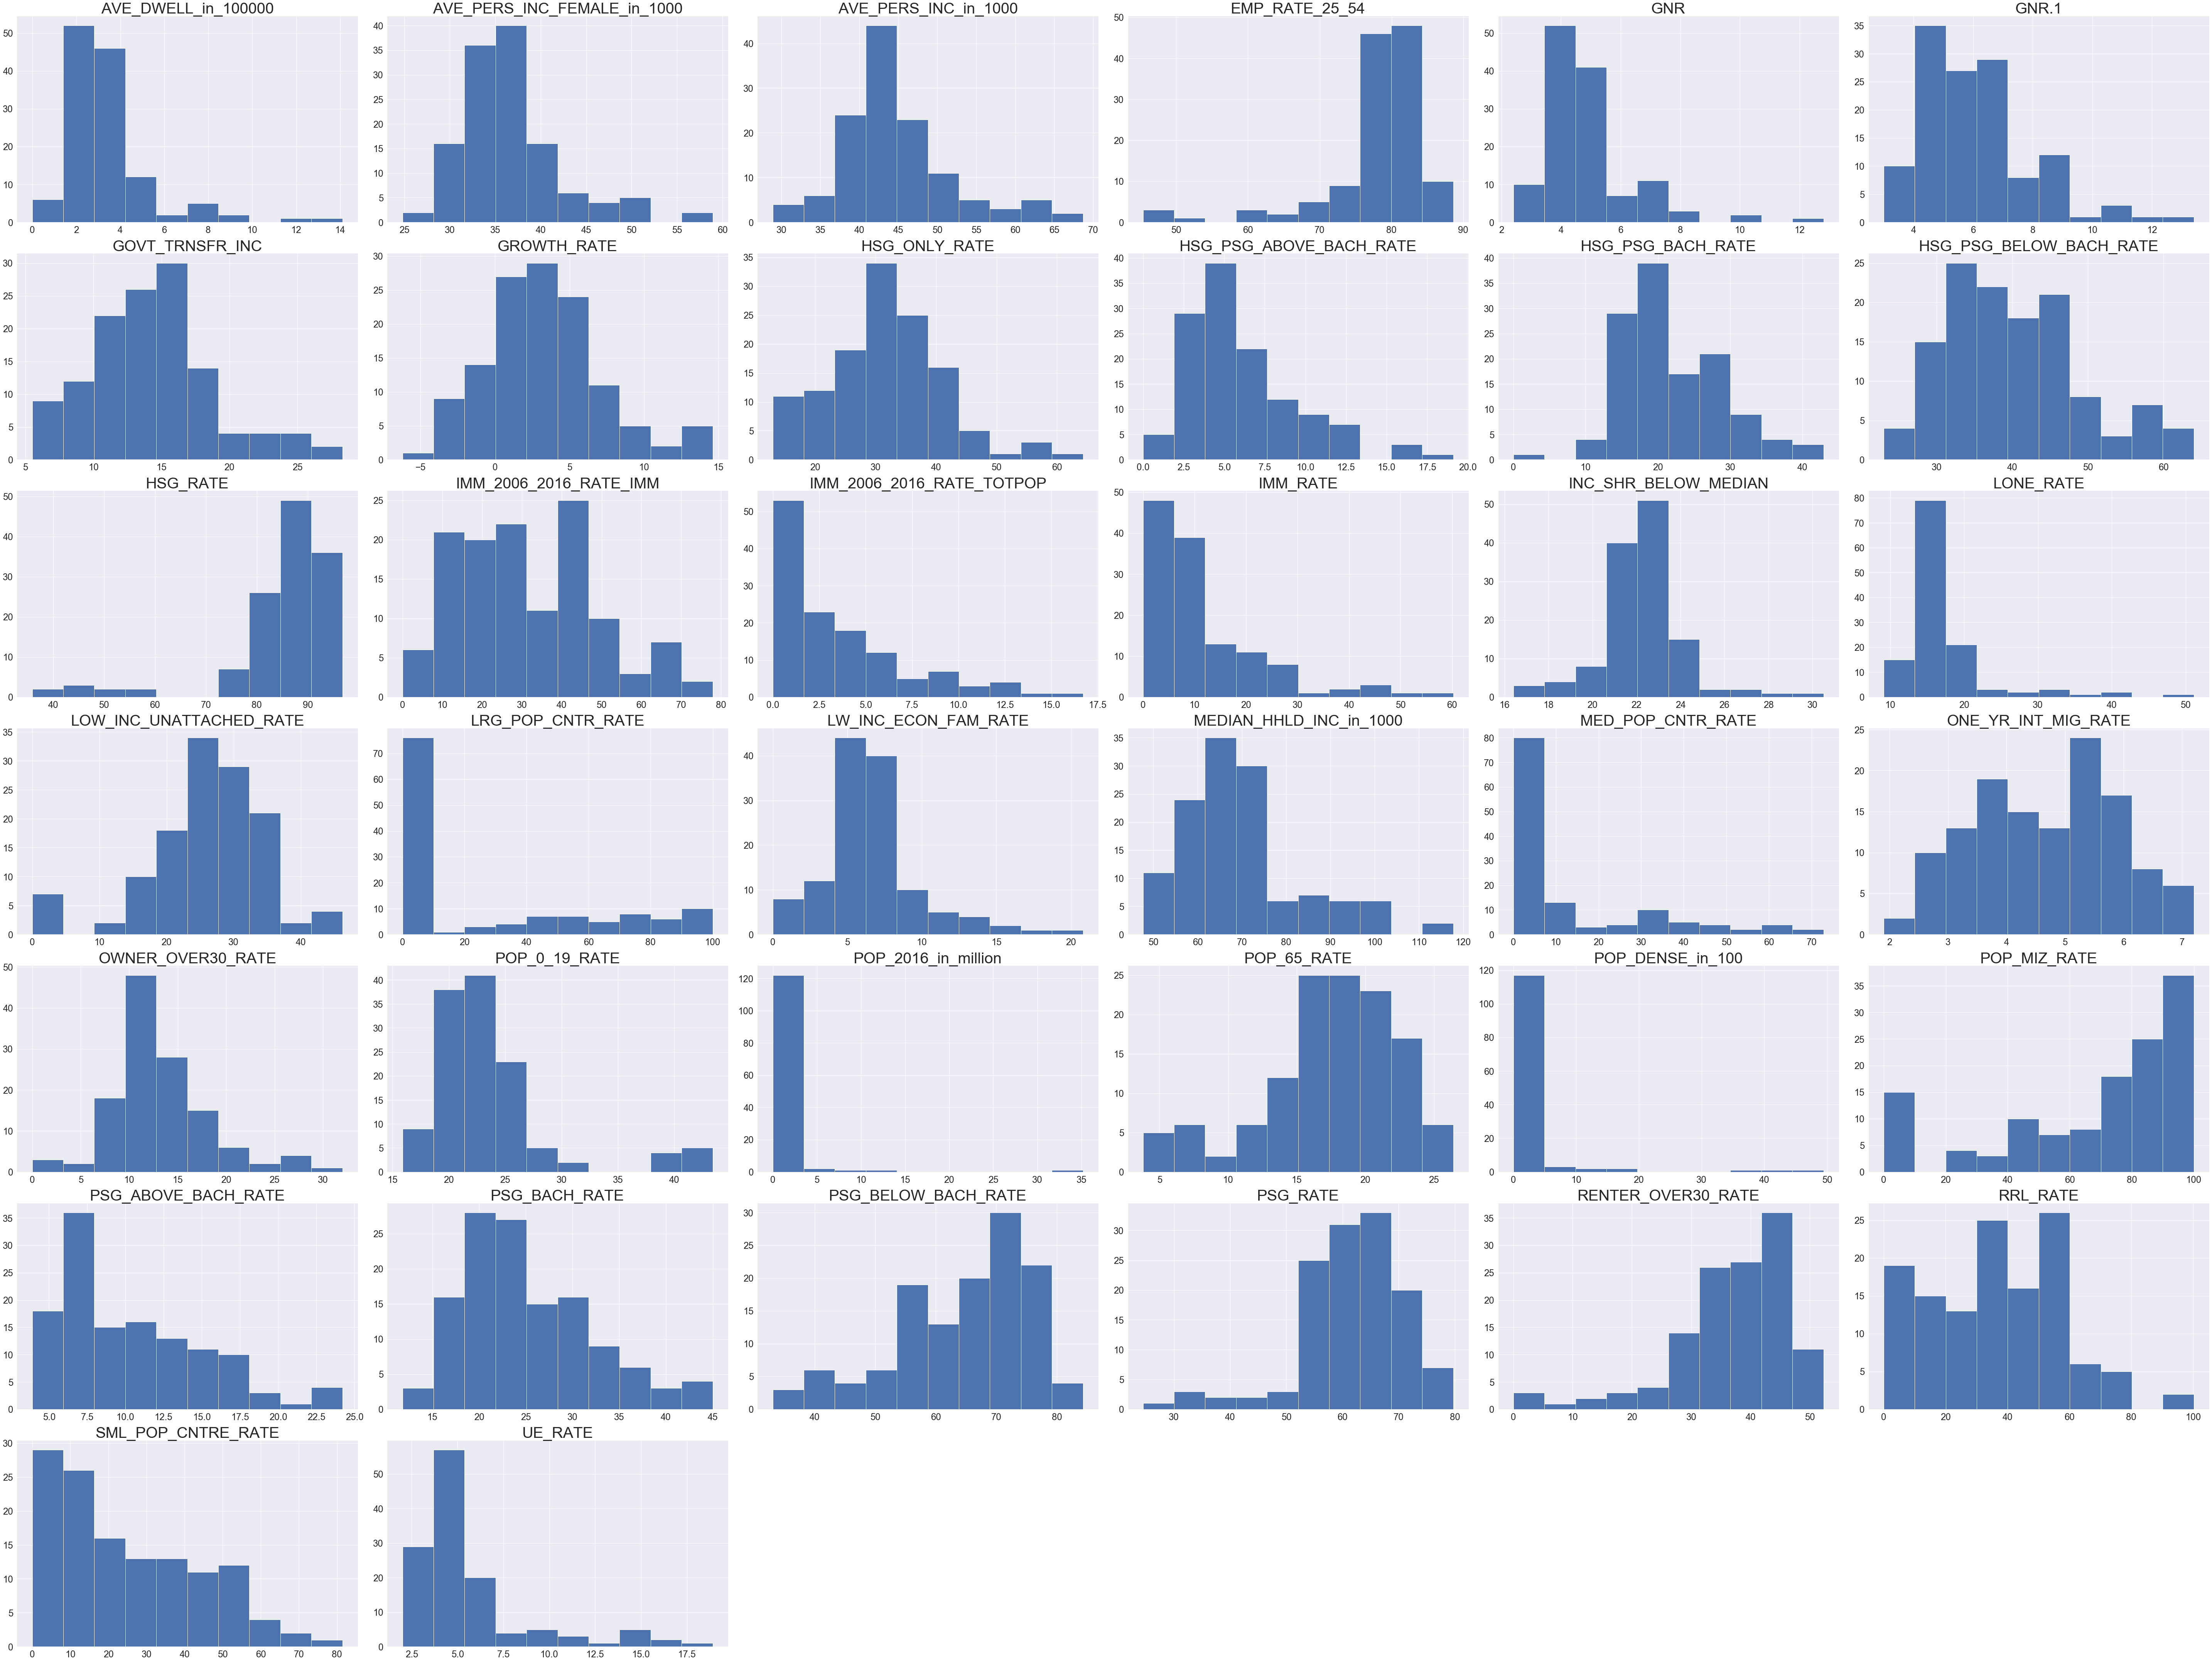

In [164]:
import matplotlib
params = {'axes.titlesize':'40',
          'xtick.labelsize':'24',
          'ytick.labelsize':'24'}
matplotlib.rcParams.update(params)
df39.hist(figsize=(80,60))
plt.tight_layout()

From the above histograms we can easily detect some of the outliers; for example:

We expect to have outliers in 2016 population, while about 120 (out of 127) of regions in the list have population less than 5 million, a few (about 7) have population 5-15 million. Note 35 million is the population of Canada. The same is true for population density; while for most regions population density is less than 500 per square kilometer, few have density of 500-1000 (or even 3500-5000) per square kilometer! 

In most regions, lone-parent family rate is between 10-20 percent of total census family population while for a few the rate could be as high as 50% of total census family population.  

High school graduate rates in most regions are more than 70%, however for a few regions is as low as 20-50%. 

We also have some outliers in Average dwelling with average value of dwelling as high as 1200,000 to 1400,000.

In this following we investigate the distribution of some selected features and flag some regions as potential outliers.

In [165]:
data_dictionary.set_index("Feature", inplace=True)
data_dictionary = data_dictionary.rename(index={'GROWTH':'GROWTH_RATE','POP_2016':'POP_2016_in_million','POP_DENSE':'POP_DENSE_in_100','AVE_PERS_INC':'AVE_PERS_INC_in_1000' ,'AVE_PERS_INC_FEMALE':'AVE_PERS_INC_FEMALE_in_1000','AVE_DWELL':'AVE_DWELL_in_100000','MEDIAN_HHLD_INC':'MEDIAN_HHLD_INC_in_1000'})


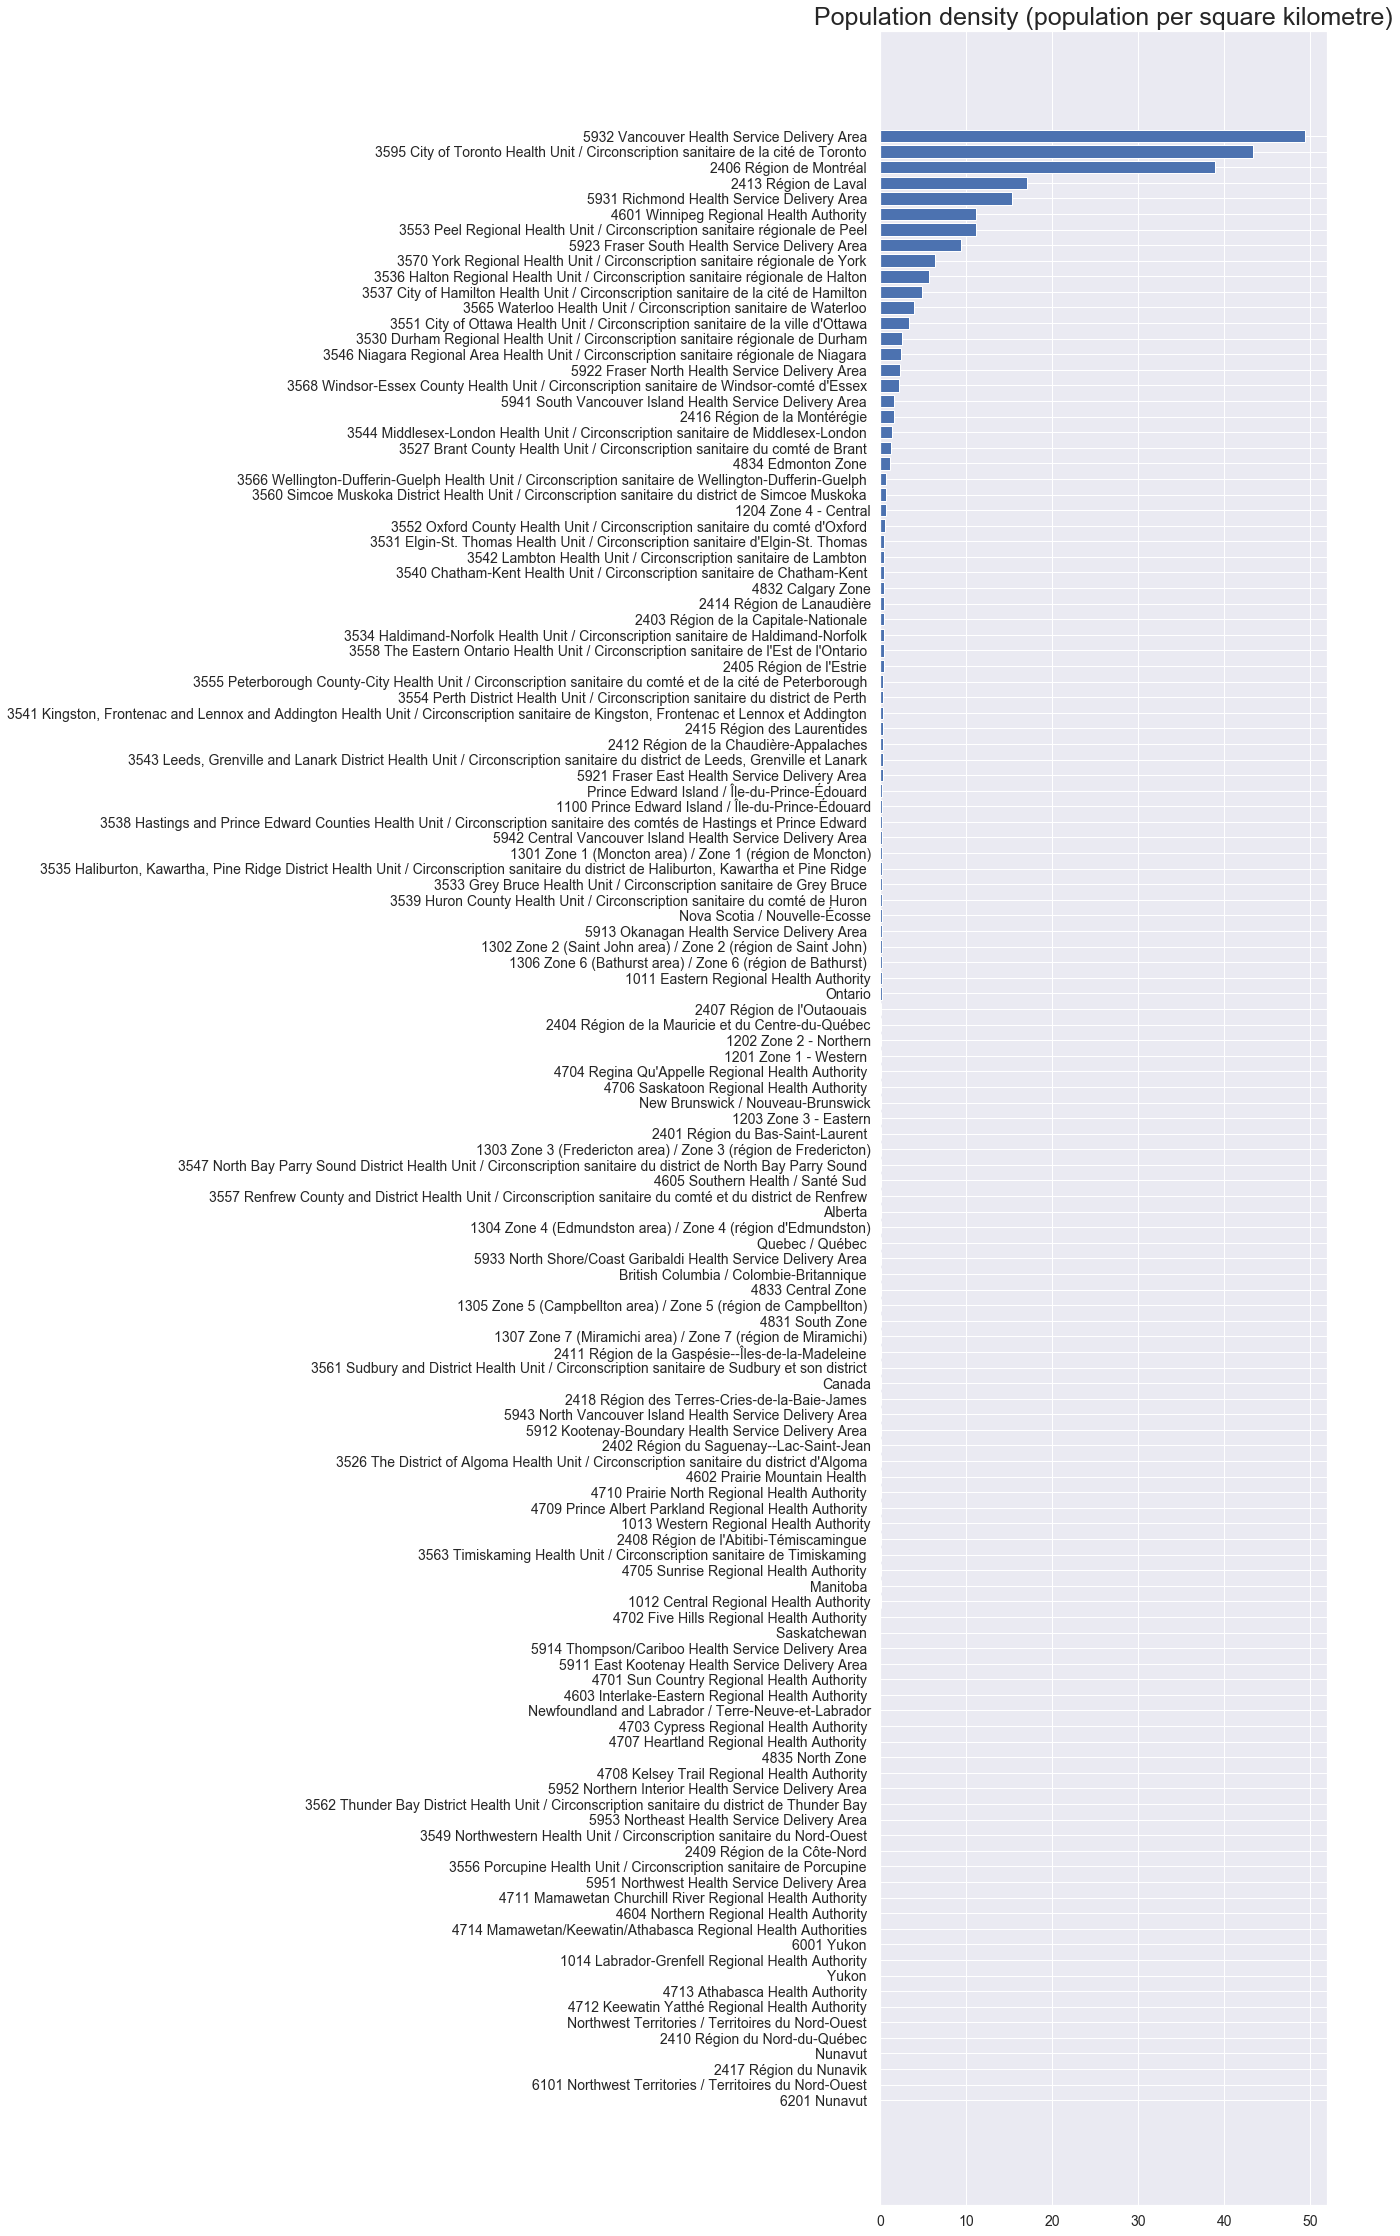

In [166]:
col = 'POP_DENSE_in_100'
plt.figure(figsize = (8, 40))
g = df39.sort_values(by=[col])
plt.barh(df39["Geo Name"][g.index], g[col].values) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title(data_dictionary.loc[col, 'Description'], fontsize=25)
plt.show()

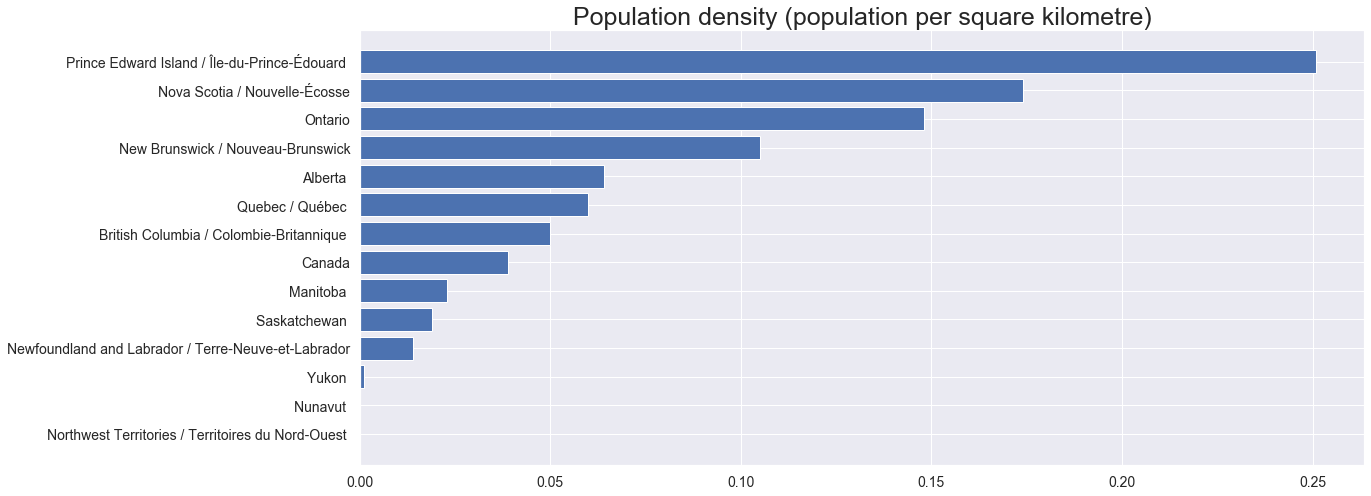

In [174]:
col = 'POP_DENSE_in_100'
plt.figure(figsize = (18, 8))
g = df14.sort_values(by=[col])
plt.barh(df14["Geo Name"][g.index], g[col].values) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title(data_dictionary.loc[col, 'Description'], fontsize=25)
plt.show()

The first 10 regions in the above are potential outliers among regions where Vancouver, Toronto and Montreal particularly stand out with population density 4000-5000 per square kilometer. Among provinces PEI stands out with the population density 25 per square kilometer.  

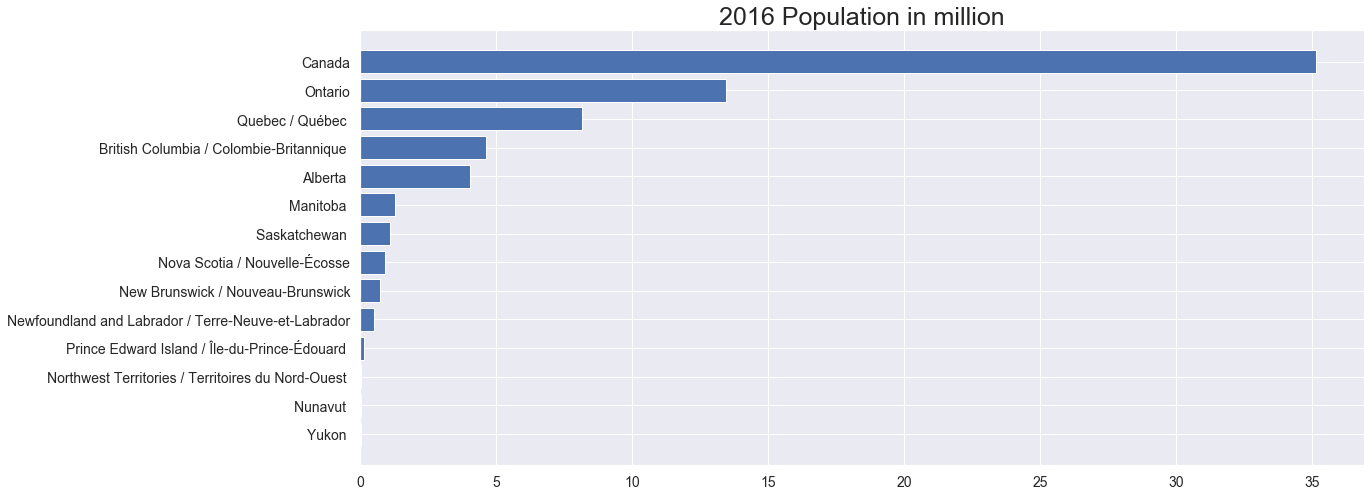

In [170]:
col = 'POP_2016_in_million'
plt.figure(figsize = (18, 8))
g = df14.sort_values(by=[col])
plt.barh(df14["Geo Name"][g.index], g[col].values) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('2016 Population in million', fontsize=25)
plt.show()

Below we can see the sorted distribution for *Lone parent families* for all regions and for provinces. Keewatin with 50% stands out among regions and Nunavut with close to 30% among provinces and territories. 

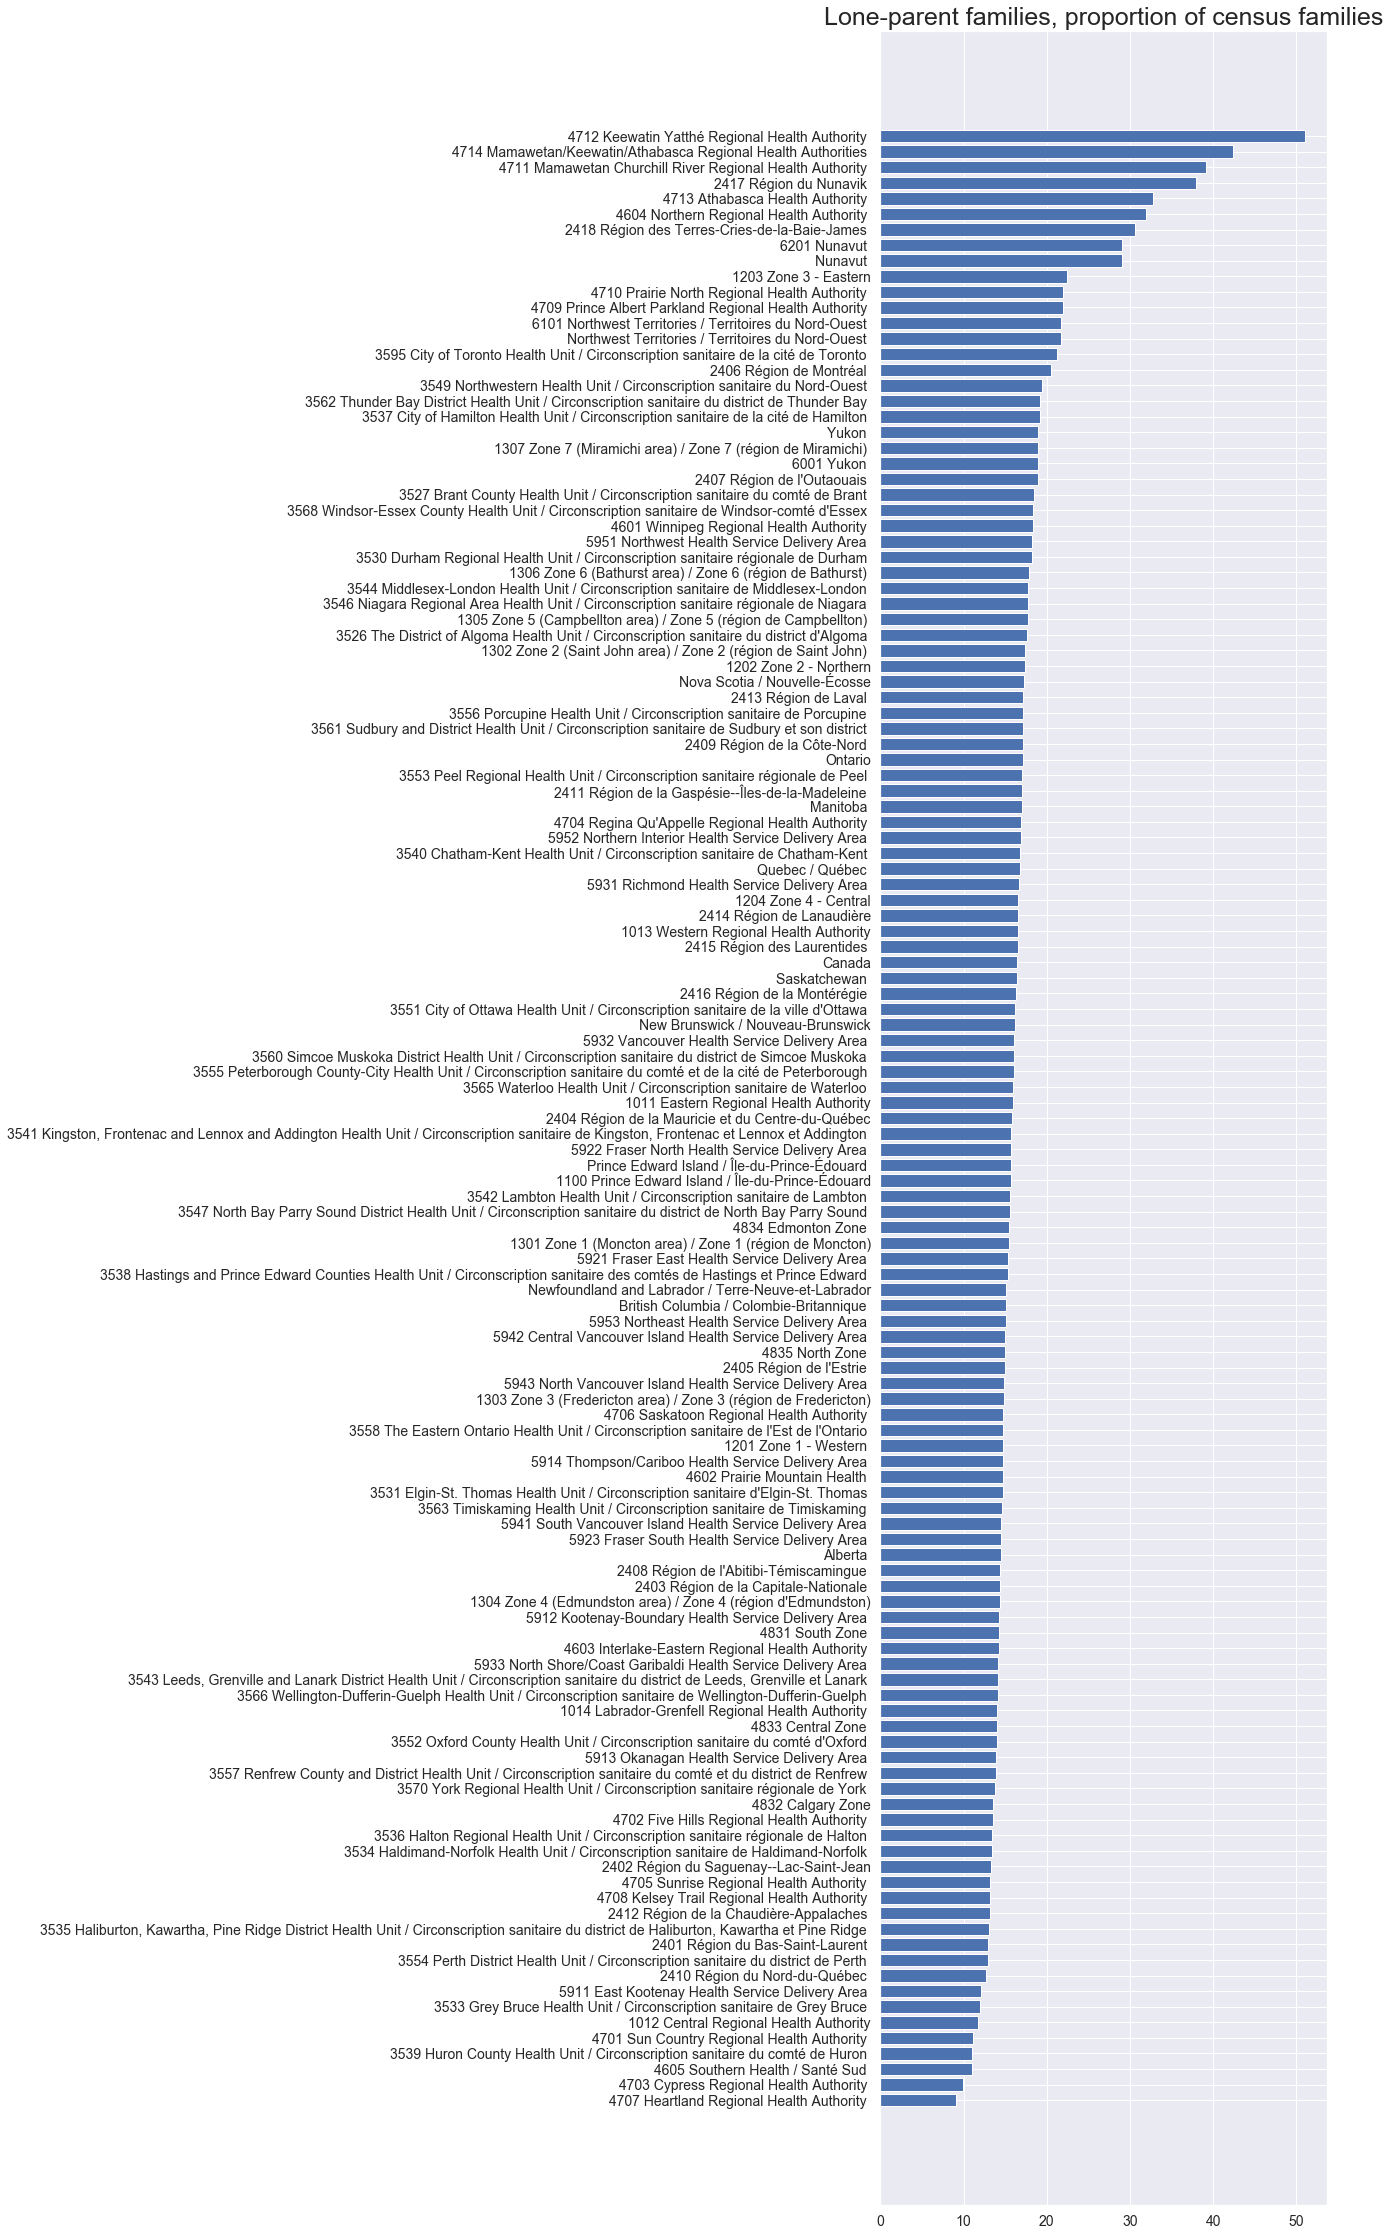

In [171]:
col = 'LONE_RATE'
plt.figure(figsize = (8, 40))
g = df39.sort_values(by=[col])
plt.barh(df39["Geo Name"][g.index], g[col].values) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title(data_dictionary.loc[col, 'Description'], fontsize=25)
plt.show()

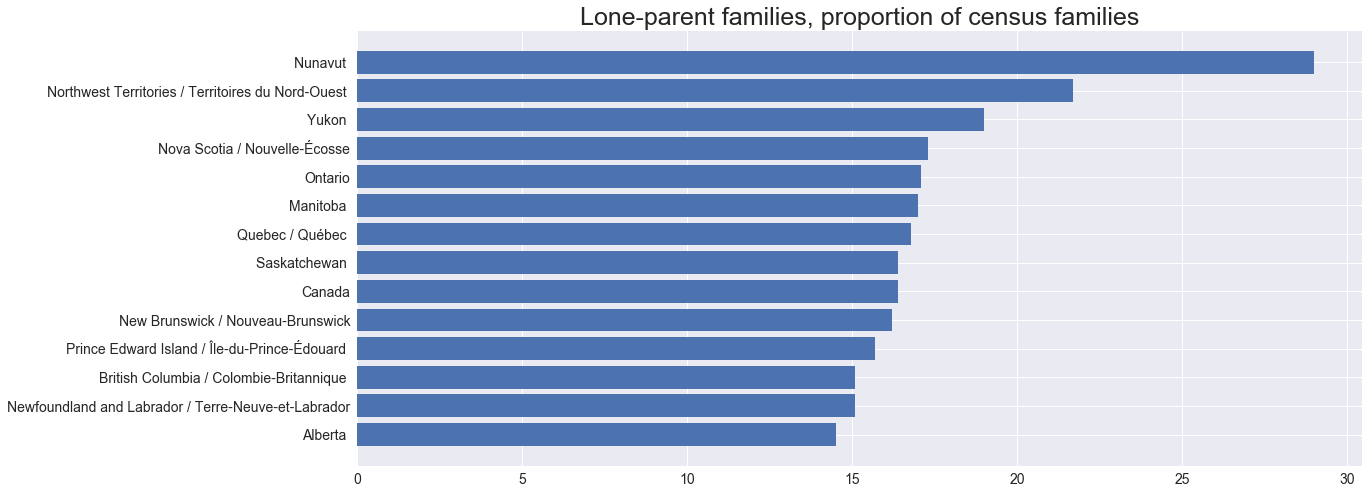

In [169]:
col = 'LONE_RATE'
plt.figure(figsize = (18, 8))
g = df14.sort_values(by=[col])
plt.barh(df14["Geo Name"][g.index], g[col].values) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title(data_dictionary.loc[col, 'Description'], fontsize=25)
plt.show()

In distribution chart below, we see 4 regions at the end of the chart with high school graduates rate less than 50% stand out.

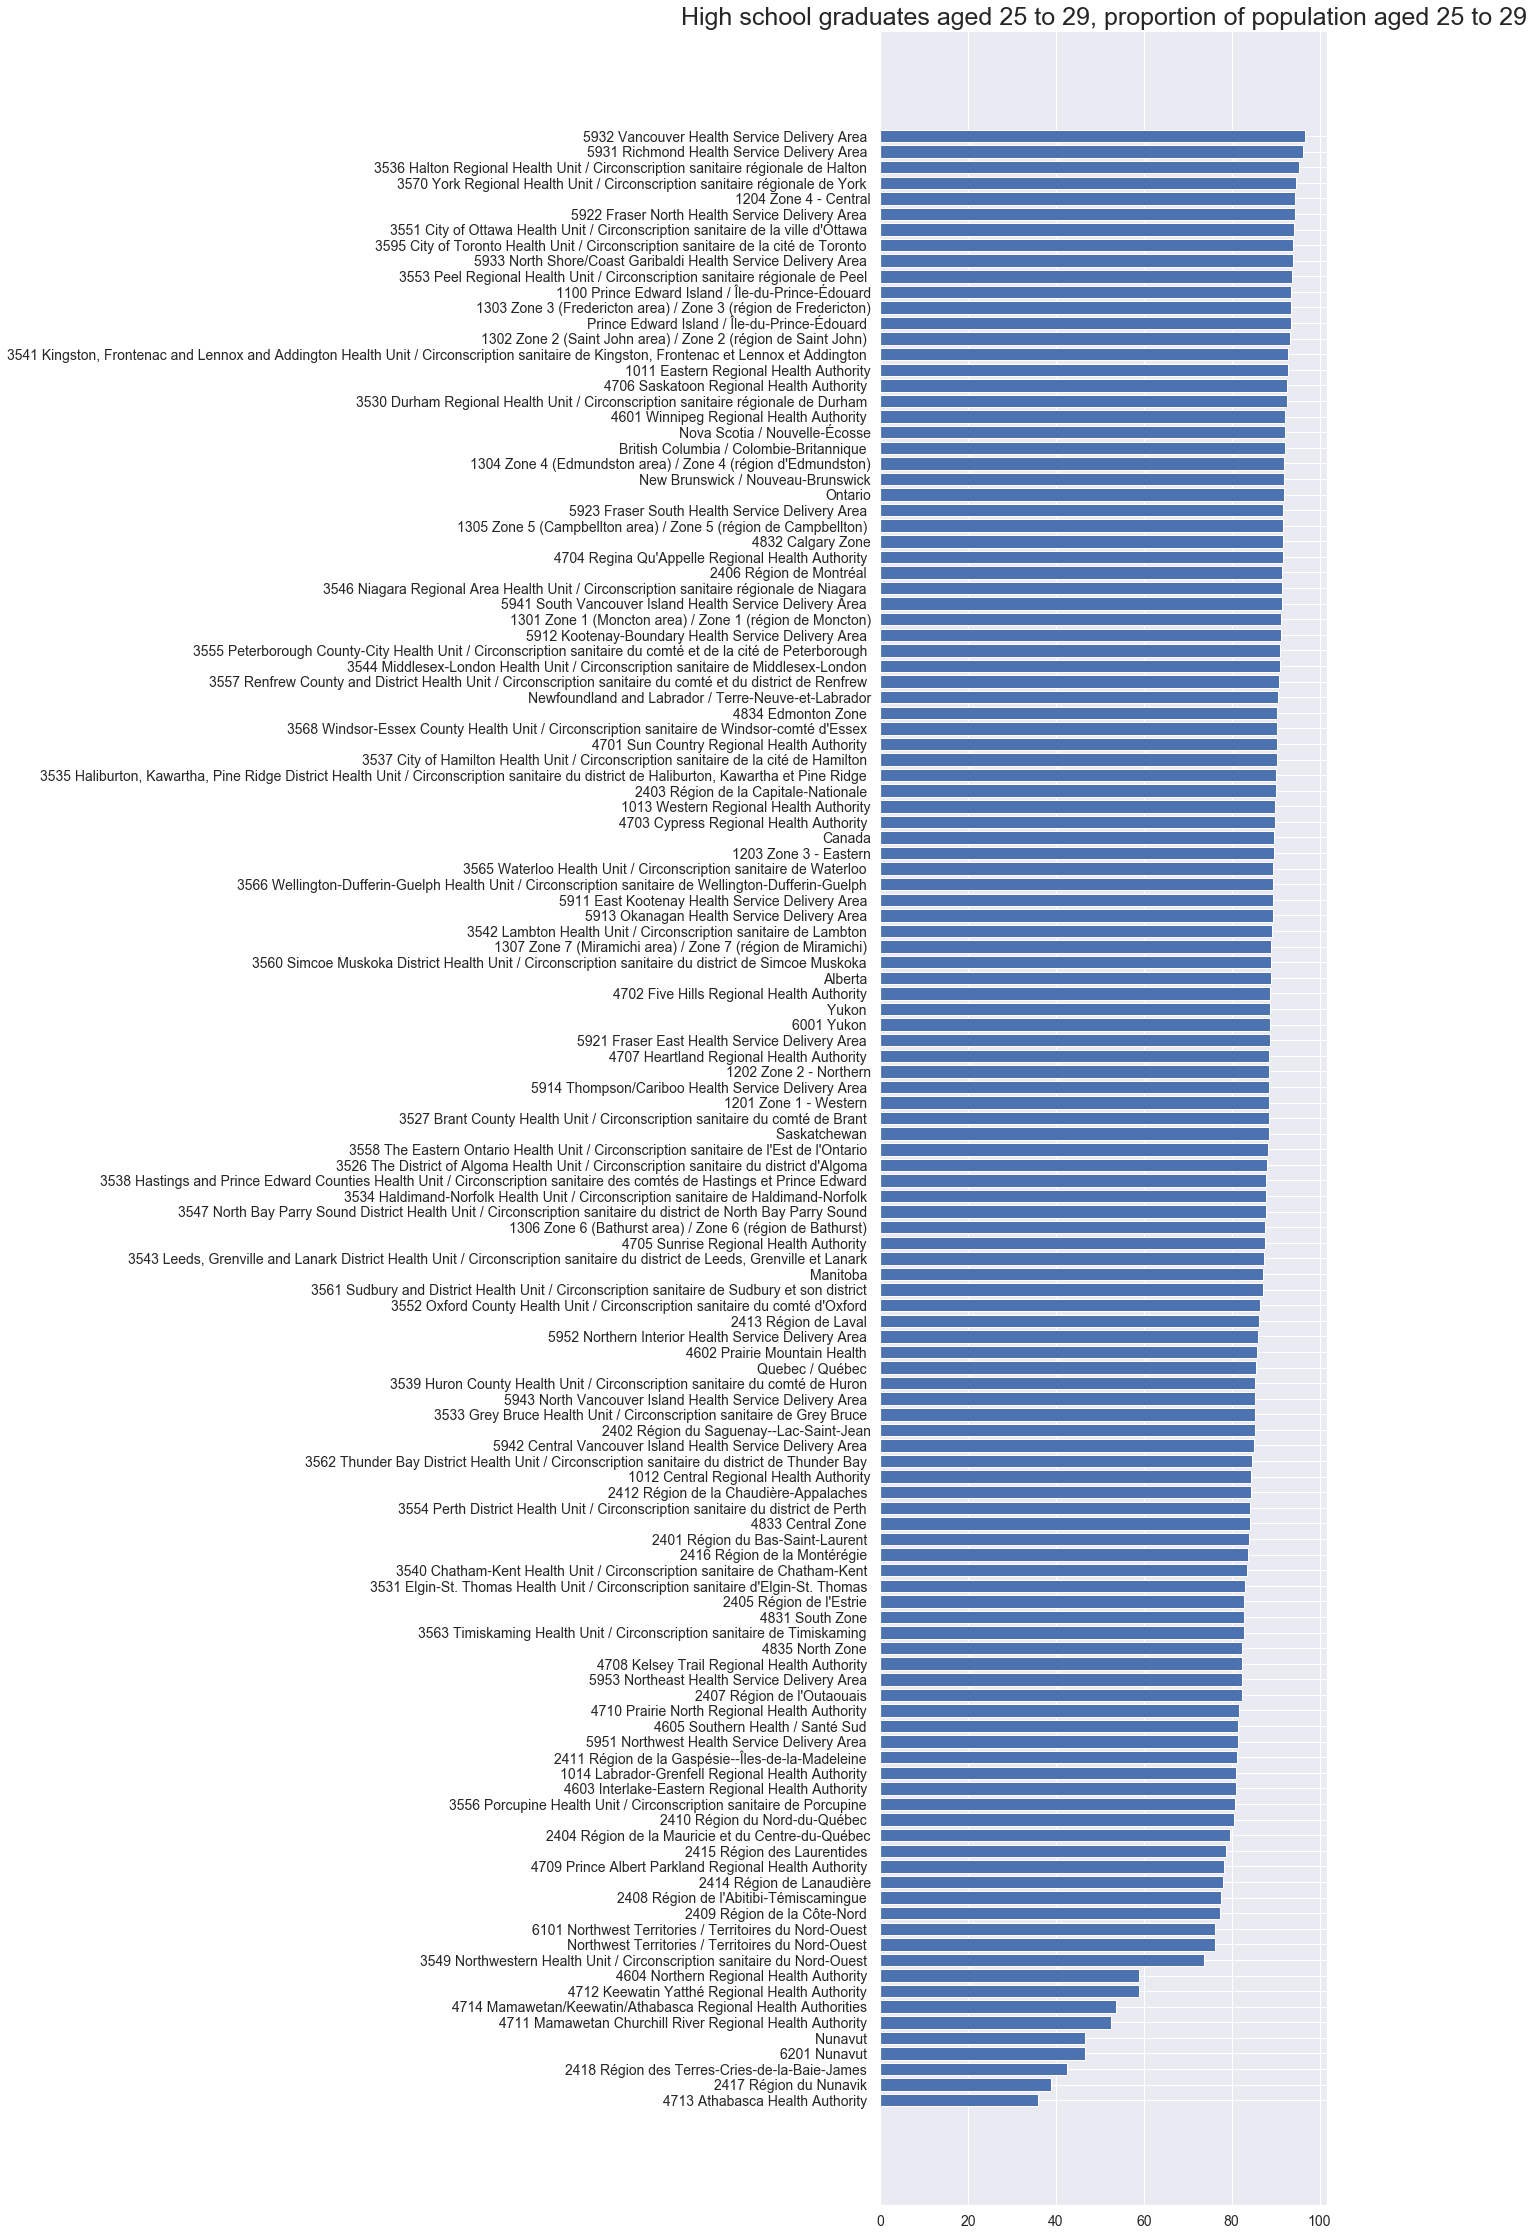

In [172]:
col = 'HSG_RATE'
plt.figure(figsize = (8, 40))
g = df39.sort_values(by=[col])
plt.barh(df39["Geo Name"][g.index], g[col].values) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title(data_dictionary.loc[col, 'Description'], fontsize=25)
plt.show()

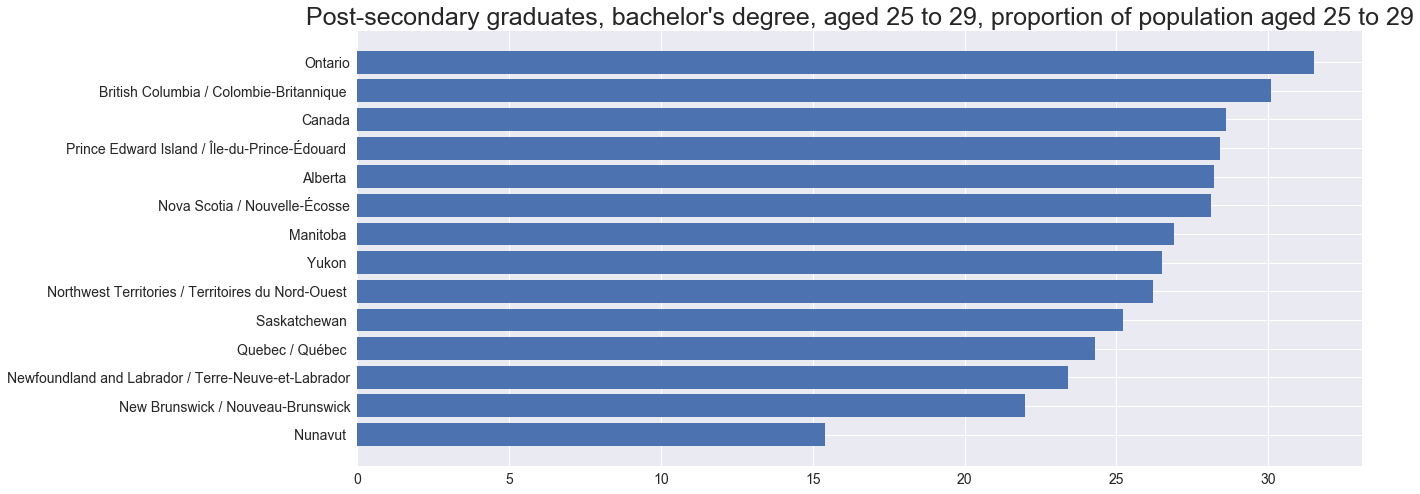

In [170]:
col = 'HSG_PSG_BACH_RATE'
plt.figure(figsize = (18, 8))
g = df14.sort_values(by=[col])
plt.barh(df14["Geo Name"][g.index], g[col].values) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title(data_dictionary.loc[col, 'Description'], fontsize=25)
plt.show()
 

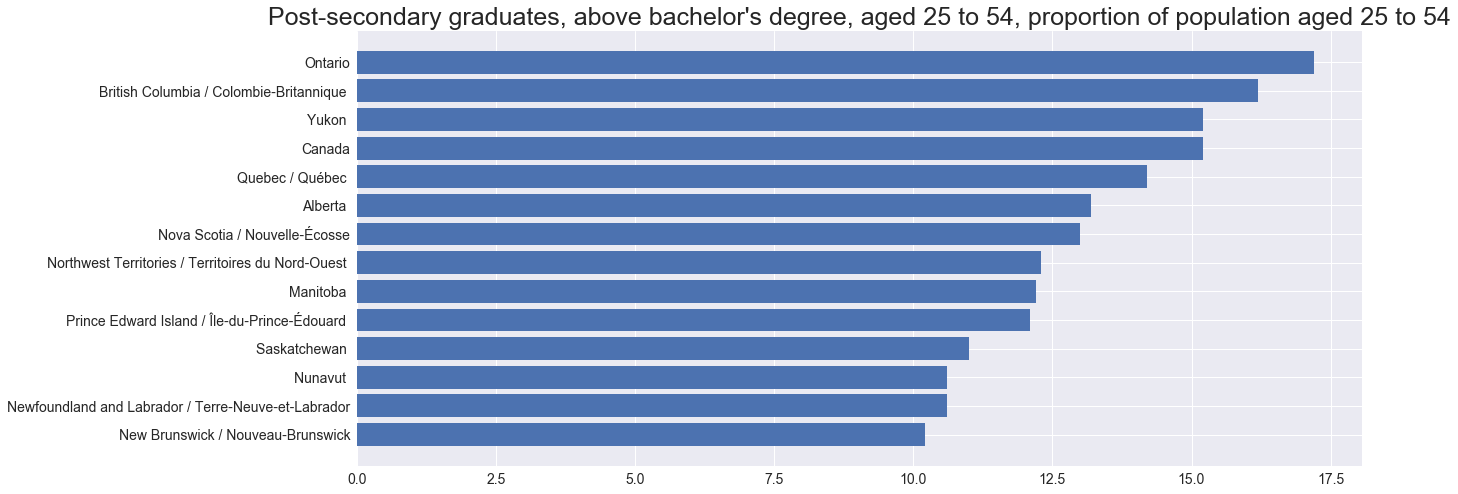

In [180]:
col = 'PSG_ABOVE_BACH_RATE'
plt.figure(figsize = (18, 8))
g = df14.sort_values(by=[col])
plt.barh(df14["Geo Name"][g.index], g[col].values) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title(data_dictionary.loc[col, 'Description'], fontsize=25)
plt.show()
 

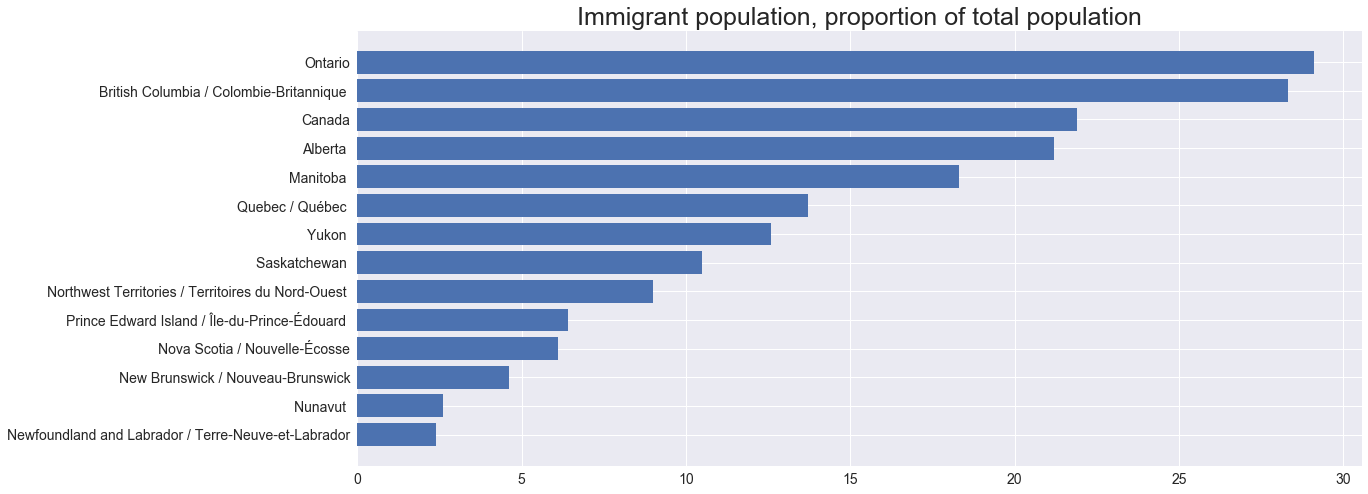

In [171]:
col = 'IMM_RATE'
plt.figure(figsize = (18, 8))
g = df14.sort_values(by=[col])
plt.barh(df14["Geo Name"][g.index], g[col].values) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title(data_dictionary.loc[col, 'Description'], fontsize=25)
plt.show()

Nunavut with long-term unemployment rate over 16% is an outlier among provinces/territories.  

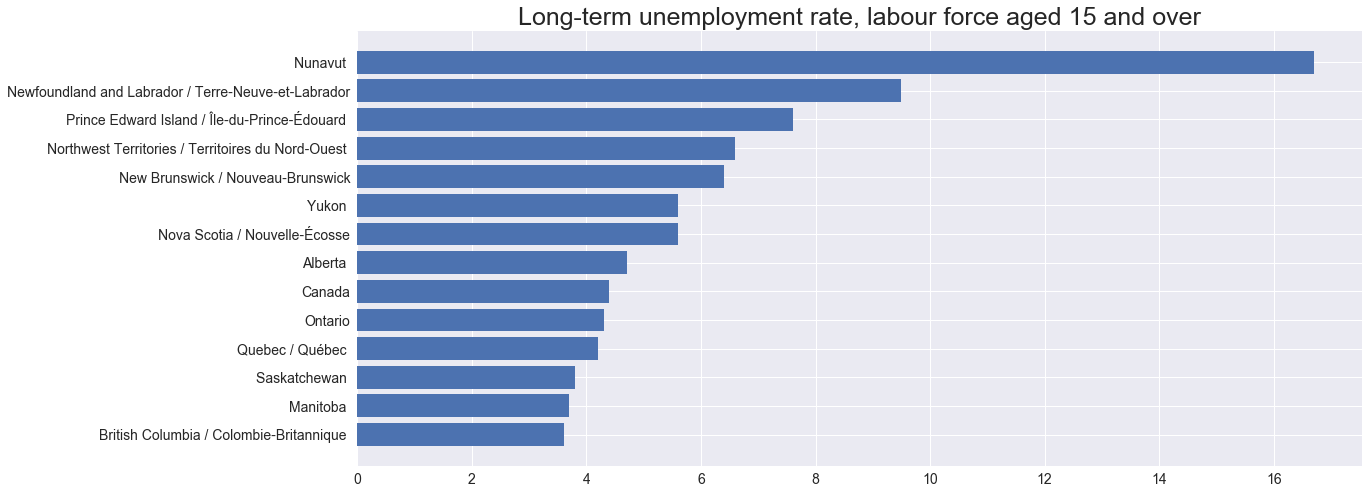

In [172]:
col = 'UE_RATE'
plt.figure(figsize = (18, 8))
g = df14.sort_values(by=[col])
plt.barh(df14["Geo Name"][g.index], g[col].values) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title(data_dictionary.loc[col, 'Description'], fontsize=25)
plt.show()

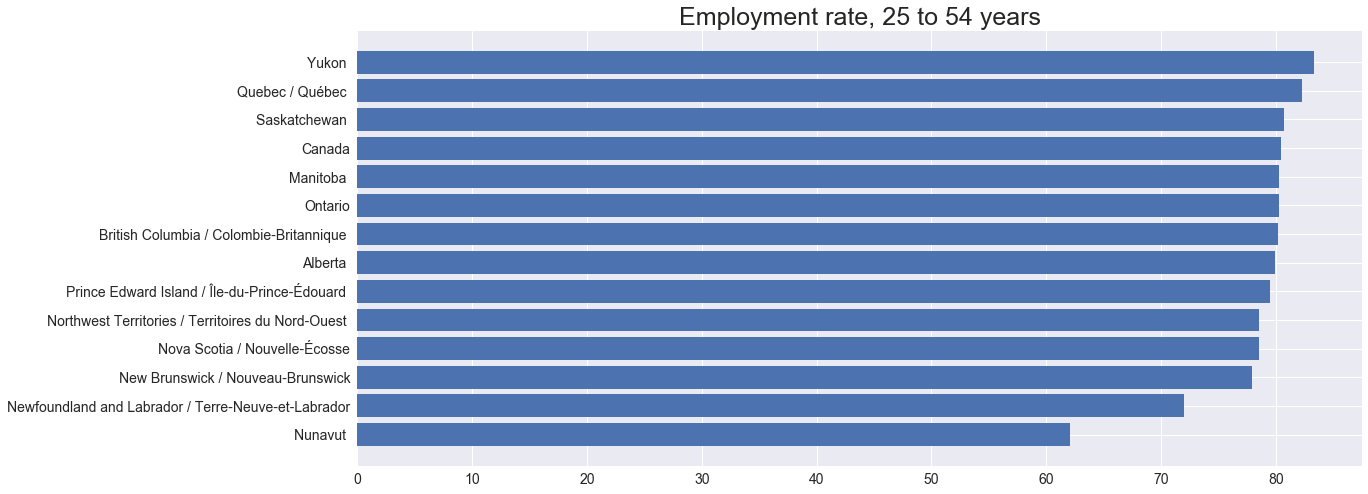

In [182]:
col = 'EMP_RATE_25_54'
plt.figure(figsize = (18, 8))
g = df14.sort_values(by=[col])
plt.barh(df14["Geo Name"][g.index], g[col].values) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title(data_dictionary.loc[col, 'Description'], fontsize=25)
plt.show()

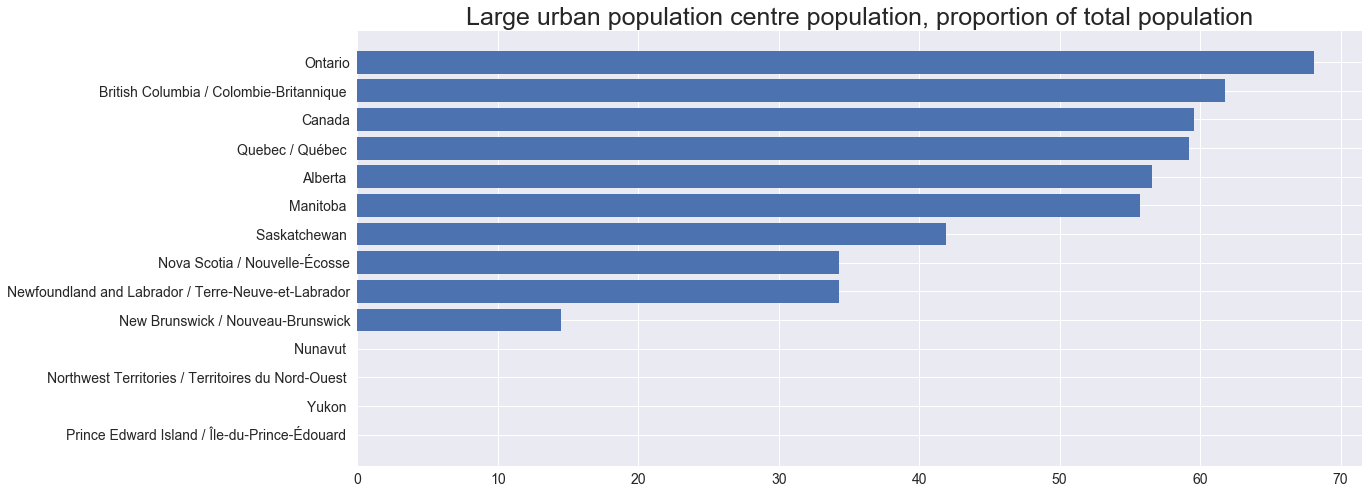

In [175]:
col = 'LRG_POP_CNTR_RATE'
plt.figure(figsize = (18, 8))
g = df14.sort_values(by=[col])
plt.barh(df14["Geo Name"][g.index], g[col].values) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title(data_dictionary.loc[col, 'Description'], fontsize=25)
plt.show()

PEI is again an outlier for medium population centers among provinces and territories. 

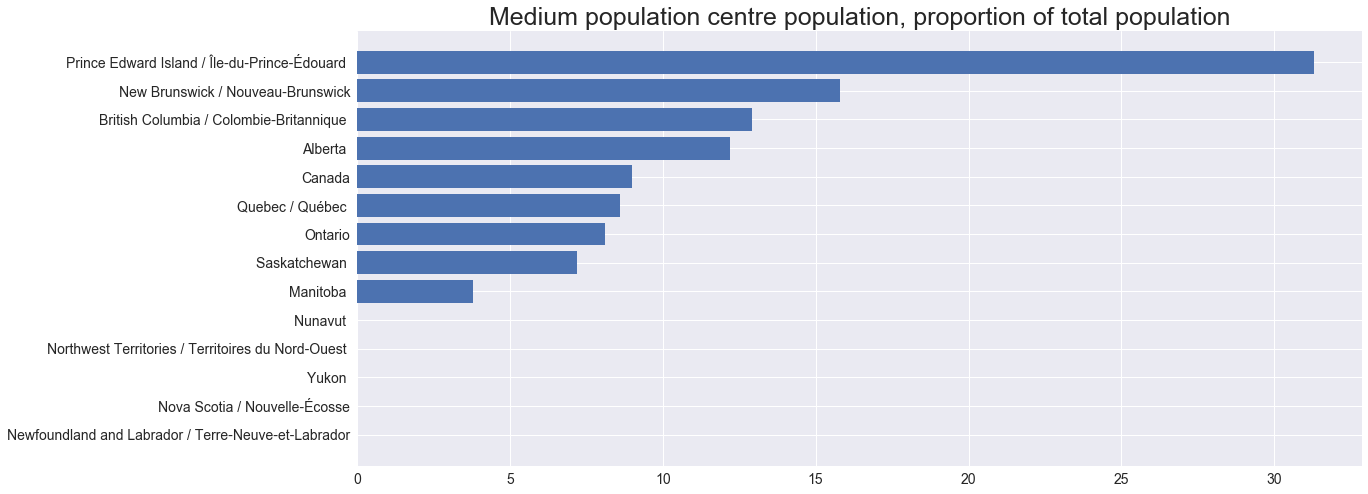

In [176]:
col = 'MED_POP_CNTR_RATE'
plt.figure(figsize = (18, 8))
g = df14.sort_values(by=[col])
plt.barh(df14["Geo Name"][g.index], g[col].values) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title(data_dictionary.loc[col, 'Description'], fontsize=25)
plt.show()

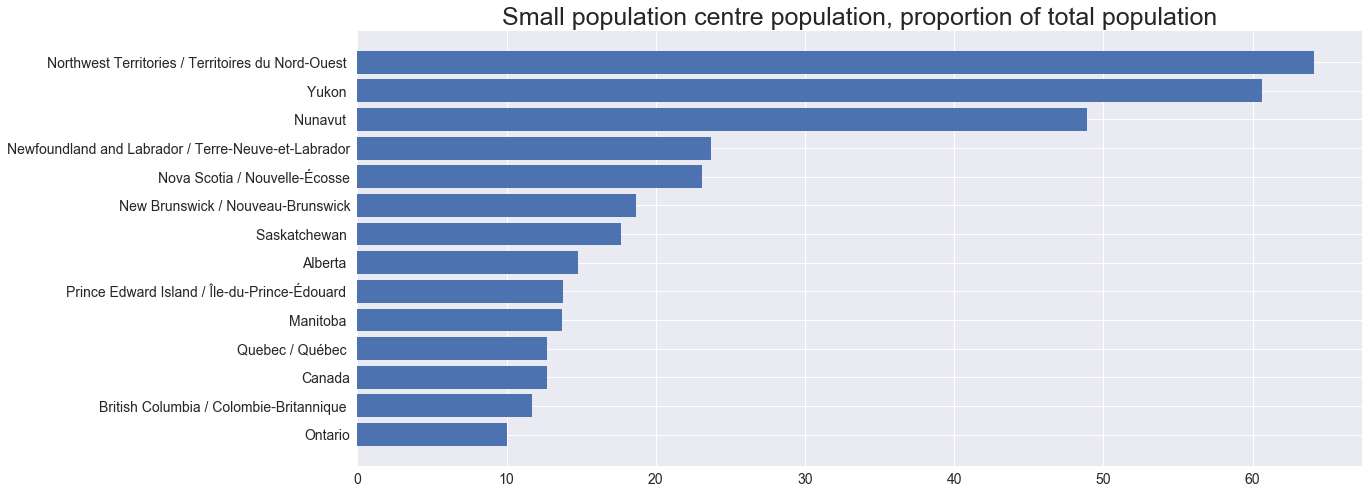

In [178]:
col = 'SML_POP_CNTRE_RATE'
plt.figure(figsize = (18, 8))
g = df14.sort_values(by=[col])
plt.barh(df14["Geo Name"][g.index], g[col].values) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title(data_dictionary.loc[col, 'Description'], fontsize=25)
plt.show()

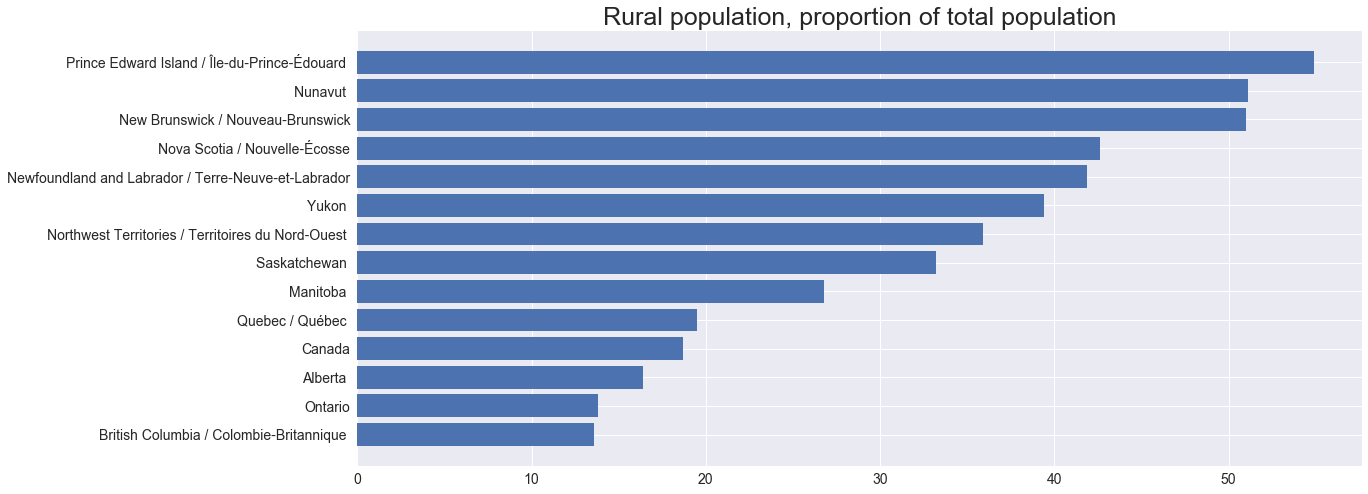

In [185]:
col = 'RRL_RATE'
plt.figure(figsize = (18, 8))
g = df14.sort_values(by=[col])
plt.barh(df14["Geo Name"][g.index], g[col].values) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title(data_dictionary.loc[col, 'Description'], fontsize=25)
plt.show()

Nunavut and Alberta with growth rate over 11% and New Brunswick with negative growth rate are potential outliers.

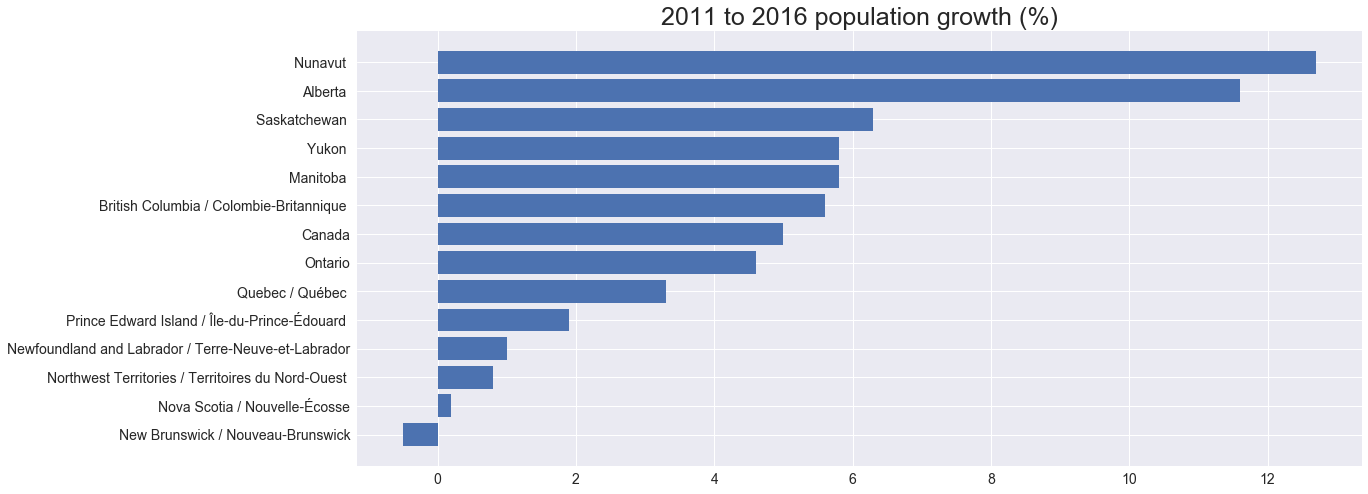

In [344]:
col = 'GROWTH_RATE'
plt.figure(figsize = (18, 8))
g = df14.sort_values(by=[col])
plt.barh(df14["Geo Name"][g.index], g[col].values) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title(data_dictionary.loc[col, 'Description'], fontsize=25)
plt.show()

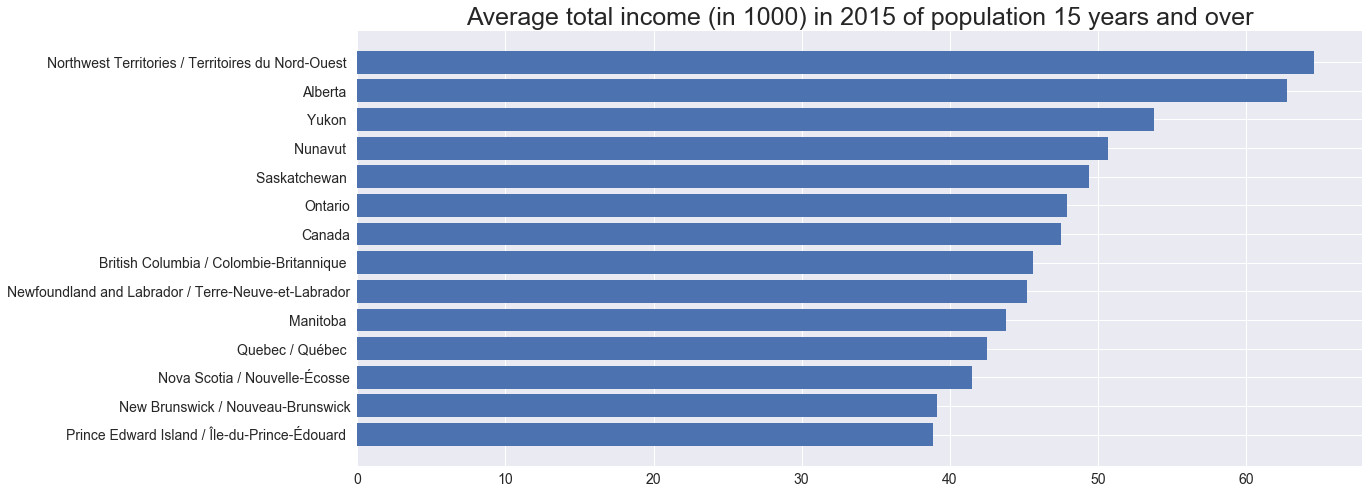

In [348]:
col = 'AVE_PERS_INC_in_1000'
plt.figure(figsize = (18, 8))
g = df14.sort_values(by=[col])
plt.barh(df14["Geo Name"][g.index], g[col].values) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Average total income (in 1000) in 2015 of population 15 years and over', fontsize=25)
plt.show()

Vancouver, North Shore and Richmond with average value of dwelling about or over a million dollars definitely stand out among the regions. While British Columbia is an outlier among provinces and territories. 

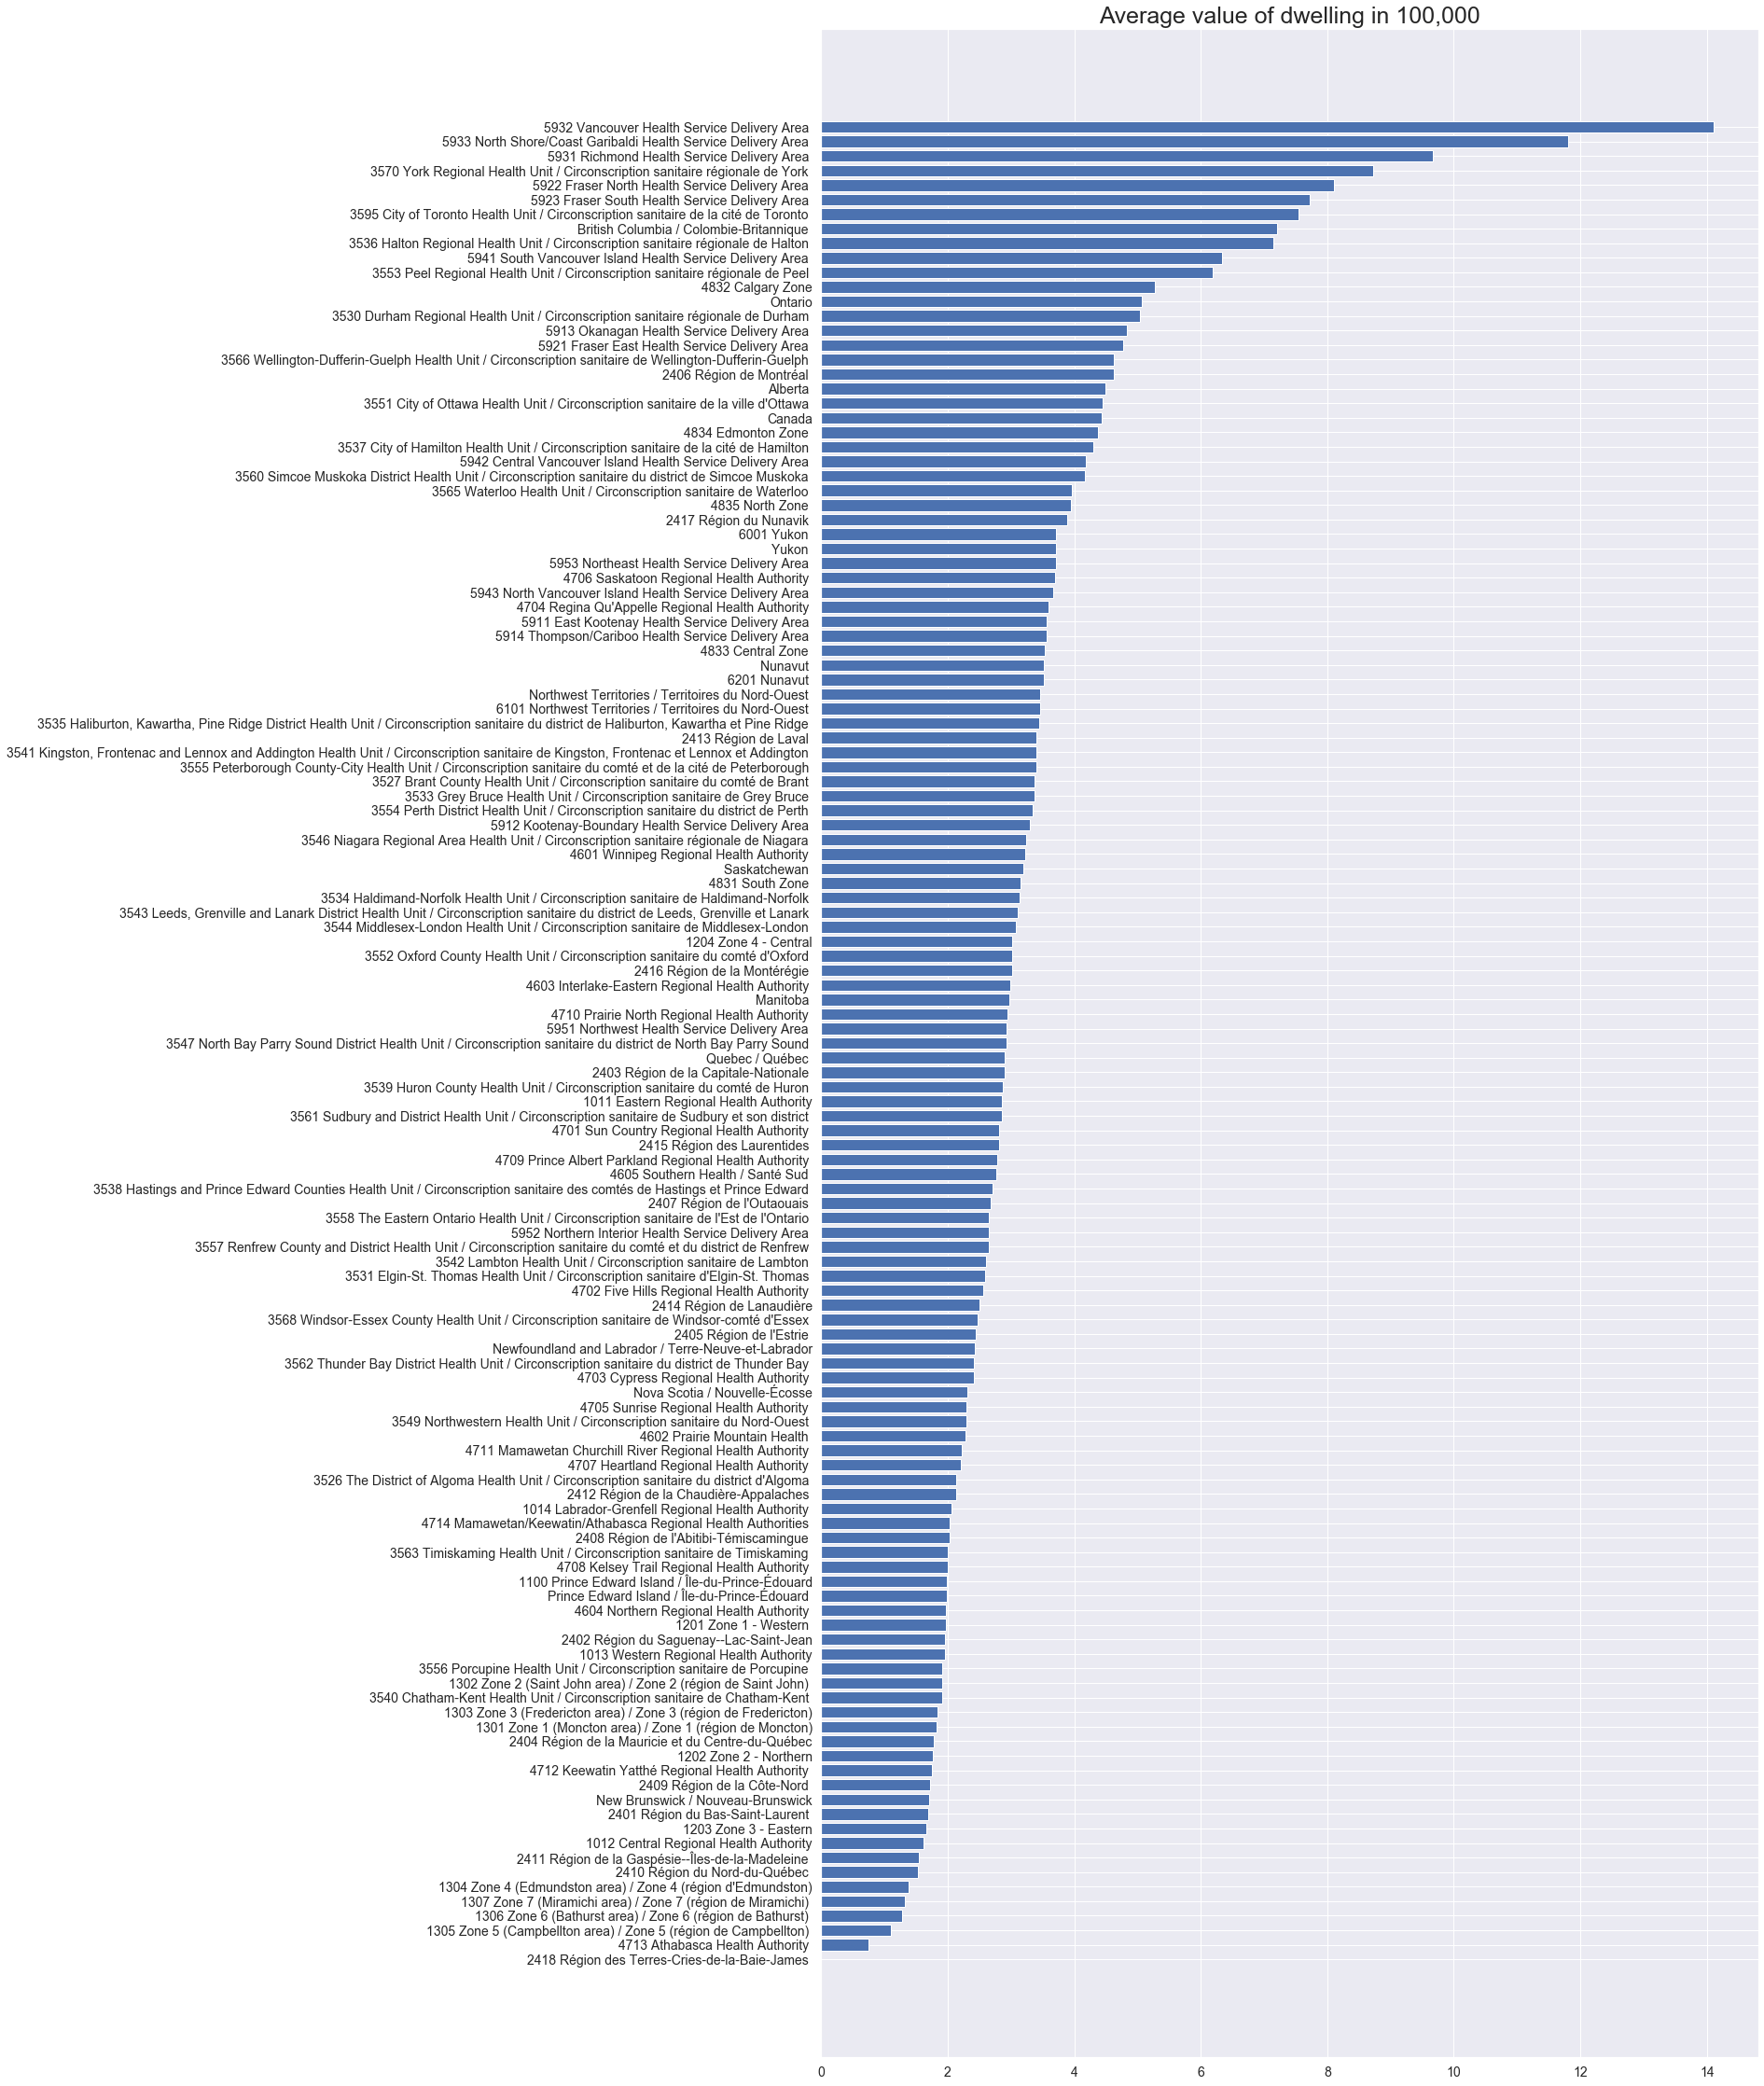

In [177]:
col = 'AVE_DWELL_in_100000'
plt.figure(figsize = (18,40))
g = df39.sort_values(by=[col])
plt.barh(df39["Geo Name"][g.index], g[col].values) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Average value of dwelling in 100,000', fontsize=25)
plt.show()

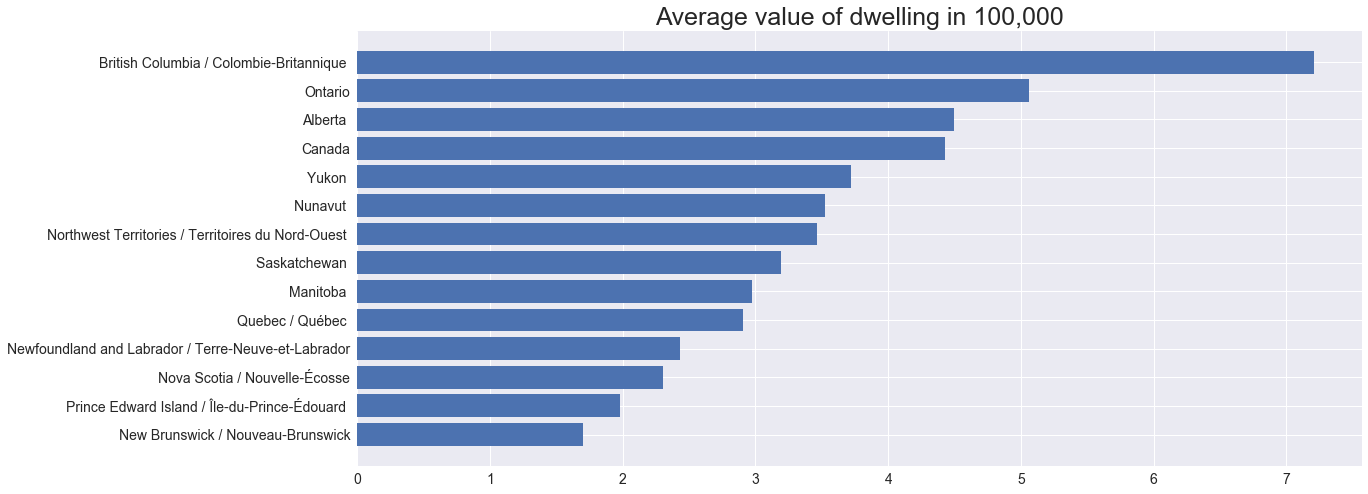

In [350]:
col = 'AVE_DWELL_in_100000'
plt.figure(figsize = (18, 8))
g = df14.sort_values(by=[col])
plt.barh(df14["Geo Name"][g.index], g[col].values) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Average value of dwelling in 100,000', fontsize=25)
plt.show()

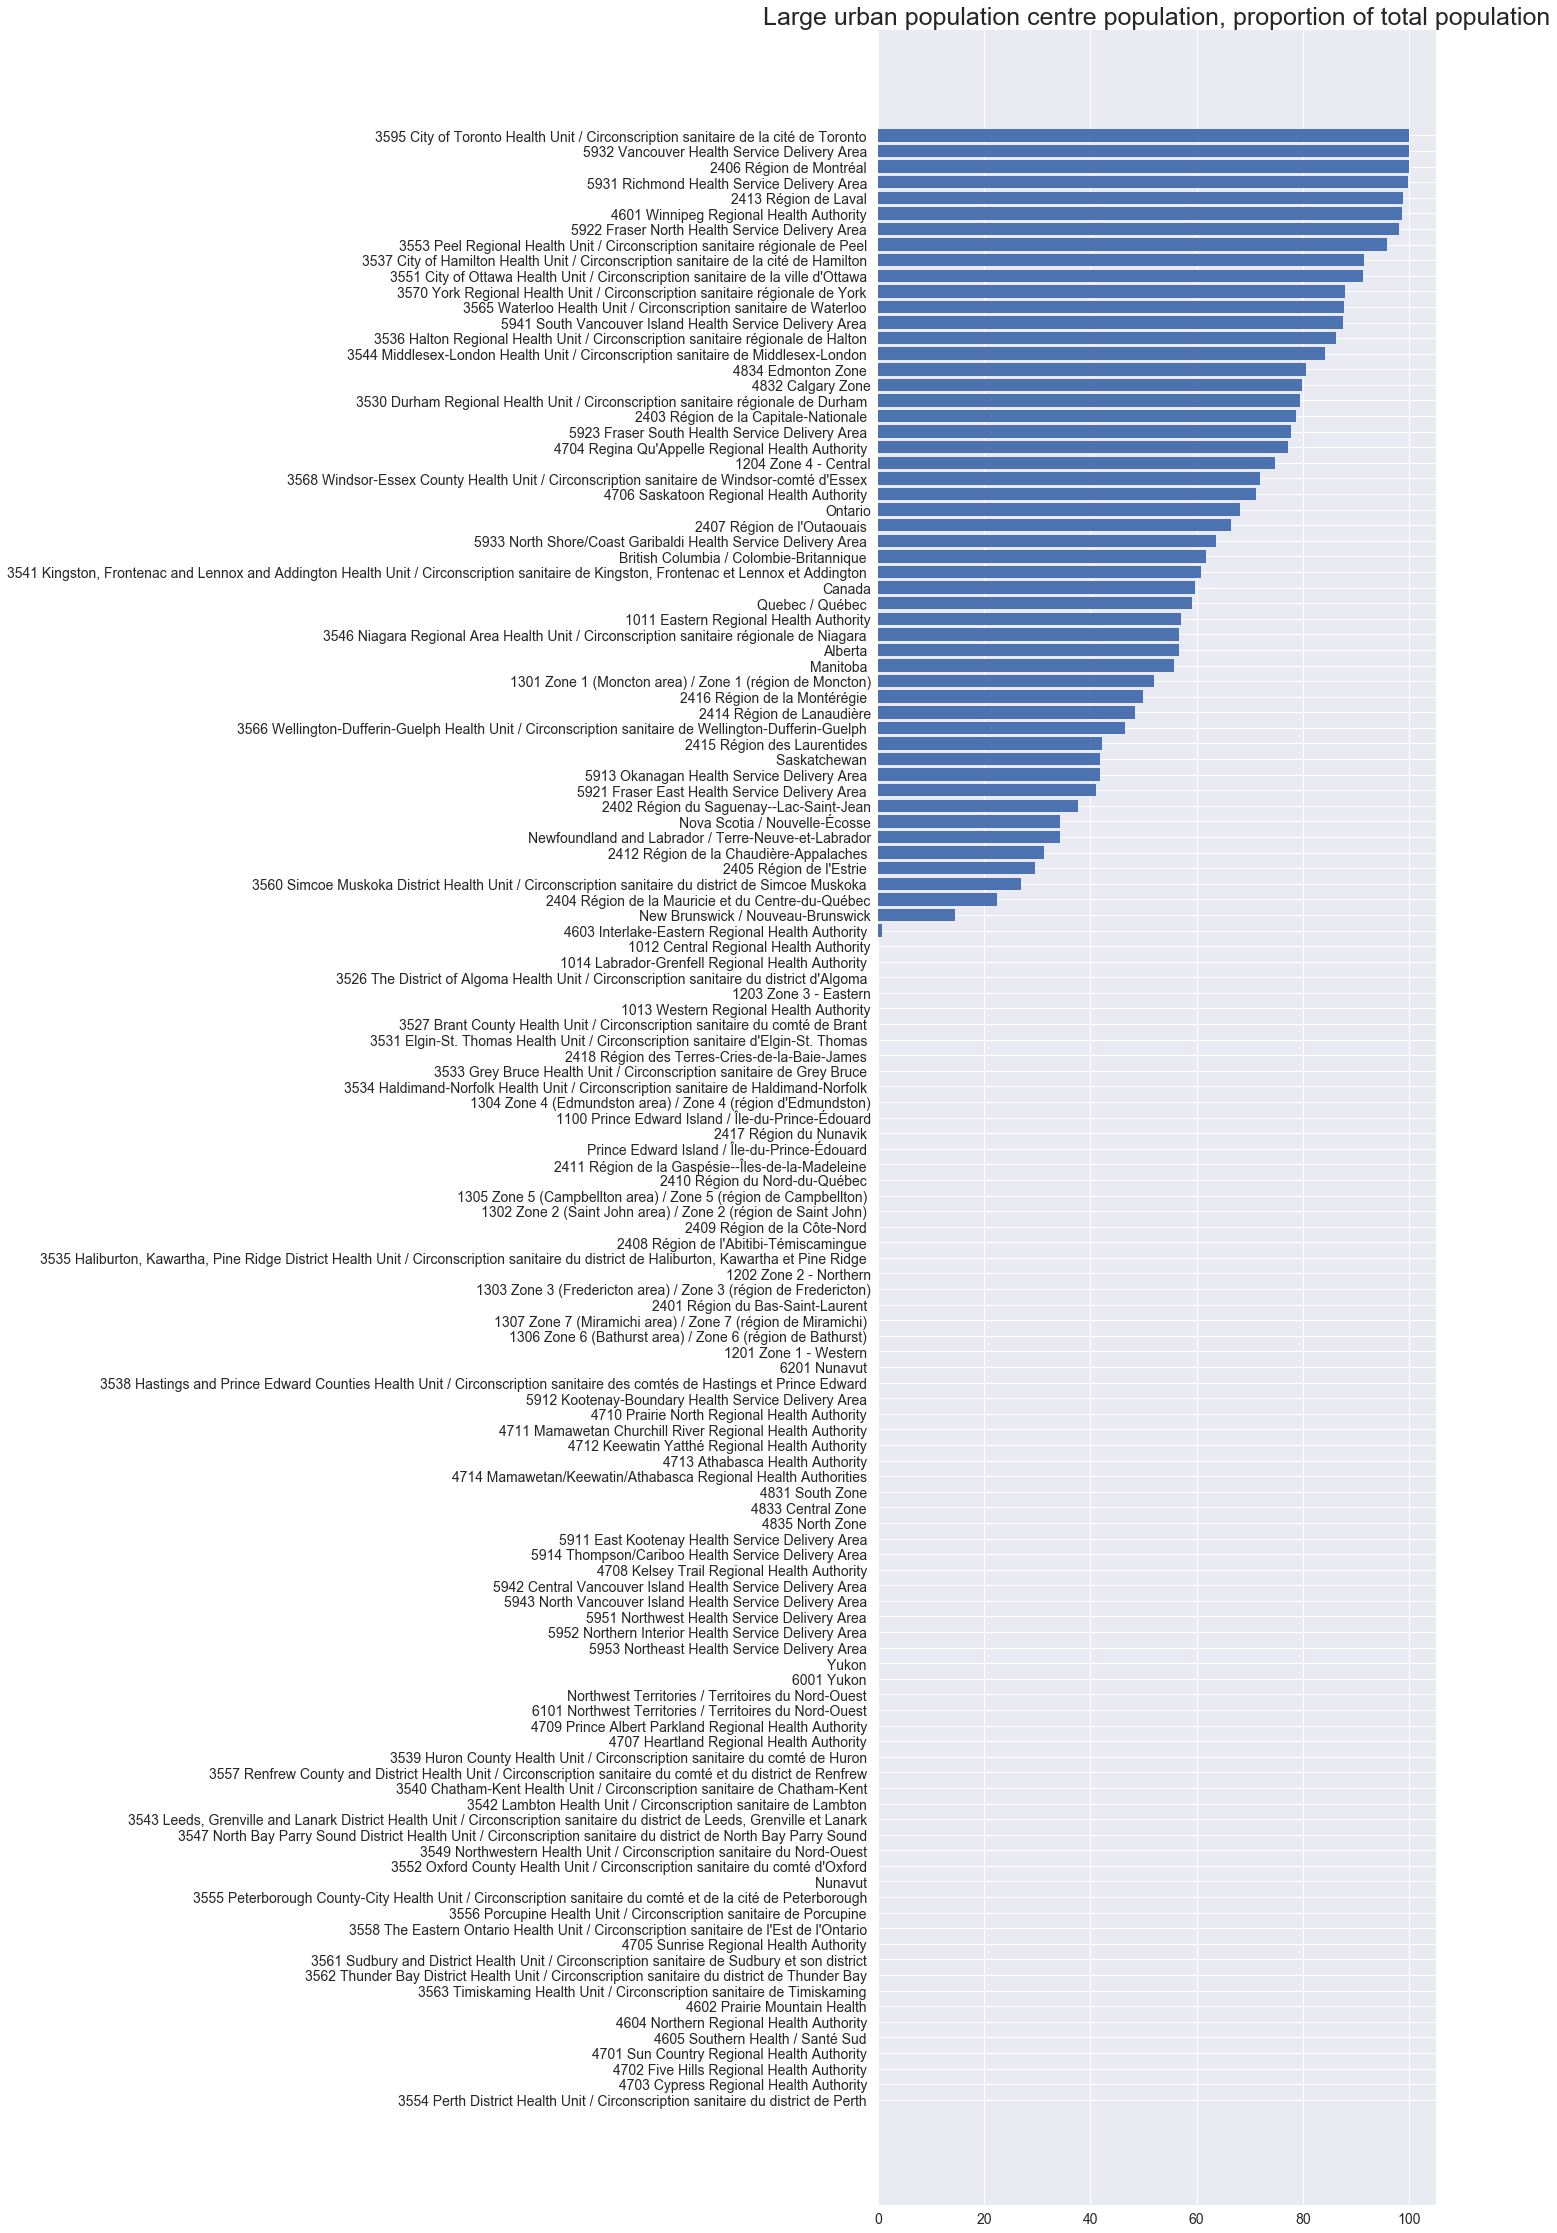

In [460]:
col = 'LRG_POP_CNTR_RATE'
plt.figure(figsize = (10, 40))
g = df39.sort_values(by=[col])
plt.barh(df39["Geo Name"][g.index], g[col].values) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title(data_dictionary.loc[col,'Description'], fontsize=25)
plt.show()

# <a id='q4'>8. Question 4 </a>

In this section we perform bivariate analysis for a selection of features. 

### <a id='md'>8.1 Pairwise scatter plots with emphasis on growth rate  </a>

Let's pick up 7 features with correlation higher than 0.44 with *GROWTH RATE* and look at their pairwise scatter plot. 

In [178]:
#Correlation with output variable
corr_target = abs(corr39["GROWTH_RATE"])
a = corr_target.sort_values(ascending=False)[1:12]
print('the 5-top features with high correlation with growth rate are : \n \n {} '.format(a))

the 5-top features with high correlation with growth rate are : 
 
 GOVT_TRNSFR_INC                0.596805
MEDIAN_HHLD_INC_in_1000        0.562362
POP_65_RATE                    0.552925
IMM_2006_2016_RATE_TOTPOP      0.504974
AVE_PERS_INC_FEMALE_in_1000    0.495273
HSG_PSG_BELOW_BACH_RATE        0.495108
PSG_BACH_RATE                  0.473036
AVE_PERS_INC_in_1000           0.465486
LRG_POP_CNTR_RATE              0.464053
PSG_BELOW_BACH_RATE            0.448703
AVE_DWELL_in_100000            0.446769
Name: GROWTH_RATE, dtype: float64 


In [179]:
dfbp = df39.drop(axis = 0, index = 1)
dfbp = dfbp.drop('Geo Name', axis = 1)

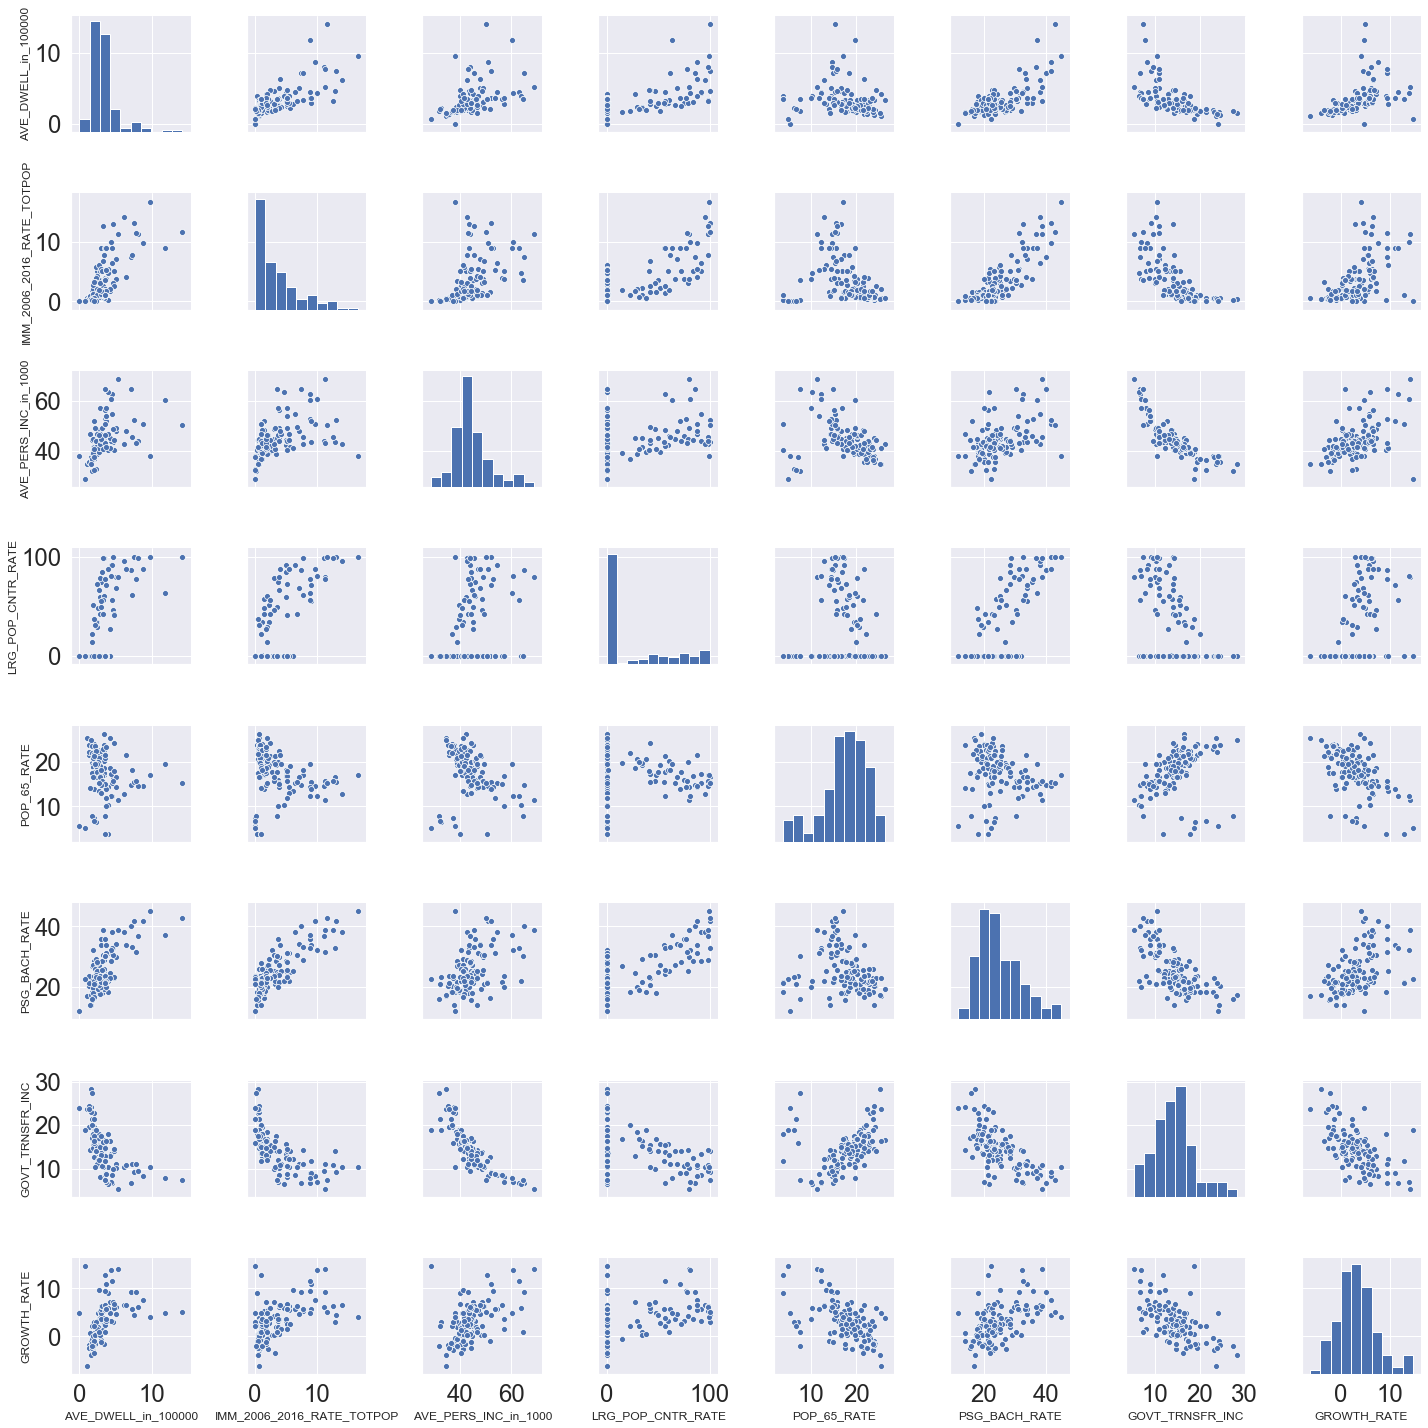

In [180]:
dfGR = dfbp[{'GROWTH_RATE','GOVT_TRNSFR_INC', 'POP_65_RATE','IMM_2006_2016_RATE_TOTPOP','PSG_BACH_RATE', 'AVE_PERS_INC_in_1000', 'LRG_POP_CNTR_RATE', 'AVE_DWELL_in_100000'}]
sns.pairplot(dfGR)


The growth rate is almost linearly increasing(decreasing) with average person income (government transfer income). It makes sense, because government transfer income rate is decreasing when average person income increases; the government transfer income is aimed to support proportion of population with lower income. However, government transfer income seems to decrease exponentially with increasing average income not linearly. 

Immigration rate from 2006-2016 and post secondary graduates rate with bachelor's degree are also linearly dependent with positive correlation. We can conclude most immigrants to Canada have university degree; this was expected as Canadian universities hire lots of international graduate students. That could also explain why growth rate increases with postgraduates rate with bachelor's degree as well as positive correlation between post graduate rate and large urban population centers; large urban population centers have one or more universities.

                
Average person income is higher in large urban population centers, also it increases with postgraduates rate which is expected; jobs that require postgraduate degrees are better paid. Average income rate decreases with population over 65 rate, it is expected too as 65 is the retirement age. Average values of dwelling increases with average income as expected; an expensive house is affordable for a higher income person. 

Average values of dwelling is higher in large urban population centers and is lower for population over 65; retired people move to smaller/quieter and (probably) less expensive towns.   


### <a id='md2'>8.2 Pairwise scatter plots with emphasis on low income rate   </a>

We repeat the previous section but this time we pick up features with high correlation with low income rate.


In [475]:
#Correlation with output variable
corr_target = abs(corr39['LW_INC_ECON_FAM_RATE'])
a = corr_target.sort_values(ascending=False)[1:16]
print('the 5-top features with high correlation with growth rate are : \n \n {} '.format(a))

the 5-top features with high correlation with growth rate are : 
 
 LOW_INC_UNATTACHED_RATE      0.786011
IMM_RATE                     0.662422
OWNER_OVER30_RATE            0.643220
IMM_2006_2016_RATE_TOTPOP    0.584356
POP_DENSE_in_100             0.584289
SML_POP_CNTRE_RATE           0.582575
LRG_POP_CNTR_RATE            0.582133
PSG_BELOW_BACH_RATE          0.546312
PSG_BACH_RATE                0.530274
PSG_ABOVE_BACH_RATE          0.522426
AVE_DWELL_in_100000          0.518643
HSG_PSG_ABOVE_BACH_RATE      0.517115
HSG_PSG_BACH_RATE            0.489353
RENTER_OVER30_RATE           0.485369
RRL_RATE                     0.448423
Name: LW_INC_ECON_FAM_RATE, dtype: float64 


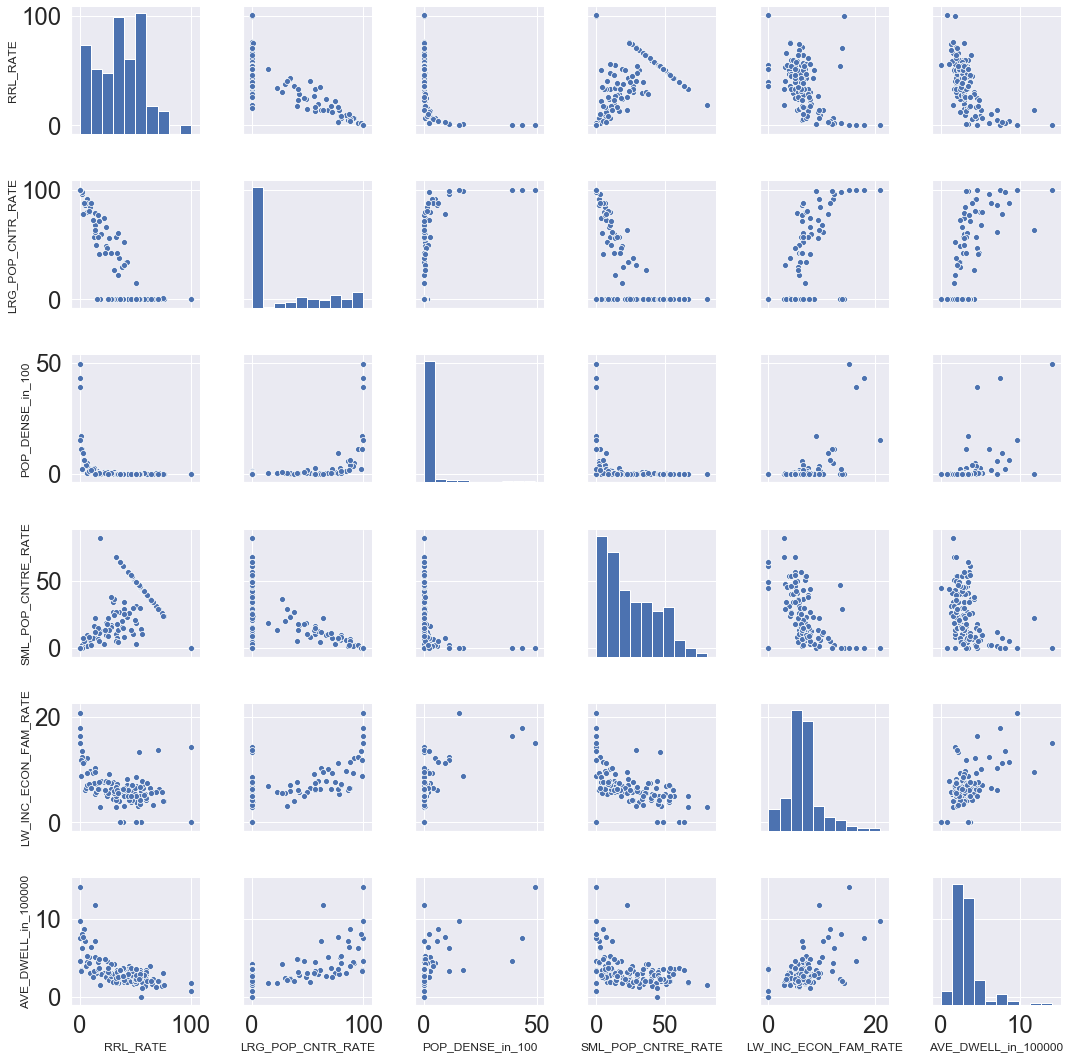

In [181]:
dfLIn = dfbp[{'LW_INC_ECON_FAM_RATE','POP_DENSE_in_100','SML_POP_CNTRE_RATE', 'AVE_DWELL_in_100000', 'RRL_RATE', 'LRG_POP_CNTR_RATE'}]
sns.pairplot(dfLIn)

Low income rate is decreasing with rural and small population rate and increasing with large urban population rate: Families in high low income rate are less likely to live in the rural areas or small population centers and most likely to live in the large urban population centers. We can further infer that most low income families lives in dwellings with lower average values.

We also see where the population density is high, the low income family rate is high too which again support that most families with lower income live in large urban centers that have higher population density since the population density is high in large urban centers.

Population density in general is 0 (or not available) for most regions in the dataset. This was evident in the barplot of population density in previous section where Vancouver and Toronto were the most dense regions in the list. From the population density vs average values of dwelling it is obvious that Vancouver, which has the highest density, have also the highest rate of average value of dwelling. 

In rural areas and small population centers, mostly the average values of dwellings are lower.


# <a id='q5'>9. Question 5 </a>

### <a id='dwtd'>9.1 Do you trust the dataset, or not? Support your answer.  </a>

The source for the dataset is Statistics Canada therefore reliable. In preparing data dictionary we compared values of all columns for Canada with the data from statistics Canada website and they all match except for the female and lone parent families and male and female rate. We spotted a mistake on the website which was the definition of *female and male lone parent families*, those columns do not match our dataset as the rates are proportion of lone parent families while we believe our data is proportion of census families. The data for these columns in our dataset for Canada seems to be reasonable.   

### <a id='tie'>9.2 Flag potential invalid entries, anomalous observations, or outliers. How should these entries be treated? </a>

We addressed some of potential outliers while doing univariate/bivariate analysis. We can also detect outliers using boxplot as follows:

In [182]:
col1 = [col for col in dfbp if max(dfbp[col]) <= 40]
dfbp1 = dfbp[col1]
dfbp2 = dfbp.drop(col1, axis = 1)
dfbp2.shape[1]

23

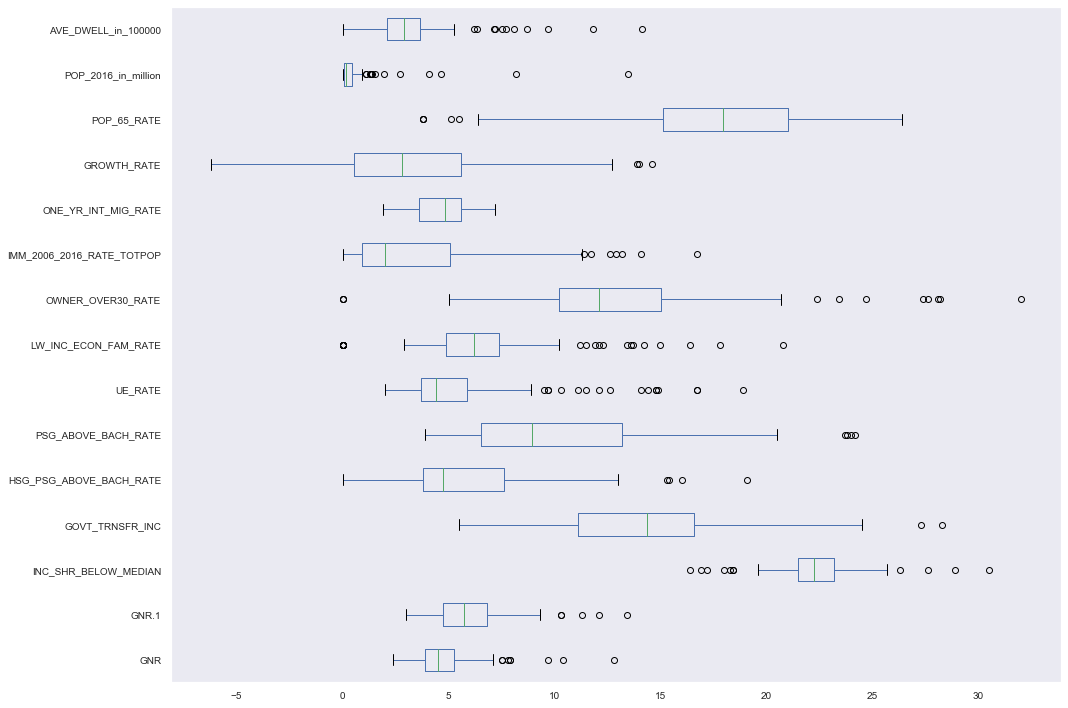

In [183]:
dfbp1.boxplot(figsize=(15,10),grid=False, vert=False, fontsize=10)
plt.tight_layout()


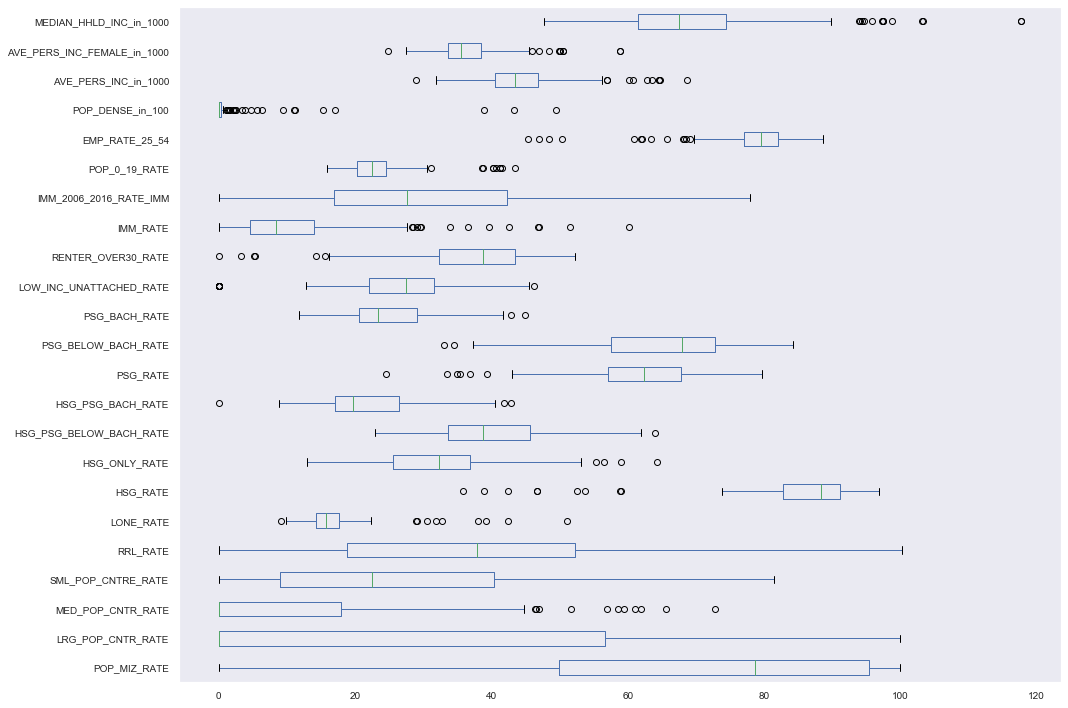

In [184]:
dfbp2.boxplot(figsize=(15,10),grid=False, vert=False, fontsize=10)
plt.tight_layout()

# <a id='q6'>10. Question 6 </a>

### <a id='sosvt'>10.1 Does any of your analysis suggest that some of the variables should be transformed? </a>

We only did minor transformations for some features with large values like population, incomes and dwelling values only to keep them in the same range as values for other columns. It wasn't crucial though. 